# Model Family Graph Analysis

This notebook analyzes the directed graph of model relationships from the joined_models.csv dataset. Each node represents a model, and directed edges represent parent-child relationships between models.

In [1]:
# Import required libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import json
from collections import Counter
import numpy as np

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn')

/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_99608/2094736768.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [46]:
# Load the dataset
df = pd.read_csv('joined_models.csv')
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (51937, 14)


model_id                                               card  \
0            CausalLM/14B  ---\nlicense: wtfpl\ndatasets:\n- JosephusCheu...   
1  cgus/CausalLM-14B-exl2  ---\nbase_model: CausalLM/14B\ndatasets:\n- Jo...   
2     lokCX/4x-Ultrasharp                                                NaN   
3        syaimu/7th_Layer  ---\nlicense: other\n---\n\n## / 7th Layer /\n...   
4      ali-vilab/ACE_Plus  <p align="center">\n\n  <h2 align="center"><im...   

                                            metadata  depth  \
0  {"id": "CausalLM/14B", "author": "CausalLM", "...      0   
1  {"id": "cgus/CausalLM-14B-exl2", "author": "cg...      1   
2  {"id": "lokCX/4x-Ultrasharp", "author": "lokCX...      0   
3  {"id": "syaimu/7th_Layer", "author": "syaimu",...      0   
4  {"id": "ali-vilab/ACE_Plus", "author": "ali-vi...      0   

                                        children  children_count  \
0  https://huggingface.co/cgus/CausalLM-14B-exl2               1   
1                                            NaN               0   
2                                            NaN               0   
3                                            NaN               0   
4                                            NaN               0   

                                            adapters  adapters_count  \
0  https://huggingface.co/Crystal427/CrystalNovel...             1.0   
1                                                NaN             0.0   
2                                                NaN             0.0   
3                                                NaN             0.0   
4                                                NaN             0.0   

                                           quantized  quantized_count merges  \
0  https://huggingface.co/TheBloke/CausalLM-14B-G...                3    NaN   
1                                                NaN                0    NaN   
2                                                NaN                0    NaN   
3                                                NaN                0    NaN   
4                                                NaN                0    NaN   

   merges_count                                             spaces  \
0             0  AquariusXiong/CausalLM-14B, Cran-May/Shi-Ci-PL...   
1             0  huggingface/InferenceSupport/discussions/new?t...   
2             0  eienmojiki/AnyDiffuse, huggingface/InferenceSu...   
3             0  Phasmanta/Space2, b3xxf21f/A3Private, huggingf...   
4             0  WolseyTheCat/fc-simple, huggingface/InferenceS...   

   spaces_count  
0             8  
1             1  
2             2  
3             3  
4             4

In [3]:
def clean_model_id(model_id):
    """Clean model ID by removing URL prefixes."""
    if isinstance(model_id, str) and model_id.startswith('https://huggingface.co/'):
        return model_id.replace('https://huggingface.co/', '')
    return str(model_id)

def extract_metadata(metadata_str):
    """Extract downloads and likes from metadata string."""
    try:
        if pd.isna(metadata_str):
            return 0, 0
        metadata = json.loads(metadata_str.replace("'", '"'))
        return metadata.get('downloads', 0), metadata.get('likes', 0)
    except:
        return 0, 0

# Create directed graph
G = nx.DiGraph()

# Add nodes with attributes
for _, row in df.iterrows():
    model_id = clean_model_id(row['model_id'])
    downloads, likes = extract_metadata(row['metadata'])
    G.add_node(model_id, 
               downloads=downloads,
               likes=likes,
               depth=row['depth'])

# Add edges for parent-child relationships
for _, row in df.iterrows():
    model_id = clean_model_id(row['model_id'])
    if pd.notna(row['children']):
        try:
            children = row['children'].split(', ') #json.loads(row['children'].replace("'", '"'))
            print(children)
            for child in children:
                child_id = clean_model_id(child)
                if child_id in G:
                    G.add_edge(model_id, child_id)
        except:
            continue

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

['https://huggingface.co/cgus/CausalLM-14B-exl2']
['https://huggingface.co/skunkworx/AWPortrait-FL-NF4']
['https://huggingface.co/elanoqi/wb-ghibli-700']
['https://huggingface.co/shubham001213/test-1', 'https://huggingface.co/essssssssss/chair_set', 'https://huggingface.co/Janobig/JR-2567']
['https://huggingface.co/Saxo/Linkbricks-Horizon-AI-Avengers-V1-108B', 'https://huggingface.co/dvishal18/chatbotapi']
['https://huggingface.co/zimyu/baichuan2-13b-zsee-lora']
['https://huggingface.co/JiunYi/Baichuan2-7B-Chat-DcardStylePost-SFT']
['https://huggingface.co/RobCzikkel/DoctorGPT', 'https://huggingface.co/Shaheer14326/Fine_tunned_Biogpt']
['https://huggingface.co/raidium/MQG']
['https://huggingface.co/rangan2510/BioMistral-Instructv0.2-7B-DARE', 'https://huggingface.co/ZiweiChen/BioMistral-Clinical-7B', 'https://huggingface.co/hiiamsid/biomistral_channel_targeter_epoch_6', 'https://huggingface.co/mychen76/bio_mistral-7b-cervical_instability_lora_v1', 'https://huggingface.co/hiiamsid/bio_m

In [4]:
# Basic graph statistics
print("\nGraph Statistics:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Number of connected components: {nx.number_weakly_connected_components(G)}")

# Find root nodes (nodes with no incoming edges)
roots = [n for n, d in G.in_degree() if d == 0]
print(f"\nNumber of root nodes: {len(roots)}")
print("\nTop 5 root nodes by number of descendants:")
root_descendants = [(r, len(nx.descendants(G, r))) for r in roots]
root_descendants.sort(key=lambda x: x[1], reverse=True)
for root, count in root_descendants[:5]:
    print(f"{root}: {count} descendants")


Graph Statistics:
Number of nodes: 46896
Number of edges: 45946
Number of connected components: 952

Number of root nodes: 950

Top 5 root nodes by number of descendants:
unsloth/llama-3-8b-bnb-4bit: 2717 descendants
openai/whisper-small: 2640 descendants
google-bert/bert-base-cased: 2345 descendants
google/vit-base-patch16-224-in21k: 2150 descendants
google-t5/t5-small: 1904 descendants


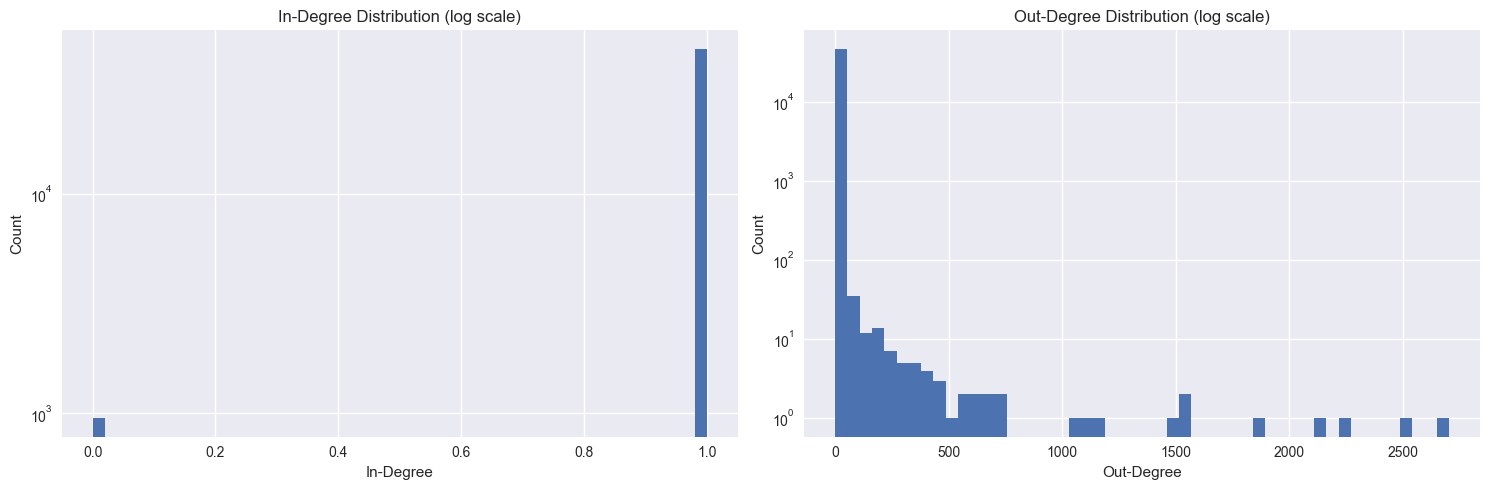

In [5]:
# Analyze node degrees
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=50, log=True)
plt.title('In-Degree Distribution (log scale)')
plt.xlabel('In-Degree')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=50, log=True)
plt.title('Out-Degree Distribution (log scale)')
plt.xlabel('Out-Degree')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [6]:
# Find most influential models (highest out-degree)
print("\nTop 10 models by number of children:")
top_parents = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:10]
for model, degree in top_parents:
    print(f"{model}: {degree} children")


Top 10 models by number of children:
unsloth/llama-3-8b-bnb-4bit: 2705 children
openai/whisper-small: 2538 children
google-bert/bert-base-cased: 2263 children
google/vit-base-patch16-224-in21k: 2126 children
google-t5/t5-small: 1858 children
openai-community/gpt2: 1549 children
FacebookAI/roberta-base: 1530 children
openai/whisper-tiny: 1490 children
OnomaAIResearch/Illustrious-xl-early-release-v0: 1148 children
CompVis/stable-diffusion-v1-4: 1122 children


In [7]:
# Find most popular models (highest in-degree)
print("\nTop 10 most forked models:")
top_children = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:10]
for model, degree in top_children:
    print(f"{model}: {degree} parents")


Top 10 most forked models:
cgus/CausalLM-14B-exl2: 1 parents
skunkworx/AWPortrait-FL-NF4: 1 parents
elanoqi/wb-ghibli-700: 1 parents
shubham001213/test-1: 1 parents
essssssssss/chair_set: 1 parents
Janobig/JR-2567: 1 parents
Saxo/Linkbricks-Horizon-AI-Avengers-V1-108B: 1 parents
dvishal18/chatbotapi: 1 parents
zimyu/baichuan2-13b-zsee-lora: 1 parents
JiunYi/Baichuan2-7B-Chat-DcardStylePost-SFT: 1 parents


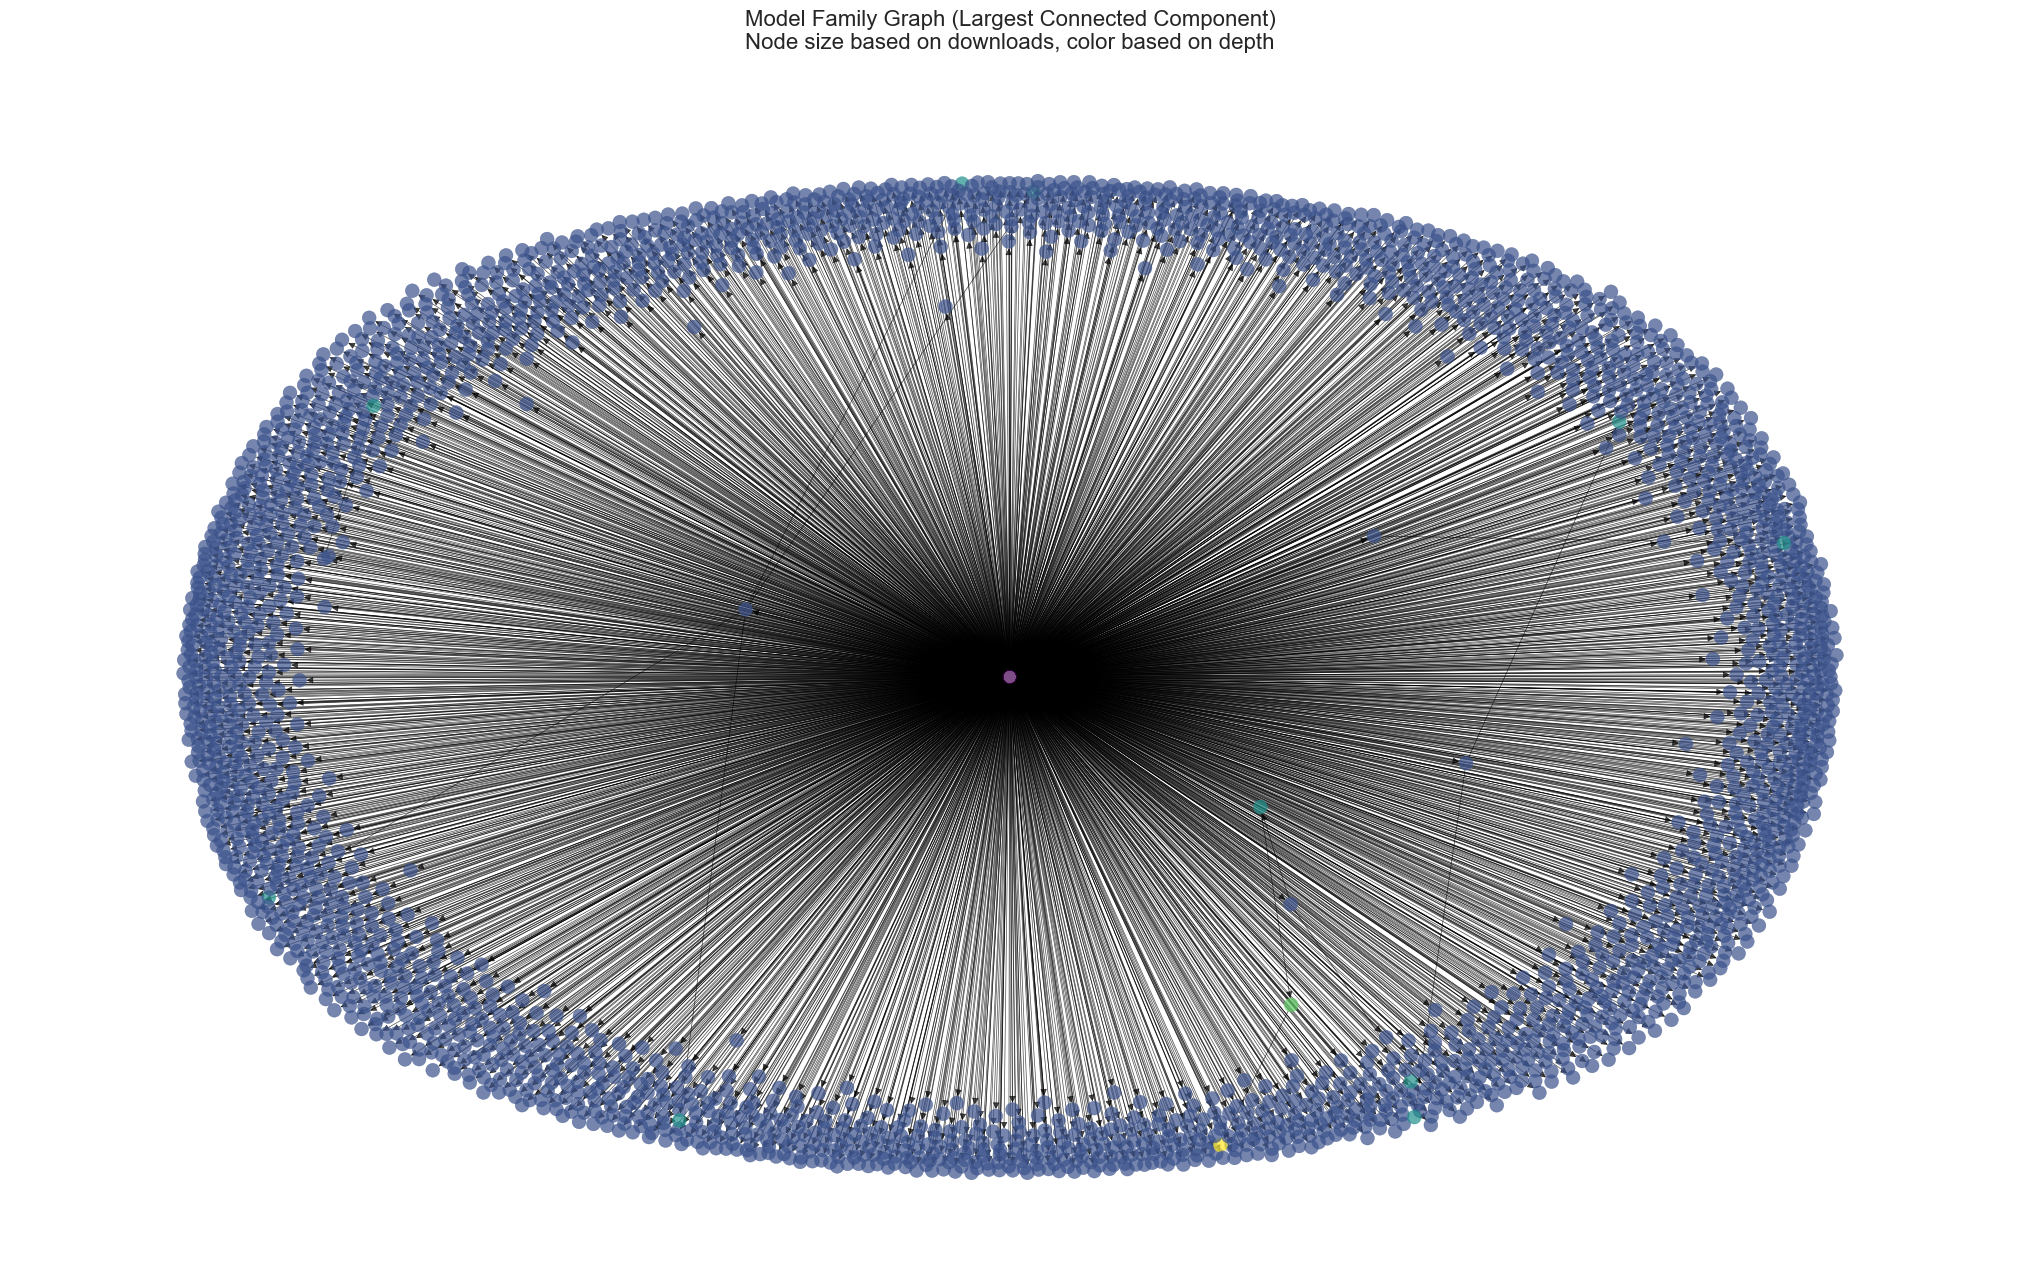

In [8]:
# Visualize a subgraph of the largest connected component
largest_cc = max(nx.weakly_connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

plt.figure(figsize=(20, 12))

# Calculate node sizes based on downloads
downloads = [subgraph.nodes[node]['downloads'] for node in subgraph.nodes()]
max_downloads = max([max(downloads),1]) if downloads else 1
node_sizes = [max(100, (subgraph.nodes[node]['downloads'] / max_downloads) * 1000) for node in subgraph.nodes()]

# Get node colors based on depth
node_colors = [subgraph.nodes[node]['depth'] for node in subgraph.nodes()]

# Create a spring layout
pos = nx.spring_layout(subgraph, k=0.15, iterations=50)

# Draw the graph
nx.draw(subgraph, pos,
        node_size=node_sizes,
        node_color=node_colors,
        cmap=plt.cm.viridis,
        with_labels=False,
        arrows=True,
        width=0.5,
        alpha=0.7)

plt.title("Model Family Graph (Largest Connected Component)\nNode size based on downloads, color based on depth", 
          fontsize=16, pad=20)
plt.savefig('model_graph.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_99608/285515675.py:6: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(subgraph, prog="dot")


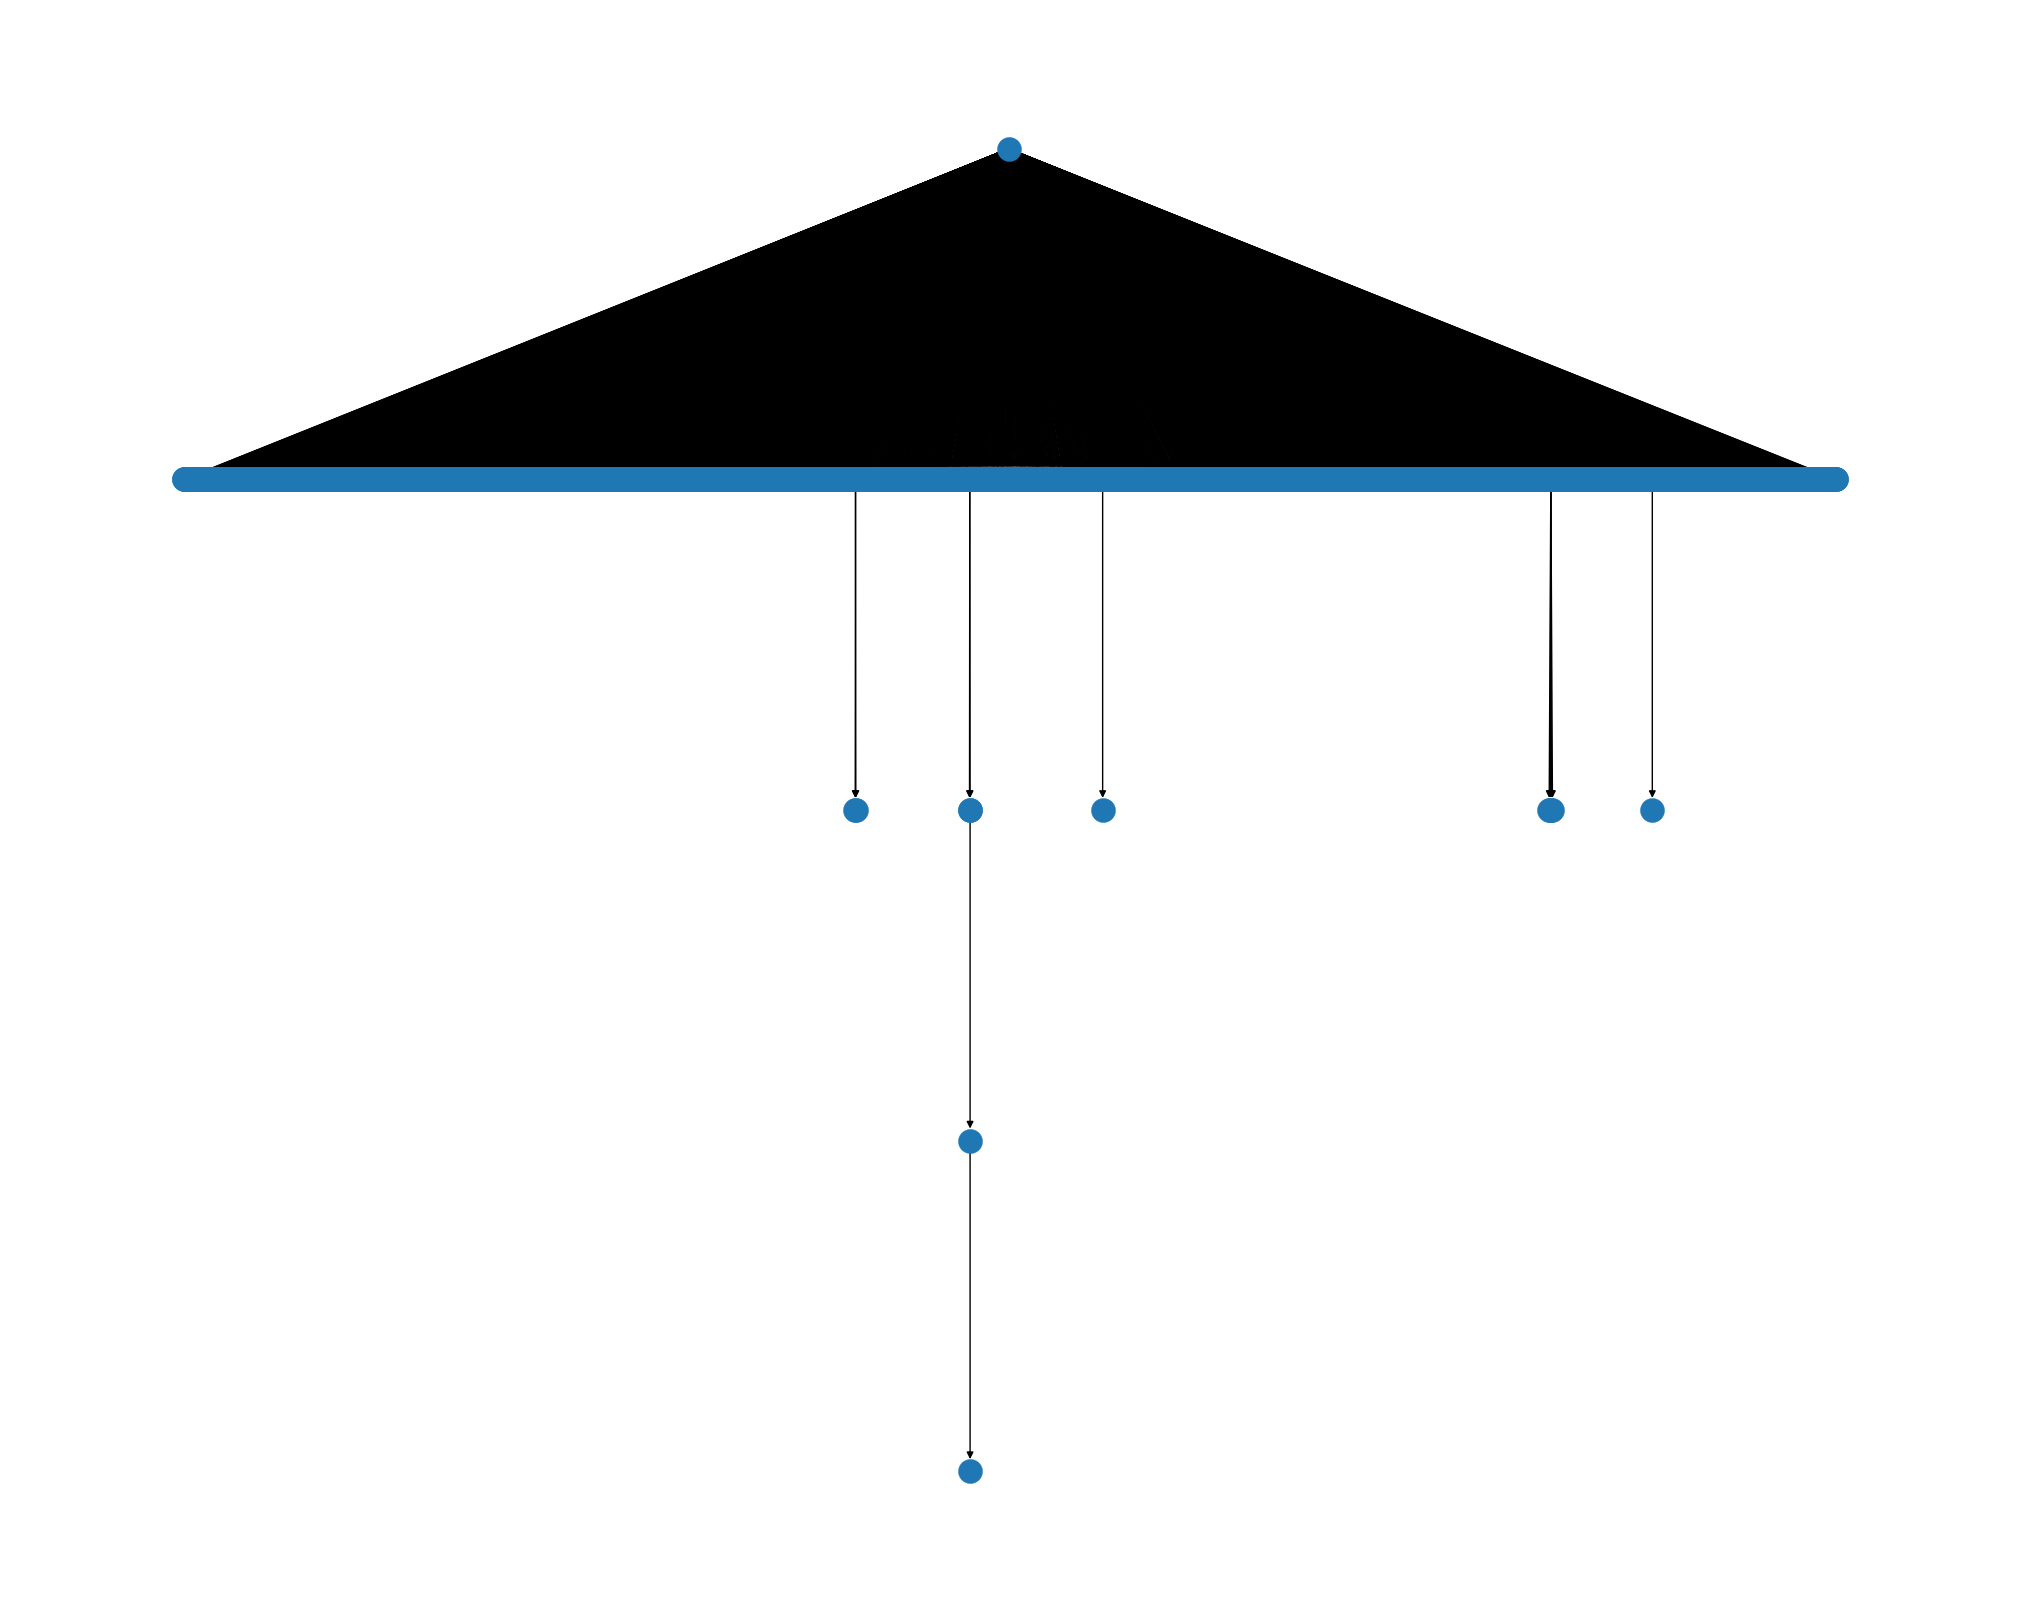

In [9]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

plt.figure(figsize=(20, 16))

pos = graphviz_layout(subgraph, prog="dot")
nx.draw(subgraph, pos)

plt.show()

/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_93897/2844638044.py:6: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(subgraph, prog="dot")


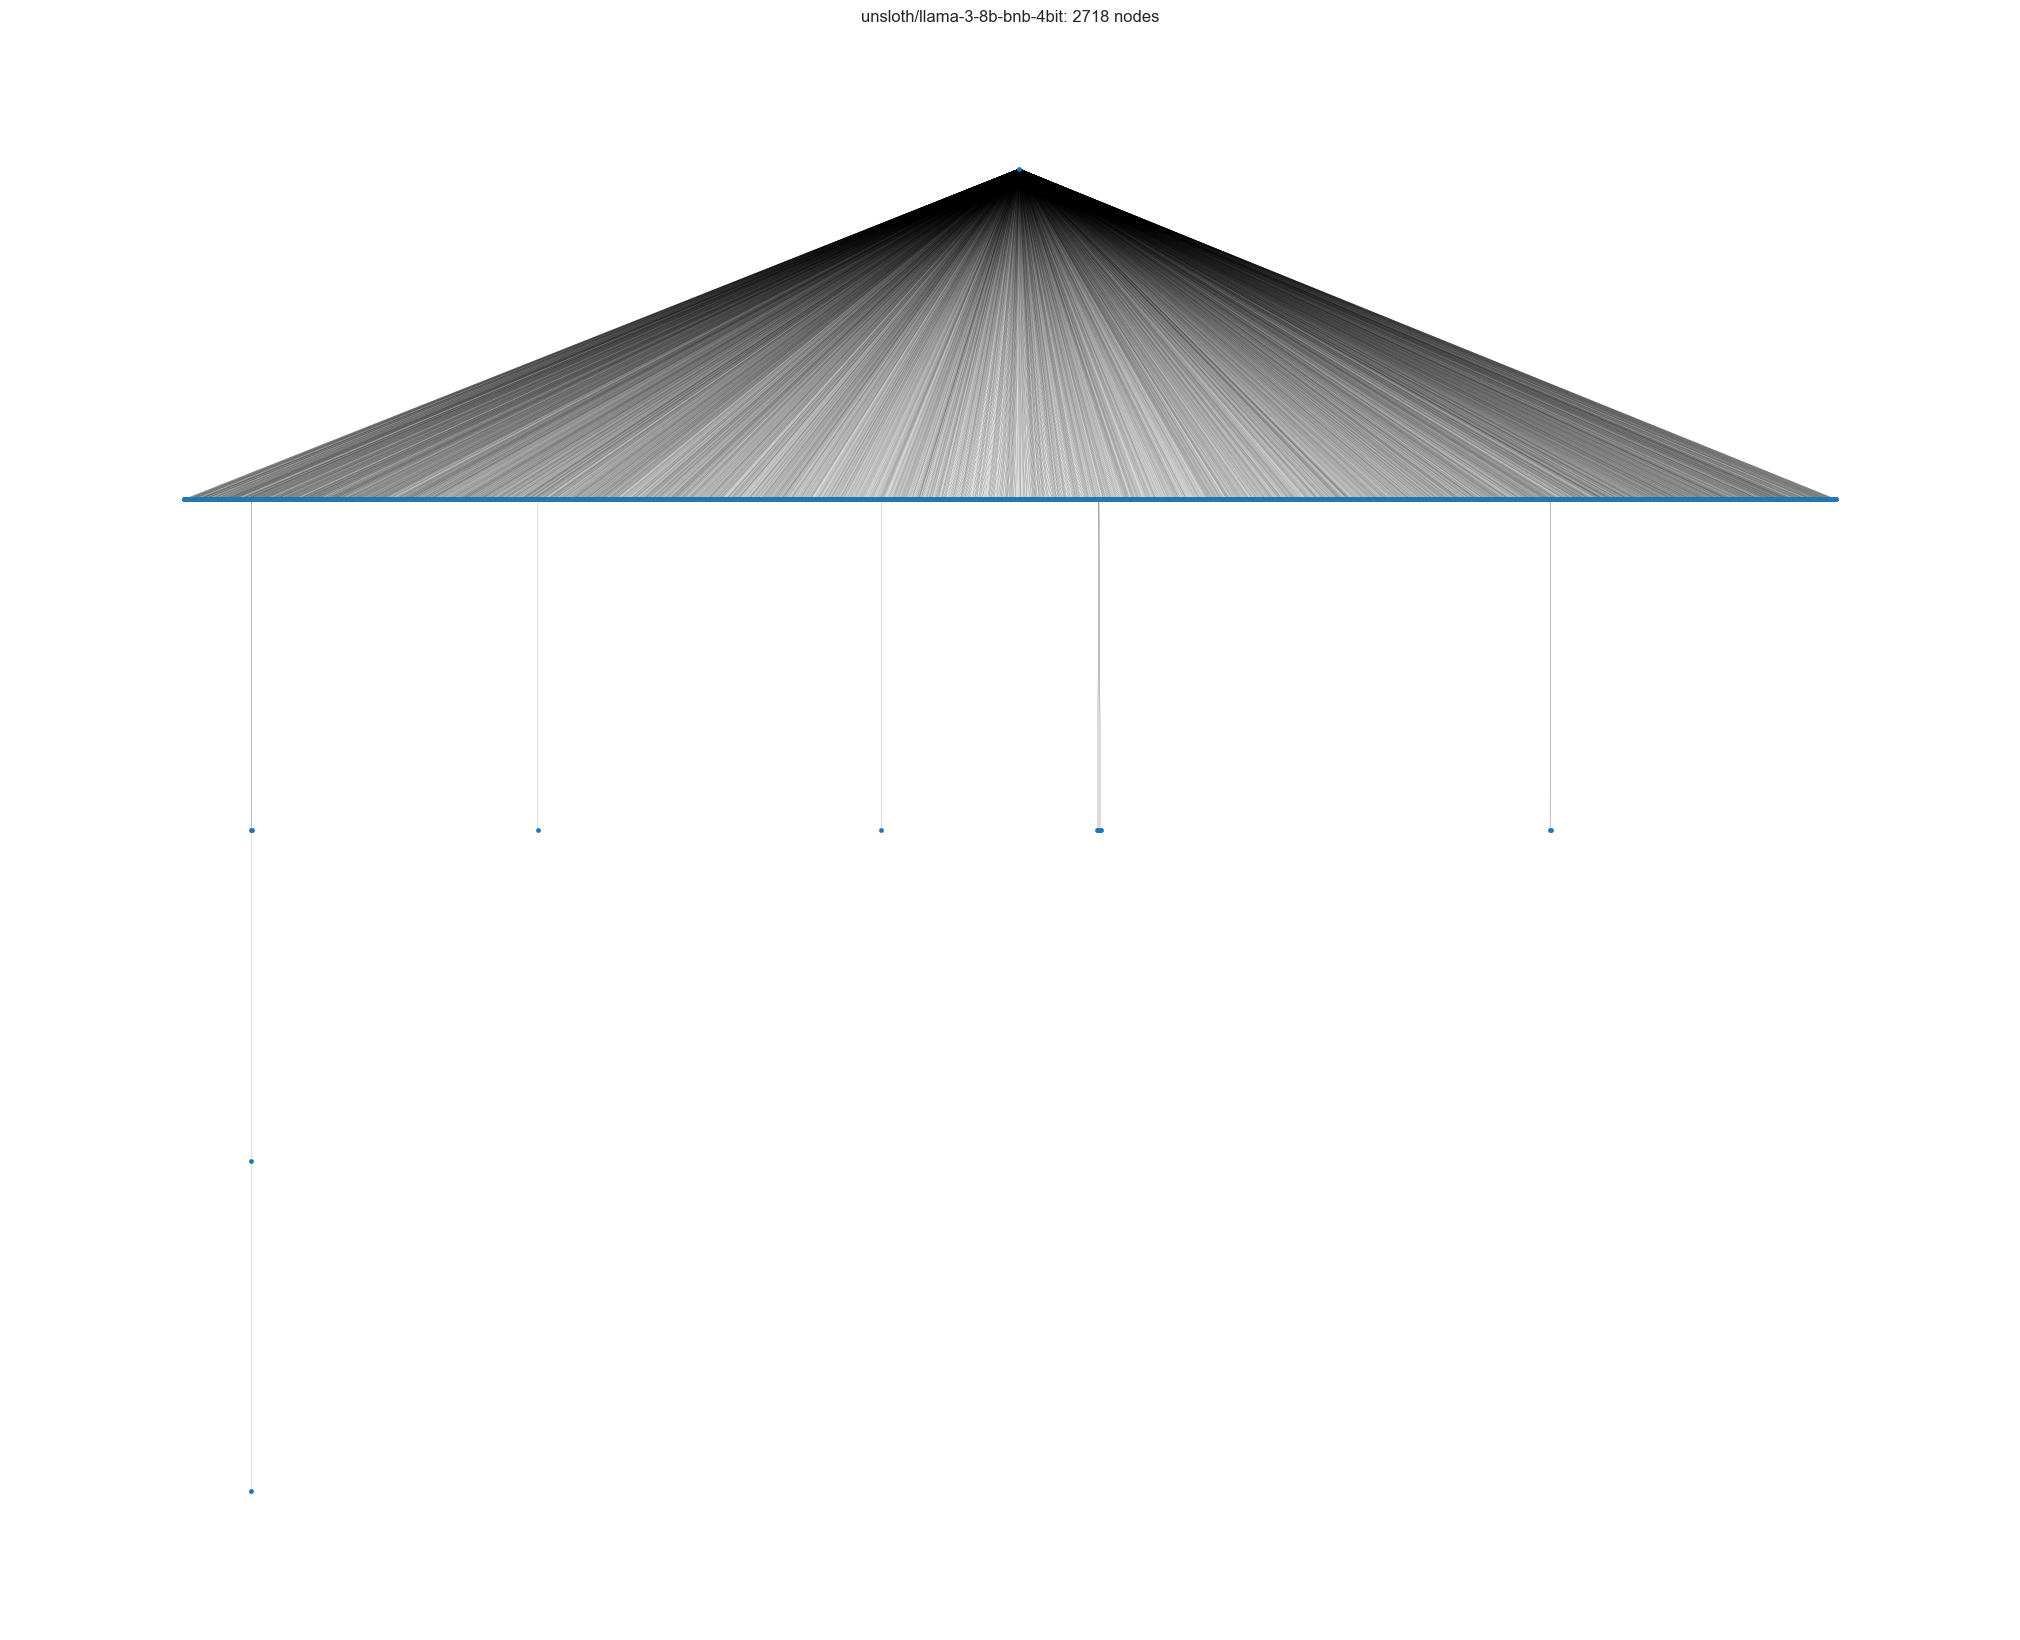

In [64]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

plt.figure(figsize=(20, 16))

pos = graphviz_layout(subgraph, prog="dot")
nx.draw(subgraph, pos, node_size=10, width=0.1, arrowstyle='-')

#Title the graph with the model_id of the base node and the number of nodes.
# Start by finding the base node using the index where the pos has the highest y value
pos_dict = dict(pos)
base_node = list(subgraph.nodes())[np.argmax(np.array(list(pos_dict.values()))[:,1])]
# Now title the graph with the model_id of the base node and the number of nodes
plt.title(f"{base_node}: {subgraph.number_of_nodes()} nodes")

# Save the graph to a file using the base_model as the filename, replacing the / with a _
plt.savefig(f'model_tree_visuals/{base_node.replace("/", "_")}.png', dpi=300, bbox_inches='tight')

plt.show()

/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_93897/66409655.py:3: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(subgraph2, prog="dot")


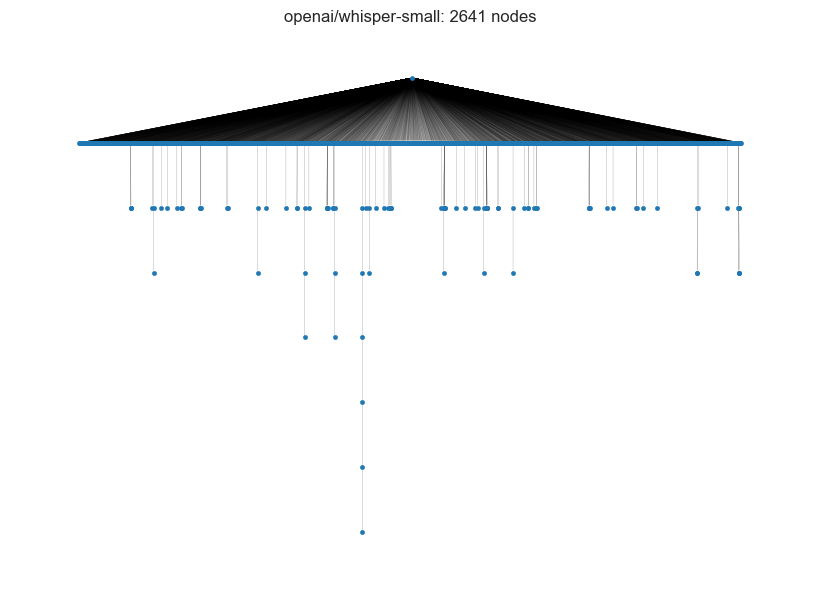

In [65]:
# Now visualize the second largest connected component
subgraph2 = G.subgraph(sorted(nx.weakly_connected_components(G), key=len, reverse=True)[1])
pos = graphviz_layout(subgraph2, prog="dot")
nx.draw(subgraph2, pos, node_size=10, width=0.1, arrowstyle='-')

#Title the graph with the model_id of the base node and the number of nodes.
# Start by finding the base node using the index where the pos has the highest y value
pos_dict = dict(pos)
base_node = list(subgraph2.nodes())[np.argmax(np.array(list(pos_dict.values()))[:,1])]
# Now title the graph with the model_id of the base node and the number of nodes
plt.title(f"{base_node}: {subgraph2.number_of_nodes()} nodes")

# Save the graph to a file using the base_model as the filename, replacing the / with a _
plt.savefig(f'model_tree_visuals/{base_node.replace("/", "_")}.png', dpi=300, bbox_inches='tight')

plt.show()


/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_93897/1343733314.py:3: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(subgraph3, prog="dot")


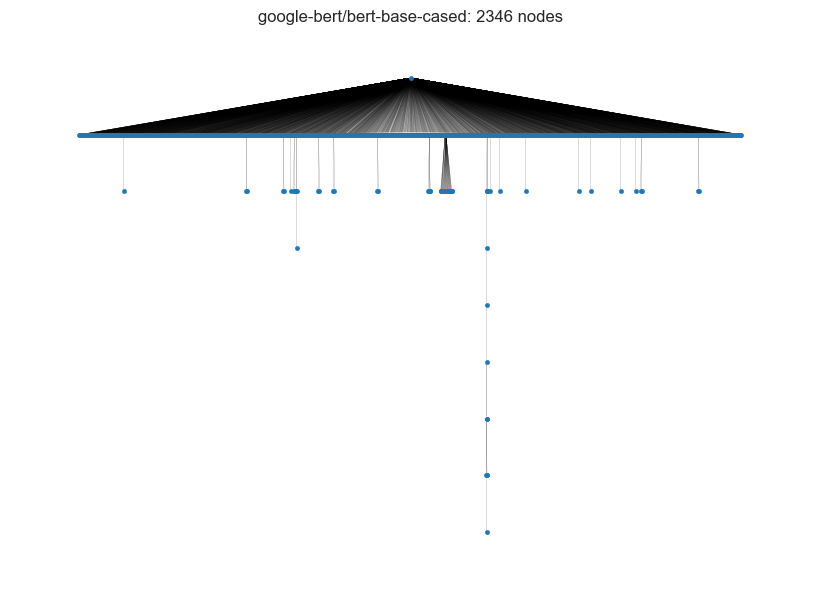

In [66]:
# Now visualize the third largest connected component
subgraph3 = G.subgraph(sorted(nx.weakly_connected_components(G), key=len, reverse=True)[2])
pos = graphviz_layout(subgraph3, prog="dot")
nx.draw(subgraph3, pos, node_size=10, width=0.1, arrowstyle='-')

#Title the graph with the model_id of the base node and the number of nodes.
# Start by finding the base node using the index where the pos has the highest y value
pos_dict = dict(pos)
base_node = list(subgraph3.nodes())[np.argmax(np.array(list(pos_dict.values()))[:,1])]
# Now title the graph with the model_id of the base node and the number of nodes
plt.title(f"{base_node}: {subgraph3.number_of_nodes()} nodes")

# Save the graph to a file using the base_model as the filename, replacing the / with a _
plt.savefig(f'model_tree_visuals/{base_node.replace("/", "_")}.png', dpi=300, bbox_inches='tight')

plt.show()


/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_93897/552499263.py:3: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(subgraph4, prog="dot")


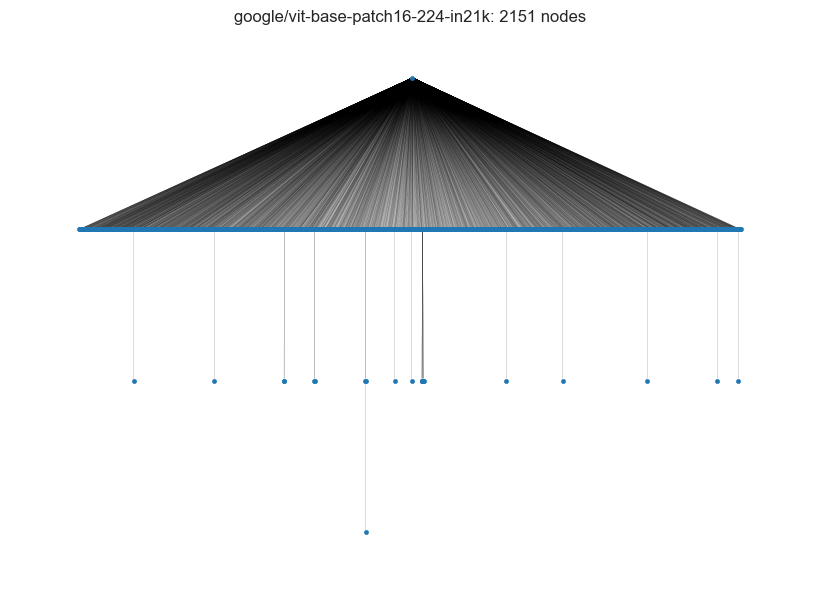

In [67]:
# Now visualize the fourth largest connected component. Edges should be lines, not arrows.
subgraph4 = G.subgraph(sorted(nx.weakly_connected_components(G), key=len, reverse=True)[3])
pos = graphviz_layout(subgraph4, prog="dot")
nx.draw(subgraph4, pos, node_size=10, width=0.1, arrowstyle='-')

#Title the graph with the model_id of the base node and the number of nodes.
# Start by finding the base node using the index where the pos has the highest y value
pos_dict = dict(pos)
base_node = list(subgraph4.nodes())[np.argmax(np.array(list(pos_dict.values()))[:,1])]
# Now title the graph with the model_id of the base node and the number of nodes
plt.title(f"{base_node}: {subgraph4.number_of_nodes()} nodes")

# Save the graph to a file using the base_model as the filename, replacing the / with a _
plt.savefig(f'model_tree_visuals/{base_node.replace("/", "_")}.png', dpi=300, bbox_inches='tight')

plt.show()



/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_93897/2317110352.py:3: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(subgraph5, prog="dot")


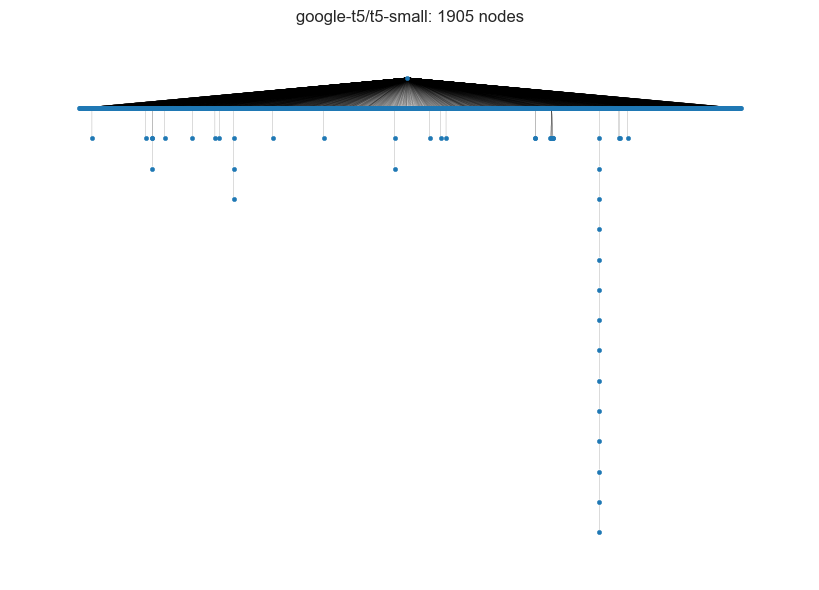

In [68]:
# Now visualize the fifth largest connected component. Edges should be lines, not arrows.
subgraph5 = G.subgraph(sorted(nx.weakly_connected_components(G), key=len, reverse=True)[4])
pos = graphviz_layout(subgraph5, prog="dot")
nx.draw(subgraph5, pos, node_size=10, width=0.1, arrowstyle='-')

#Title the graph with the model_id of the base node and the number of nodes.
# Start by finding the base node using the index where the pos has the highest y value  
pos_dict = dict(pos)
base_node = list(subgraph5.nodes())[np.argmax(np.array(list(pos_dict.values()))[:,1])]
# Now title the graph with the model_id of the base node and the number of nodes
plt.title(f"{base_node}: {subgraph5.number_of_nodes()} nodes")

# Save the graph to a file using the base_model as the filename, replacing the / with a _
plt.savefig(f'model_tree_visuals/{base_node.replace("/", "_")}.png', dpi=300, bbox_inches='tight')

plt.show()



/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_99608/2780724125.py:18: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(subgraph_i, prog="dot")
/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_99608/2780724125.py:18: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(subgraph_i, prog="dot")
/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_99608/2780724125.py:18: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layou

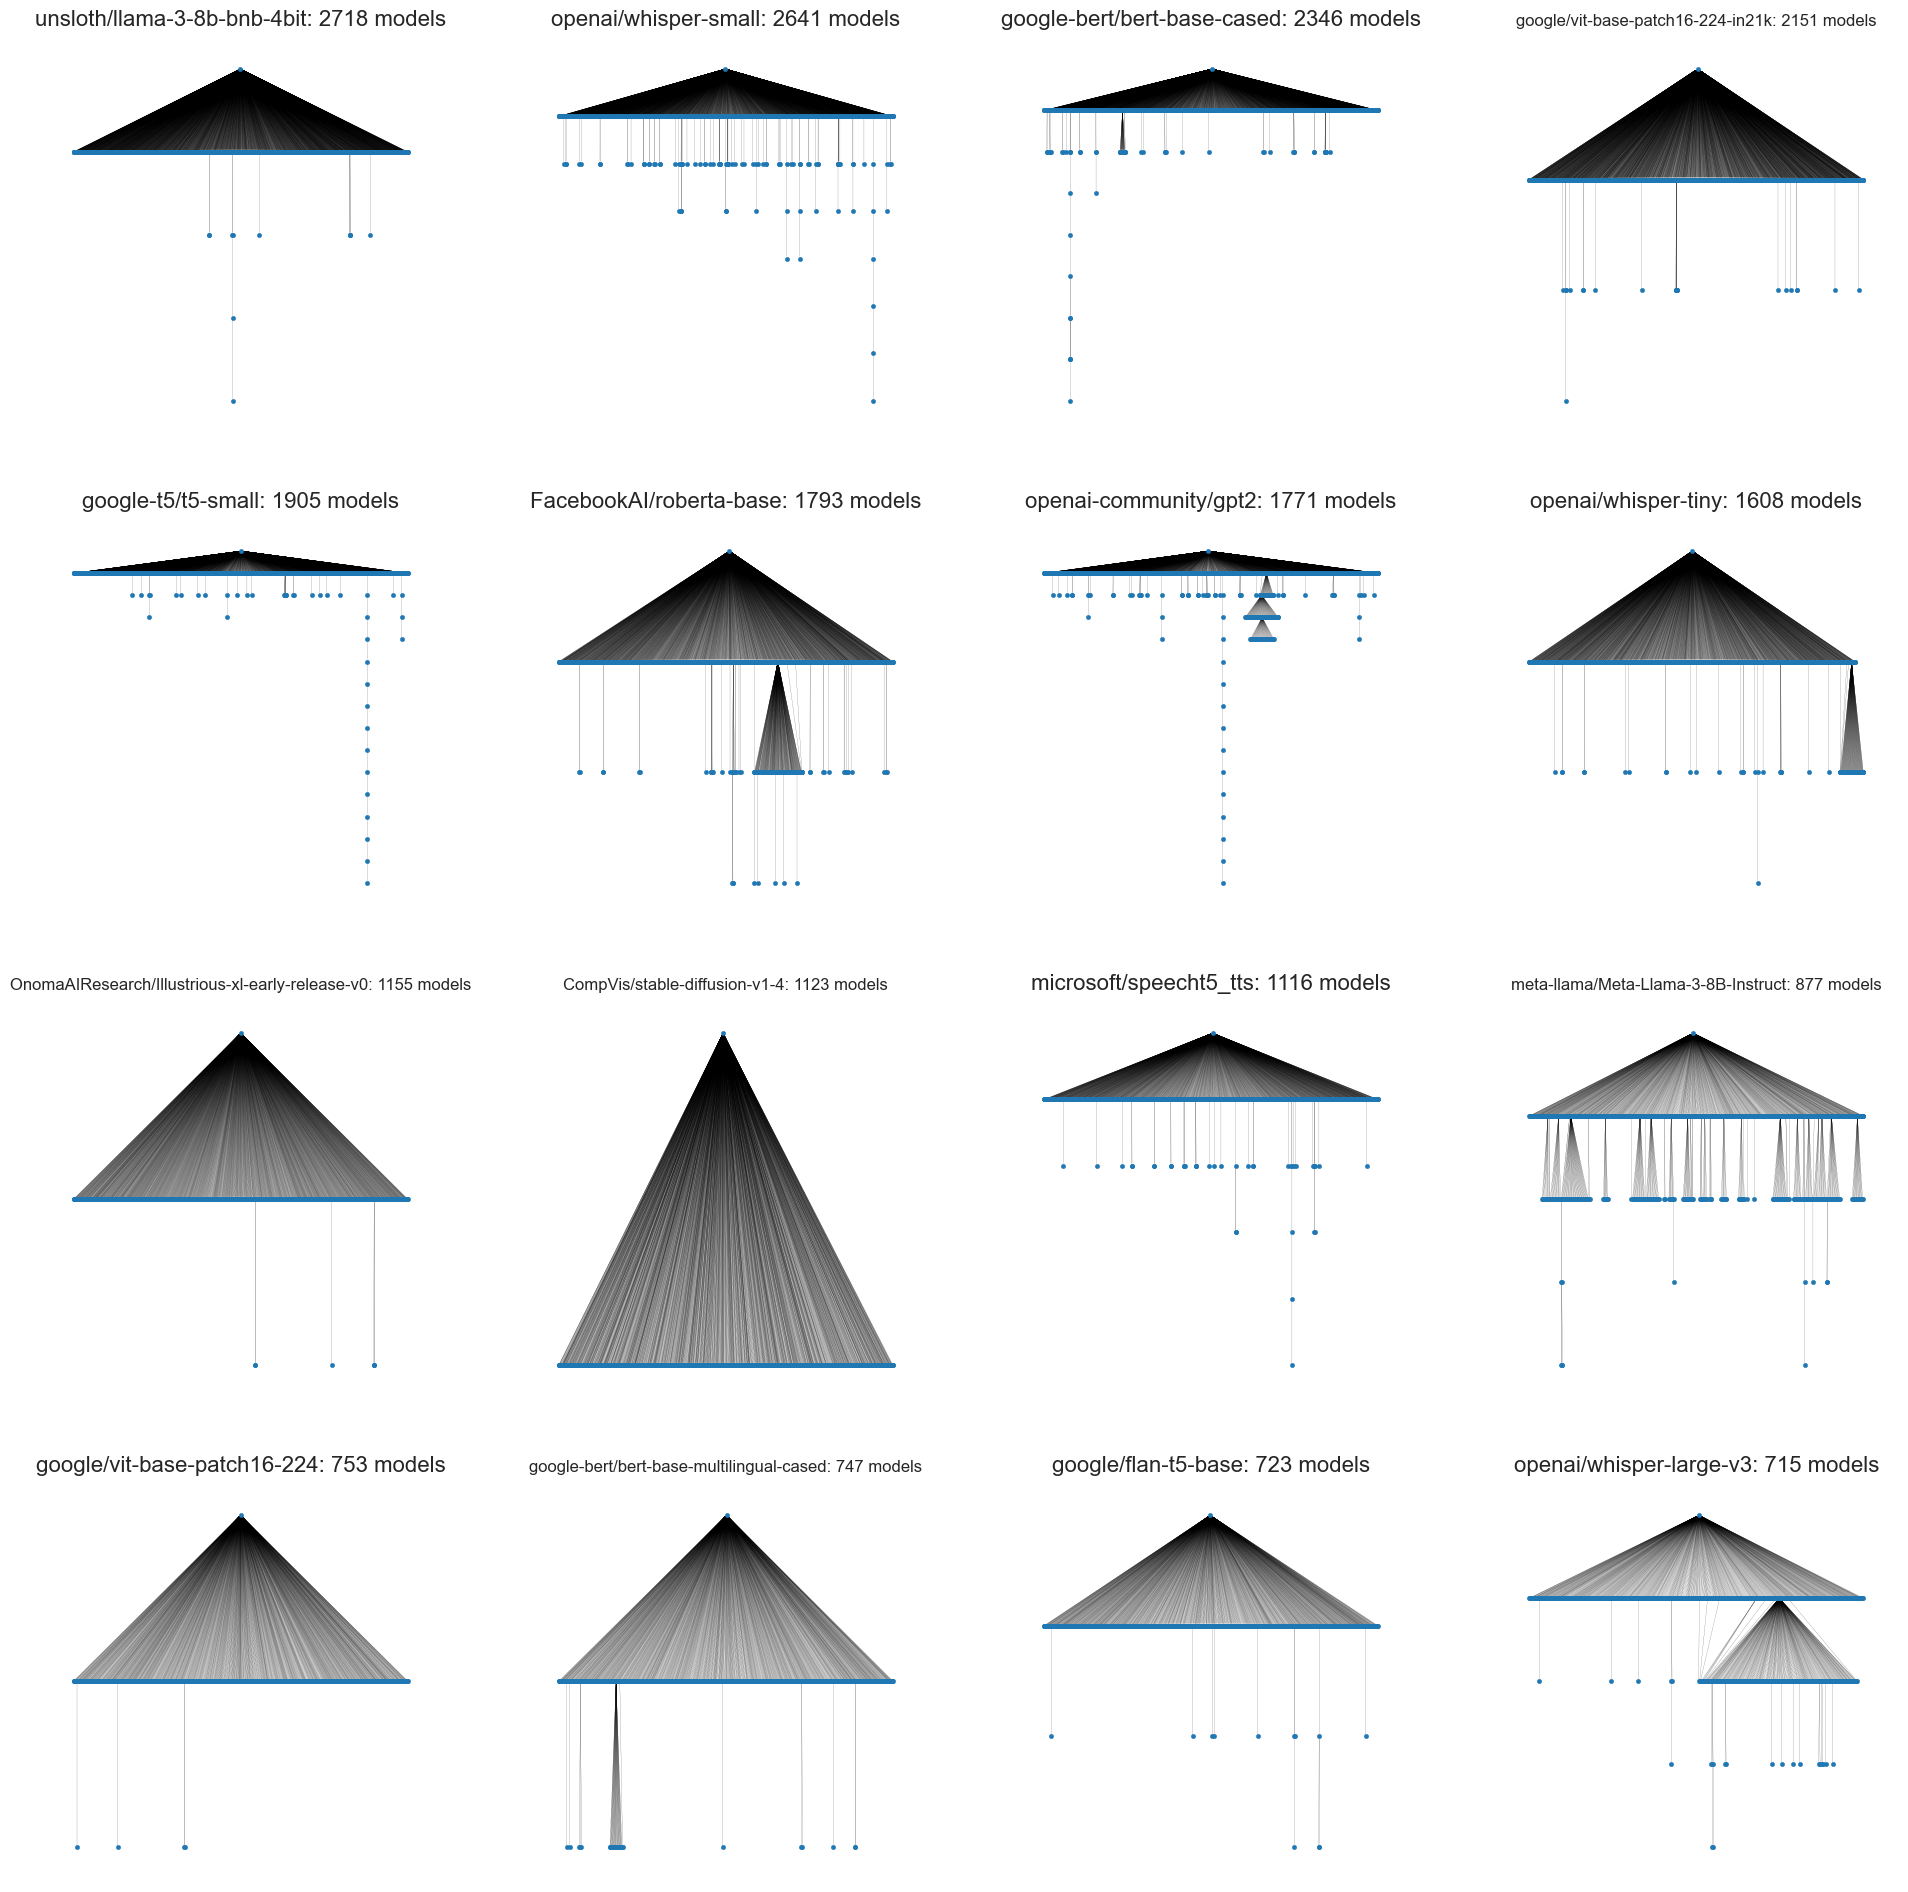

In [10]:
# Now create a nxn grid of plots, depicting the n*n largest connected components.

# Get the 4 largest connected components
#connected_components = sorted(nx.weakly_connected_components(G), key=len, reverse=True)[:4]

#4x4 takes 5min
one_side = 4

# Create a 3x3 grid of plots
fig, axes = plt.subplots(one_side, one_side, figsize=(24, 24))

# Iterate through the connected components and plot them in the grid
for i in range(one_side * one_side):
    # get the subgraph of the ith largest connected component
    subgraph_i = G.subgraph(sorted(nx.weakly_connected_components(G), key=len, reverse=True)[i])

    #Get the positions of the nodes in the subgraph
    pos = graphviz_layout(subgraph_i, prog="dot")
    #Get the base node of the subgraph
    base_node = list(subgraph_i.nodes())[np.argmax(np.array(list(pos.values()))[:,1])]
    # plot the subgraph
    # If the title is too long, make it smaller

    title = f"{base_node}: {subgraph_i.number_of_nodes()} models"
    fontsize=16
    if len(title)>40:
        fontsize=12
    if len(title)>65:
        fontsize=10
    if len(title)>80:
        fontsize=8
    if len(title)>100:
        fontsize=6
    axes[i // one_side, i % one_side].set_title(title,fontsize=fontsize)
    nx.draw(subgraph_i, pos, node_size=10, width=0.1, arrowstyle='-',ax=axes[i // one_side, i % one_side])


# Save the graph to a file using the base_model as the filename, replacing the / with a _
plt.savefig(f'model_tree_visuals/{one_side}x{one_side}_largest_connected_components.png', dpi=400, bbox_inches='tight')

plt.show()


# Analyze the entire graph

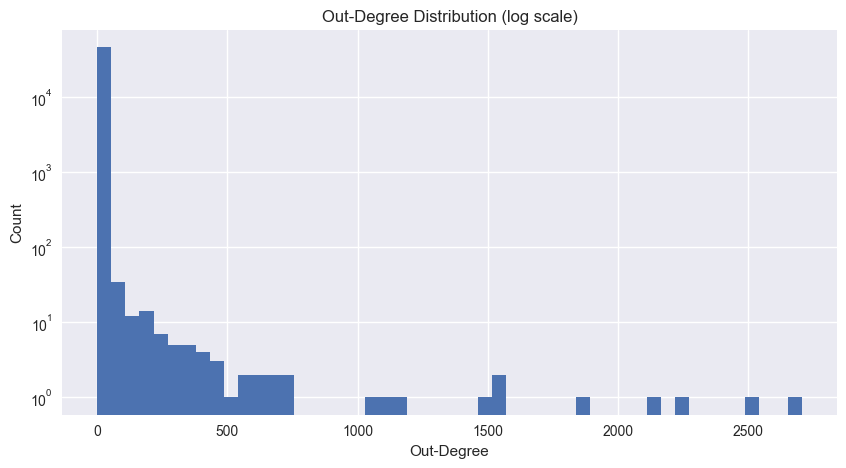

In [145]:
# Plot the distribution of out-degrees in the entire graph
plt.figure(figsize=(10, 5))
plt.hist(out_degrees, bins=50, log=True)
plt.title('Out-Degree Distribution (log scale)')
plt.xlabel('Out-Degree')
plt.ylabel('Count')

# Save figure in the general-analysis folder
plt.savefig('general-analysis/out-degree-distribution.png', dpi=300, bbox_inches='tight')

plt.show()



In [47]:
print(df.loc[0,'metadata'])
# Convert the metadata to a json
#Now do this for every row in the dataframe. Handle the case where the metadata is not a json.
df['metadata_json'] = df['metadata'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
df['created_at'] = df['metadata_json'].apply(lambda x: x['created_at'] if isinstance(x, dict) and 'created_at' in x else None)
print(df.loc[0,'created_at'])


{"id": "CausalLM/14B", "author": "CausalLM", "sha": "cc054cf5953252d0709cb3267d1a85246e489e95", "last_modified": "2023-12-10 01:21:49+00:00", "created_at": "2023-10-22 11:19:12+00:00", "private": false, "gated": false, "disabled": false, "downloads": 465, "downloads_all_time": null, "likes": 303, "library_name": "transformers", "gguf": null, "inference": null, "inference_provider_mapping": null, "tags": ["transformers", "pytorch", "llama", "text-generation", "llama2", "qwen", "causallm", "en", "zh", "dataset:JosephusCheung/GuanacoDataset", "dataset:Open-Orca/OpenOrca", "dataset:stingning/ultrachat", "dataset:meta-math/MetaMathQA", "dataset:liuhaotian/LLaVA-Instruct-150K", "dataset:jondurbin/airoboros-3.1", "dataset:WizardLM/WizardLM_evol_instruct_V2_196k", "dataset:RyokoAI/ShareGPT52K", "dataset:RyokoAI/Fandom23K", "dataset:milashkaarshif/MoeGirlPedia_wikitext_raw_archive", "dataset:wikipedia", "dataset:wiki_lingua", "dataset:fnlp/moss-003-sft-data", "dataset:garage-bAInd/Open-Platypus

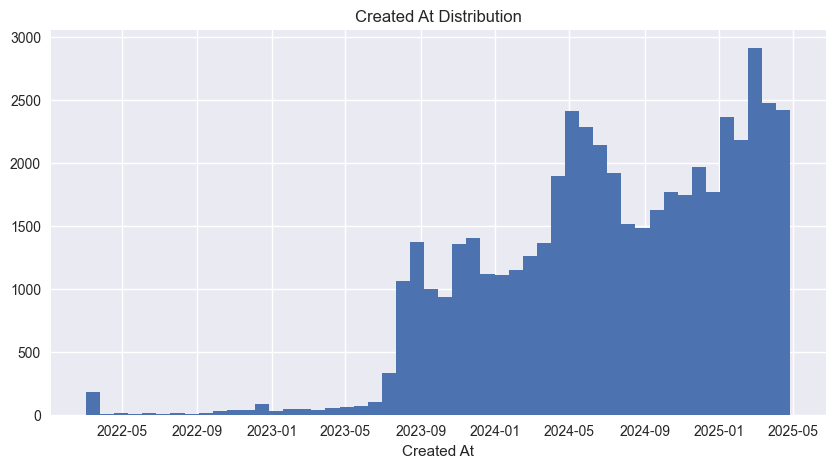

In [146]:
# Our goal is to plot the distribution of the created_at date. Start by importing any necessary libraries related to dates, times and plotting
from dateutil import parser

# Currently, the created_at is a string. Convert it to a datetime object.
df['created_at'] = pd.to_datetime(df['created_at'])
df_to_plot = df[df['created_at'].notna()]

# Next, we convert all created_at dates to a number for plotting a histogram.
#df_to_plot['created_at_num'] = df_to_plot['created_at'].apply(lambda x: x.timestamp())

#Next, we plot the distribution of the created_at date. Add code to skip the case where the created_at is not a date.
plt.figure(figsize=(10, 5))
plt.hist(df_to_plot['created_at'], bins=50)
plt.title('Created At Distribution')
plt.xlabel('Created At')

# Save figure in the general-analysis folder
plt.savefig('general-analysis/created-at-distribution.png', dpi=300, bbox_inches='tight')

plt.show()


In [68]:
years_represented

[2022, 2023, 2024, 2025]

In [ ]:
# Create a new column with a distinct numerical model_tree id for every connected component in the graph.

# Cycle through every connected component in the graph.
for component in nx.weakly_connected_components(G):
    # Fine the base model id for every connected component
    # Get the row index of the model id with the lowest in-degree.
    base_model  = min(component, key=lambda x: G.in_degree(x))
    # Add a new column with the base model id for every connected component
    df.loc[df['model_id'].isin(component), 'model_tree_id'] = base_model


model_id  \
0                                CausalLM/14B   
1                      cgus/CausalLM-14B-exl2   
2                         lokCX/4x-Ultrasharp   
3                            syaimu/7th_Layer   
4                          ali-vilab/ACE_Plus   
...                                       ...   
51932               cerspense/zeroscope_v2_XL   
51933                     zed-industries/zeta   
51934                AlejandroOlmedo/zeta-mlx   
51935  mlx-community/zed-industries-zeta-fp16   
51936            StreetLighter/Street_Lighter   

                                                    card  \
0      ---\nlicense: wtfpl\ndatasets:\n- JosephusCheu...   
1      ---\nbase_model: CausalLM/14B\ndatasets:\n- Jo...   
2                                                    NaN   
3      ---\nlicense: other\n---\n\n## / 7th Layer /\n...   
4      <p align="center">\n\n  <h2 align="center"><im...   
...                                                  ...   
51932  ---\npipeline_tag: video-to-video\nlicense: cc...   
51933  ---\ndatasets:\n- zed-industries/zeta\nlicense...   
51934  ---\ndatasets:\n- zed-industries/zeta\nlicense...   
51935  ---\ndatasets:\n- zed-industries/zeta\nlicense...   
51936  ---\nlicense: apache-2.0\ndatasets:\n- a-m-tea...   

                                                metadata  depth  \
0      {"id": "CausalLM/14B", "author": "CausalLM", "...      0   
1      {"id": "cgus/CausalLM-14B-exl2", "author": "cg...      1   
2      {"id": "lokCX/4x-Ultrasharp", "author": "lokCX...      0   
3      {"id": "syaimu/7th_Layer", "author": "syaimu",...      0   
4      {"id": "ali-vilab/ACE_Plus", "author": "ali-vi...      0   
...                                                  ...    ...   
51932  {"id": "cerspense/zeroscope_v2_XL", "author": ...      0   
51933  {"id": "zed-industries/zeta", "author": "zed-i...      0   
51934  {"id": "AlejandroOlmedo/zeta-mlx", "author": "...      1   
51935  {"id": "mlx-community/zed-industries-zeta-fp16...      1   
51936  {"id": "StreetLighter/Street_Lighter", "author...      1   

                                                children  children_count  \
0          https://huggingface.co/cgus/CausalLM-14B-exl2               1   
1                                                    NaN               0   
2                                                    NaN               0   
3                                                    NaN               0   
4                                                    NaN               0   
...                                                  ...             ...   
51932                                                NaN               0   
51933  https://huggingface.co/AlejandroOlmedo/zeta-ml...               3   
51934                                                NaN               0   
51935                                                NaN               0   
51936                                                NaN               0   

                                                adapters  adapters_count  \
0      https://huggingface.co/Crystal427/CrystalNovel...             1.0   
1                                                    NaN             0.0   
2                                                    NaN             0.0   
3                                                    NaN             0.0   
4                                                    NaN             0.0   
...                                                  ...             ...   
51932                                                NaN             0.0   
51933                                                NaN             0.0   
51934                                                NaN             0.0   
51935                                                NaN             0.0   
51936                                                NaN             0.0   

                                               quantized  quantized_count  \
0      https://hugg

In [110]:
# Count the values of the model_tree_id column
df['model_tree_id'].value_counts()[:16]

#Notice this is different from the counts produced using the graph. We need to check this later.

# For each connected component, compute the weiner index.
# Compute the weiner index for each connected component
for component in nx.weakly_connected_components(G):
    # Get the base model id for the connected component
    base_model = min(component, key=lambda x: G.in_degree(x))
    # Get the undirected subgraph of the connected component, ignoring the edge direction
    subgraph = G.subgraph(component)
    # Convert the subgraph to an undirected graph
    subgraph = subgraph.to_undirected()
    # Compute the weiner index for the connected component
    weiner_index = nx.wiener_index(subgraph)
    # Add the weiner index to the dataframe
    df.loc[df['model_id'].isin(component), 'weiner_index'] = weiner_index
    #Compute also the weiner index normalized by the number of nodes in the connected component
    df.loc[df['model_id'].isin(component), 'weiner_index_normalized'] = weiner_index / len(subgraph.nodes())


In [111]:
#Create a column with the size of the connected component, for every connected component in the graph.
for component in nx.weakly_connected_components(G):
    # Get the base model id for the connected component
    base_model = min(component, key=lambda x: G.in_degree(x))
    # Get the size of the connected component
    size = len(G.subgraph(component))
    # Add the size to the dataframe
    df.loc[df['model_id'].isin(component), 'size'] = size


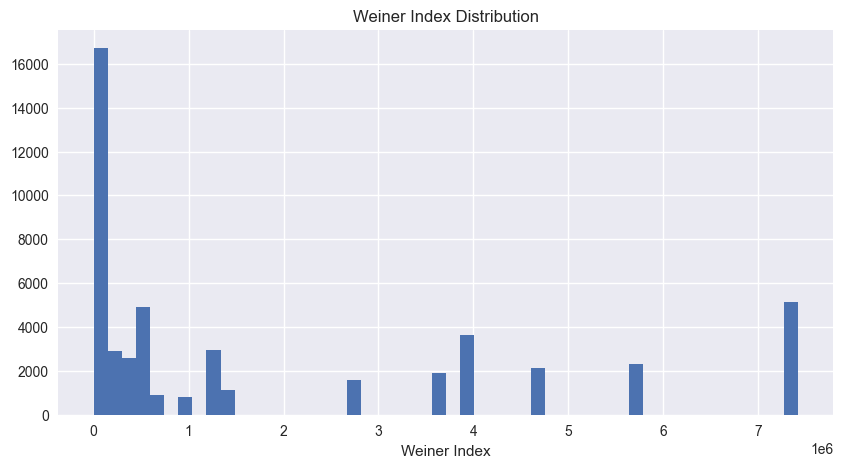

In [112]:
# Plot the distribution of the weiner index. Do not include the case where the weiner index is not a number or infinite.
df_to_plot = df[df['weiner_index'].notna() & (df['weiner_index'] != np.inf)]
plt.figure(figsize=(10, 5))
plt.hist(df_to_plot['weiner_index'], bins=50)
plt.title('Weiner Index Distribution')
plt.xlabel('Weiner Index')

plt.show()

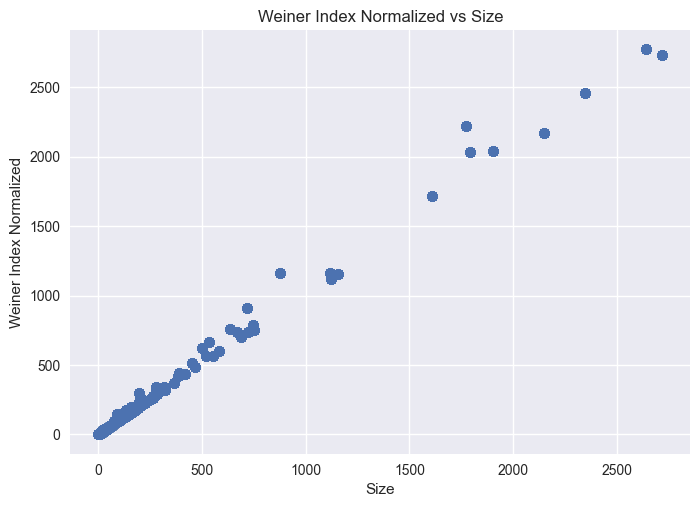

In [148]:
plt.scatter(df['size'],df['weiner_index_normalized'])
plt.xlabel('Size')
plt.ylabel('Weiner Index Normalized')

plt.title('Weiner Index Normalized vs Size')

# Save figure in the general-analysis folder
plt.savefig('general-analysis/weiner-index-distribution.png', dpi=300, bbox_inches='tight')

plt.show()


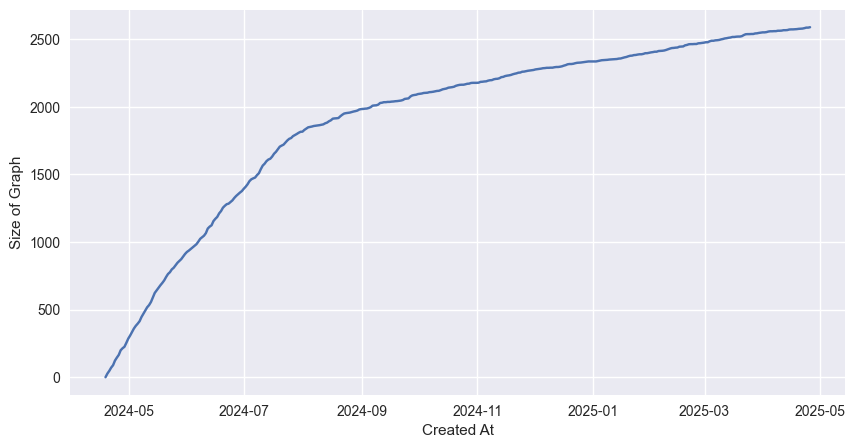

In [124]:
# For the largest connected component, plot the size of the graph over time using created_at date
import datetime
# Get the largest connected component
largest_component = max(nx.weakly_connected_components(G), key=len)
# Get the rows in the dataframe that are in the largest connected component
df_largest_component = df[df['model_id'].isin(largest_component)]

# Create an array of created_at dates by varying from the minimum to the maximum of the created_at dates in steps of 1 day. Be sure to handle the datetime format correctly.
created_at_dates = pd.date_range(start=df_largest_component['created_at'].min(), end=df_largest_component['created_at'].max(), freq='D')

# create an array of the size of the graph at each created_at date
size_of_graph = []
for date in created_at_dates:
    size_of_graph.append(len(df_largest_component[df_largest_component['created_at'] <= date]))
# plot the size of the graph over time
plt.figure(figsize=(10, 5))
plt.plot(created_at_dates, size_of_graph)
plt.xlabel('Created At')
plt.ylabel('Size of Graph')
plt.show()


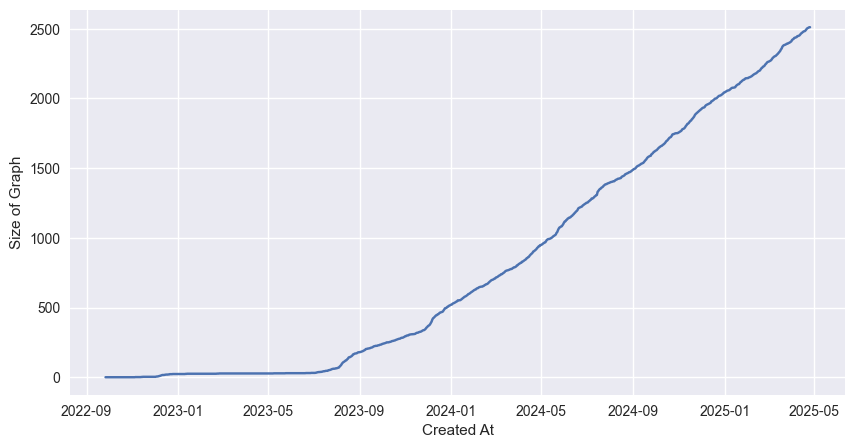

In [130]:
# For the second largest connected component, plot the size of the graph over time using created_at date
# Get the second largest connected component
second_largest_component = sorted(nx.weakly_connected_components(G), key=len, reverse=True)[1]
# Get the rows in the dataframe that are in the second largest connected component
df_second_largest_component = df[df['model_id'].isin(second_largest_component)]

# Create an array of created_at dates by varying from the minimum to the maximum of the created_at dates in steps of 1 day. Be sure to handle the datetime format correctly.
created_at_dates = pd.date_range(start=df_second_largest_component['created_at'].min(), end=df_second_largest_component['created_at'].max(), freq='D')

# create an array of the size of the graph at each created_at date
size_of_graph = []
for date in created_at_dates:
    size_of_graph.append(len(df_second_largest_component[df_second_largest_component['created_at'] <= date]))
# plot the size of the graph over time
plt.figure(figsize=(10, 5))
plt.plot(created_at_dates, size_of_graph)
plt.xlabel('Created At')
plt.ylabel('Size of Graph')
plt.show()


/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_99608/2930963541.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


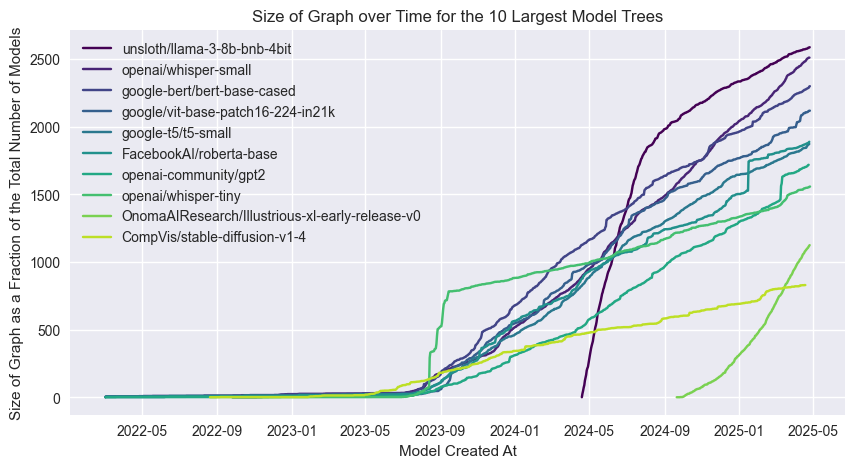

In [151]:
# Create a function that takes in a connected component and returns the size of the graph over time using created_at date
def plot_size_of_graph(connected_component):
    # Get the rows in the dataframe that are in the connected component
    df_component = df[df['model_id'].isin(connected_component)]
    # Create an array of created_at dates by varying from the minimum to the maximum of the created_at dates in steps of 1 day. Be sure to handle the datetime format correctly.
    created_at_dates = pd.date_range(start=df_component['created_at'].min(), end=df_component['created_at'].max(), freq='D')
    # create an array of the size of the graph at each created_at date
    size_of_graph = []
    for date in created_at_dates:
        size_of_graph.append(len(df_component[df_component['created_at'] <= date]))
    # plot the size of the graph over time
    return created_at_dates, size_of_graph

# now get this for the n largest connected components
n=10
cmap = plt.cm.get_cmap('viridis')
plt.figure(figsize=(10, 5))
for i in range(n):
    created_at_i, size_of_graph_i = plot_size_of_graph(sorted(nx.weakly_connected_components(G), key=len, reverse=True)[i])
    plt.plot(created_at_i, size_of_graph_i, label=df.loc[df['model_id'].isin(sorted(nx.weakly_connected_components(G), key=len, reverse=True)[i]), 'model_tree_id'].iloc[0], color=cmap(i/n))

plt.legend()

plt.title('Size of Graph over Time for the 10 Largest Model Trees')
plt.xlabel('Model Created At')
plt.ylabel('Size of Graph as a Fraction of the Total Number of Models')

# Save figure in the general-analysis folder
plt.savefig('general-analysis/size-of-graph-over-time.png', dpi=300, bbox_inches='tight')

plt.show()


In [127]:
# Now plot this for the 3 largest connected components.
# Get the 3 largest connected components
largest_components = sorted(nx.weakly_connected_components(G), key=len, reverse=True)[:3]

plt.figure(figsize=(10, 5))

# Cycle through each of the 3 largest connected components
for component in largest_components:
    # Get the rows in the dataframe that are in the connected component
    df_component = df[df['model_id'].isin(component)]
    # Create an array of created_at dates by varying from the minimum to the maximum of the created_at dates in steps of 1 day. Be sure to handle the datetime format correctly.
    created_at_dates = pd.date_range(start=df_component['created_at'].min(), end=df_component['created_at'].max(), freq='D')
    # Sort the created_at dates in ascending order
    created_at_dates = created_at_dates.sort_values()

    # create an array of the size of the graph at each created_at date
    size_of_graph = []
    for date in created_at_dates:
        size_of_graph.append(len(df_component[df_component['created_at'] <= date])/len(df_component))
    # plot the size of the graph over time
    plt.plot(created_at_dates, size_of_graph,label=component)

plt.xlabel('Created At')
plt.ylabel('Size of Graph as a Fraction of the Total Number of Models')
plt.title('Size of Graph over Time for the 3 Largest Connected Components')
plt.legend()
plt.show()


ValueError: Image size of 615846x468 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x500 with 1 Axes>

In [121]:
created_at_dates

DatetimeIndex(['2024-04-18 16:48:39+00:00', '2024-04-19 16:48:39+00:00',
               '2024-04-20 16:48:39+00:00', '2024-04-21 16:48:39+00:00',
               '2024-04-22 16:48:39+00:00', '2024-04-23 16:48:39+00:00',
               '2024-04-24 16:48:39+00:00', '2024-04-25 16:48:39+00:00',
               '2024-04-26 16:48:39+00:00', '2024-04-27 16:48:39+00:00',
               ...
               '2025-04-16 16:48:39+00:00', '2025-04-17 16:48:39+00:00',
               '2025-04-18 16:48:39+00:00', '2025-04-19 16:48:39+00:00',
               '2025-04-20 16:48:39+00:00', '2025-04-21 16:48:39+00:00',
               '2025-04-22 16:48:39+00:00', '2025-04-23 16:48:39+00:00',
               '2025-04-24 16:48:39+00:00', '2025-04-25 16:48:39+00:00'],
              dtype='datetime64[ns, UTC]', length=373, freq='D')

In [43]:
# Within the metadata, get the created_at date of the model
#for every row in the dataframe, convert the metadata to a json and get the created_at date
df['metadata'] = df['metadata'].apply(lambda x: json.loads(x))
df['created_at'] = df['metadata'].apply(lambda x: x['created_at'] if 'created_at' in x else None)
print(df.loc[0,'created_at'])

#First convert the metadata to a json
df['metadata'] = df['metadata'].apply(lambda x: json.loads(x))
#Next, get the created_at date, if it exists
df['created_at'] = df['metadata'].apply(lambda x: x['created_at'] if 'created_at' in x else None)
# Plot the distribution of the created_at date
plt.figure(figsize=(10, 5))
plt.hist(df['created_at'], bins=50)
plt.title('Created At Distribution')
plt.xlabel('Created At')

TypeError: the JSON object must be str, bytes or bytearray, not dict

In [22]:
# From the model cards, get the language of the card

#Import necessary libraries to recognize languages
from langdetect import detect

ModuleNotFoundError: No module named 'langdetect'

In [10]:
# Get the name of the base node of the largest connected component
base_node = list(max(nx.weakly_connected_components(subgraph), key=len))[0]
print(f"Base node of the largest connected component: {base_node}")
# Visualize the entire graph in a large-scale 

Base node of the largest connected component: TioPanda/pandev-blocks-v2


In [19]:
# Get the graph representing the top-3 largest connected components
# Below tries to subscript a set and therefore returns an error.
#G_top3 = G.subgraph(max(nx.weakly_connected_components(G), key=len)[:3])
# Instead, we can sort by number of nodes and take the top 3
G_top3 = sorted(nx.weakly_connected_components(G), key=len, reverse=True)[:3]
# Now create a new graph representing the top 3 largest connected components

print(nx.number_of_nodes(G_top3))
print(nx.number_of_edges(G_top3))
print(nx.number_weakly_connected_components(G_top3))
print(nx.number_strongly_connected_components(G_top3))


NetworkXError: Node {'TioPanda/pandev-blocks-v2', 'pinkpeach/llama3-8b-cosmic-fusion-dynamics-merged_16bit-vllm', 'ningrumdaud/test_lora_llama3model', 'twor-user/lora_model_1', 'AchrafGhribi31/llama3-esg-8b-merged-16bit', 'ebowwa/blender_python_code_interpreterv0.02', 'HanaHelaly/Llama-3-exam-Instruct', 'ankadev/bioai2', 'Akirami/llama3-8b-orpo-truthy', 'houbw/llama3_8b_bnb_4bit_ruozhiba_2', 'karsar/Llama3_8B_finetune', 'afzalzbr/Llama3-8B-en-de-chat', 'jiangcongtao/llama3-8b-oig-unsloth-merged', 'BhagavatiKumar/lora_model', 'samim2024/Llama-3-8b-finetuned-Super', 'lukaaaa/t2', 'btcsinc/unsloth-llama-3-8b-bnb-4bit-chainq-fast', 'ashrafulparan/llama-3-finetuned-for-subjectivity-english-16bit', 'itisarainyday/llama3-v-nice-2k-only-base_w_identify-data-4epoch-16-32lora-v43-5e4lr', 'LuanaMARD/historia', 'cookinai/Llama-3-SOLAR-v0.2', 'Sara0613/Llama3_dataset700_0802_v2', 'sravaniayyagari/llama3-8b-finetune', 'fatemes/testfintune', 'Nioooor/sampleModel', 'nicolarsen/LLama3-8B-Meoo', 'kingmadhu1/dolly_v1', 'dromeuf/RunDRTestUnslothAlpacaLlama38b_merged16', 'abdfajar707/llama3_8B_lora_model_rkp_v2', 'TarunKM/Test_Case_Json_Format_Model_3_Epochs', 'Shankhadeep144/lora_model', 'junxun/LLamav2', 'ne-al/llama-3-8b', 'Wasam12345/Llama3_Extraction', 'dromeuf/lora_model_test_alpaca_ll3_unsloth', 'derbali/Fine-Tunning-LLMA-3-Digitalization16', 'persistent/Llama-3-8b-text2cypher-recommendations-sft', 'streamtune/92d6214a-4202-4423-9519-7cf4439ab9e5', 'Abdulrhman146/lora_model', 'streamtune/8472d1ba-82df-4309-87ed-10800fff0826', 'Ali-PYT/Llama3-8b-instruct-MedBot', 'isthisx/unsloth_model', 'Pablo92/llama-3-8b-bnb-4bit-chess', 'AdrienB134/Llama-3-8B-ASN-alpha', 'kp15/llama3-8b-oig-unsloth-merged', 'A1fredPJX/BinClass_app19permission_Llama-3_8B_adapters', 'FareedKhan/llama-3-8b-unsloth-1-epoch-85000', 'elijahww/bylaw_llama3_lora', 'TuanThanhh/model_LoRA', 'aks1981/lora_llama-3-8b-bnb-4bit', 'sidddddddddddd/lora_model_10_examples11', '1z1/llama3-8b-oig-unsloth-merged', 'feliphe-galiza/llama-3-1B.italian-hypernyms', 'debashish1997/credio_itdr_model', 'tingting/llama3_lora_model_Data_40', 'Danielrahmai1991/llama3_model_v1', 'qijiabo/autotrain-llama-3-8b-puhui-1k-0703-1', 'johnjoy77777/lora_model_ectsum_full', 'jspr/smut_llama_8b_merged', 'NicoBeno/my_llama_mistral_m5', 'streamtune/0312605c-fb80-45a9-ba39-fb737f115b4c', 'Subh1111/my-model-llama3', 'TarunKM/custom-model-200-epochs', 'danielhanchen/lora_model_16062024', 'PythonCreate/my_model', 'jgeng/lora_model', 'lx1201/lora_model', 'btcsinc/unsloth-llama-3-8b-bnb-4bit-spider', 'amalmuhammed/Math_tuned_llama3', 'iceycloud/lora_model', 'chuquan282/llama3.1-translate_en_vi', 'atshao/lora_model', 'drgary/ft3_law3_lora_model', 'GoodLuck777/my-awesome-model', 'jco1/lora_model_10_01', 'sravaniayyagari/process-loans-llama', '1024m/LLAMA3-01-EXALT-1A-16bit', 'jirawan-chro/lora_model2', '1MK26/sample_llama3', 'SachaEL/LLAMA_DPO', 'NicoBeno/my_llama_mistral_m7', 'Markeeeey/bicycle_model5', 'persistent/Llama-3-8b-text2cypher-recommendations-gpt4o-sft-v2-bestckpt', 'tingting/llama3_lora_model_Data_50', 'aflah/llama-3-8b-bnb-4bit__Climate-Science-With-Identity-Epochs-1__LoRA-Only', 'auragFouad/llama3_finetuned_aspect_laptops', 'Mubin1917/orpo-lora_model', 'bartowski/L3-Zodiac-8B-ORPO-Base-exl2', 'adlbh/llama-3-8b-medinstruct-52k', 'Tina2088/lora_model', 'martyyz/llama3lora', 'mirudev/kani', 'gentilrenard/Llama3-8B-lora-lmd-en-v1', '1024m/WASSA24-Task1-3A-LLAMA3-8B-V002-lora', 'phyoethurakyaw/finetuned-llama3-16bit', 'Honor90/llama3_text2cypher_recommendations', 'EgesaWO/Sheng2Eng', 'adilpickles/unsloth-llama-3-7b-soap', 'jspr/smut_llama_8b_peft', 'DimaSK1/llama5', 'ale045/kaggle_math_model_v8', 'bingogogogo/llama3-8b-oig-unsloth', 'kenza-ily/JALlaMA_mcq', 'duyaxun/lora_model', 'aasany/lora_model_building_footprint', 'houbw/llama3_8b_bnb_4bit_cms_ask_5', 'marcellourso/lora_model_sara', 'MatthewT222/lora_model', 'juuxn/llama-3_8b_fine_tuning_alpaca', 'felixbrock/reverse-unsloth-llama3-8b', 'ale045/kaggle_math_model_v2', 'cryotron/chatbot_academic_llama_Full_LORA', 'hdrury/unsloth-llama3-8B', 'alexx1/llama3-omegle-lora-r128-16bit', '129developer/test-1', 'ABDALLALSWAITI/flux-prompts', 'VinyVan/my_model_merged', 'Solipse/llama3-8b-cosmic-fusion-dynamics-lora', 'flyjin/lora_llama-3-8b-bnb-4bit', 'Rakif215/test_model', 'isanthosh2004/llama3-fake-news', 'ArianAskari/llama-3-8b-bnb-4bit-text2sql', 'Chord-Llama/Llama-3-chord-llama-chechpoint-7', 'mingyi502/hs', 'yogeshs710/mhtc-url-model', 'SauRabM/lora_model-judge-petitioner2', 'aminlouhichi/LLAMA3_V4', 'henriquefr/interop2', 'FINwillson/llama-3-8B-university-dpo-v0.1', 'tingting/llama3_lora_model_balanced_Data_400', 'johnanton/test2', 'nikhil928/lora_model', 'andyai01/unsloth-llama3-test-function-calling-v3', 'NicoBeno/my_llama_mistral_m1', '1024m/WASSA2024-3A-LLAMA3-7B-5Demo-16bit', 'DW-ReCo/spot_llama-3-8b_ep10_training_ds_v17-1-2_3_param-6_lora', 'Bienvenu2004/lora_model', 'AIStudioGPT/Llama3_GLLM_TEST-2_adaptors', 'server41k/resume-treined4b', 'bschwab/llama3-8b-oig-unsloth', 'streamtune/2e48ab32-54fe-439e-81b3-6eea2722e70f', 'LordY54/model', 'afzalzbr/Llama3-8B-en-fr-chat', 'saruo06/lawscribe_model', 'Jacob1802/llama3-8b-oig-unsloth-merged', 'janakarpatel0911/medication_lora_model', 'ananasa/lora_llama3_5epochs', 'Vedika2004/translation_model', 'Rockyx/MSFT_model', 'fay-ong/new-unsloth-lora-llama-3-8b', 'EgesaWO/Eng2Sheng', 'diggum/rwcopy_lora', 'AI4M/llama3-8b-leandojo-informalized', 'EmineYoubah/llama-3-8b-Instruct-bnb-4bit-Technix-assist', 'C-Stuti/llama3-8b-oig-unsloth-merged-copy', 'MadhavanS045/smch_query_generator', 'kchopra04/llama3-finetuned-saxs', 'ssathi2/llama-3-fine-tune-book', 'tictactoe1/Llama3_Base_Final', 'sanjay782/lora_model_wh_blank_english', 'SubashNeupane/lama3-8b-SOAP_Heidi_notes-lora', 'aravinthan97/colab2', 'aleph65/dnt333_lora1', 'LujainAbdulrahman/llama3-lora-AE-3', 'smblscr47/HAE-Test_6-merged_16bit', 'zaddyzaddy/final-soro', 'katharsis/llama3-8b-oig-unsloth-merged', 'SNV/llama3-unsloth-alpaca', 'rizwanaslam/educate-ai', 'streamtune/79d66a37-1b03-43e9-a945-aa916dfc9beb', 'RiteshSah/LLMA3_lora_unslot_survey', 'Waleed-MS/LLama_lora_model', 'enisbaskapan/mike_finetune_model', 'esha111/llama3-8b-oig-unsloth', 'Ahmadsameh8/qalora', 'cryotron/chatbot_academic_3rd_Year_MRG_LORA', 'ale045/kaggle_math_model', 'user123rus/lora_model', 'abdfajar707/llama3_8B_lora_model_rkp_v4', 'TioPanda/pandev-blocks-v3', 'zaddyzaddy/soro-model-34k', 'JonathanGarza/unsloth-llama-3-8b-bnb-4bit-Mexican-Federal-Laws-Instruct-FineTuned-v2', 'Dhanu459/LLama3_8B_MarketingTemplate_M12_Lora', 'MohamedKI/llama-3-8b-bnb-4bit-Finetuned', 'uberkie/lora_model', 'yregelman/jerry-s-only', 'ansumanpandey/sql_generation_using_llama3', 'AshrafKa/lora_model', 'Yuki20/llama3_8b_sql2', 'rengjey/llama3-8b-oig-unsloth-merged', 'zaddyzaddy/Soro-GPT-34k', 'rvian/lora-llama3-midjourney-prompt-generator', 'paramasivan27/llama-3-8b-bnb-4bit_latest', 'BarraHome/llama-3-newborn-lora', 'kathleenge/llama-qa-1000', 'bouteffah/your-model-name', 'alberthtan/lora_model', 'aprioni/lora_model', 'aidiary/llama3-8b-alpaca-finetuned', 'simon00166/finetune_lora_model', 'HanaHelaly/llama-3-8b-unsloth-Instruct-merged', 'bpalacios/lora_model', 'FeinFein/llama3_police', 'xiaoz0122000/lora_model', 'dmedhi/llama-3-personal-finance-8b-bnb-4bit-float16', 'peitongd/model', 'kirtilandge01/new_products_model', 'DataIntelligenceTeam/llama_3_8b_4bitQ', 'raka-pratama/lora_model_unsloth', 'nelish007/my_lora_model', 'Roamify/llama-3-finetuned-model', 'hzhuang0000/10K_Data_EPOCH10', 'hobby1212/model', 'wegqrbeba/llama-3_alpaca', 'Akshatrastogi/bhagavatgita', 'martyyz/llama3-8b-oig-unsloth_lora', 'OpenSourceEnjoyer/LLaMA-3-8B-Function-Calling-FP16', 'GoodLuck777/lora_model', 'gboateng/adom-min-v1_model', 'Yuki20/unsloth_Alpaca_8b_120s', 'ZahidAhmad/flora_model', 'zaddyzaddy/sorosoro16k', 'itisarainyday/llama3-v-nice-2k-only-base_w_identify-data-3epoch-8-16lora-v45-5e4lr', 'dbands/llama-3-8b-instruct_databricks-dolly-15k_16bit', 'KunFang/lora_model_beat-2', 'adityaedy01/llama3-somali1', 'TheNetherWatcher/Meta-Llama-3-8B-Text2SQL', 'dbands/code_instructions_122k_alpaca_style_lora_model', 'sidddddddddddd/model', 'Yuki20/Alpaca_8b_unsloth_json', 'rathodj08/llama3_finetune_model', 'dbands/llama-3-8b-orca-math-word-problems-instruct-16bit', 'universalml/lora_model1', 'serpentwyvern/lora_model', 'oodaLoop/llama3-8b-oig-unsloth', 'Markeeeey/mistral_model6', 'autograderCUHK/CUHK_lora_model', 'DivineJMd/NewRecipe', 'tictactoe1/llama3_medical_longer', 'richip/lora_llama3_pt', 'andytoichoi/llama-3-8b-bnb-4bit-new', 'ArierMiao/test-ll3', 'Thamed-Chowdhury/lora_model', 'aliosmanbey/llama3-8b-oig-unsloth-merged', 'dmt2023/human-rewriterl', 'jiya2/lora_model', 'WPUncensored/vigored-8b', 'GlenZhang/lora_model_ruozhiba', 'HEMASENTHIL/unsloth_model', 'zhoryasmine/lora_model', 'DW-ReCo/spot_llama-3-8b_ep10_training_ds_v16_3-17_1-2_lora', 'walidmess/llama3', 'Joey-Ji/math-evaporate-model-16bit', 'RishieRish/gen_cont_plmbr_lora_16', 'BilalKhan1/model', 'itisarainyday/llama3-v-nice-3k-data-5epoch-8-16lora-v40-5e4lr', 'EkeneIfiora/PoseidonModel_v1', 'aasany/ll4srs_model_final_version', 'Fatimaoua/java-code-generation', 'turingmachine/llama-3-8b-bnb-4bit-rrc-5k-finetuned-2bs-8ga-5ep-1e-4lr-cosine', 'yuvraj1/LLama3_conv_ft_0.1', 'RicardoPoleo/llama-3-8b-bnb-4bit-Finetuned-PubHealth-JSON-output', 'DimaSK1/llama_0', 'pysenii/lora_model', 'sanjam99/ssq_model', 'tedcochran/llama3-8b-cosmic-fusion-dynamics-lora', 'tharun01/lora_6epoch_llama3_all', 'soma77/lora_model1', 'Sara0613/Llama3_dataset700_0802_v1', 'RishieRish/gen_cont_plmbr_lora', 'streamtune/4b8058e8-4666-4a94-89bd-fe7b115e85a4', 'ajinkyagaikwad29/unsloth-llama-3-8b-bnb-4bit', 'bobbyw/test_v4b_input', 'thonnicolas/llama3-8b-oig-unsloth', '1024m/EXALT-1A-LLAMA3-5A-4bit', 'WaleedAIking/travel_model', 'derbali/Fine-Tunning-LLMA-3-Digitalization', 'Rakif215/llama3-test_model', 'pythonicforge/echo_mark1', 'Lukas777/Llama-reddit-comments-vers-3', 'ari2002/model', 'animaRegem/llama-3-malayalam-model-adaptors', 'indrasn0wal/SQL_Llama', 'aflah/llama-3-8b-bnb-4bit__Climate-Science-Steps-60', 'brianchu26/lora_llama3_model', 'thisurawz1/llama3_unsloth', 'Benz003/lora_model', 'jspr/smut_llama_8b_smut_2k_romance_1k_merged', 'yasirchemmakh/log-llama3-8b-lora', 'Ritiktest/lora_model', 'yee0930/llama3-8b-oig-unsloth-merged', 'Toshifumi/Llama3-Toshi-IMDB_20240523v1', 'AIStudioGPT/Llama3_GLLM_TEST-4_16K_adaptors', 'Kitipum/fine-tuned-llama3-8B', 'Parssky/Llama3-8B-TechnicalReport-bf16', 'chahn85/lora_model', 'SachaEL/lora_model_LLAMA3_20_5examples', 'colab-tjap/llama-3-8b-bnb-4bit-tjap', 'ashnaz/llama3-doctor', 'itisarainyday/llama3-v-nice-3k-data-3epoch-8-16lora', 'cryotron/chatbot_academic_merged', 'alifaheem94/llama-3-8b-bnb-4bit_p_en_q_en', 'ManaSaleh/lora_model', 'EmTpro01/Indian-Recipe', 'chillies/llama3-8b-instruct-vn', 'bouteffah/lora-model', 'Soumik08/LLama-Ipc', 'streamtune/f317502b-8380-445a-9d23-8ff612f46777', 'rubiotelmo0/llama-3-8b-bnb-4bit_db_docs_lora_model', 'hasnatz/exp1', 'pranav290/financial-Llama3', 'agamgoy/llama-3-task-1-group-Sports_and_Games', 'AnishaShende/llama3-8b-oig-unsloth_1', 'raghaziz/lora_model', 'WinstonShum/llama-3-8b-4bit-finetuned-guardrails', 'bienbi/llama_3.1_lora_model', 'tuongdc03/model_name', 'sanjam99/scm_Finetune_model', 'webnizam/llama3-8b-unintended-consequences', 'maroua/datapsl_age-llama-3-8B', 'Yuki20/llama3_8b_aci_3e_full', 'Schadic/lora_model', 'milandev/christian_classifier', 'BotCuddles/llama3_try2', 'itisarainyday/llama3-v-nice-2.4kdata-3epoch-8-16lora', 'luciorramos/lora_model_tcc_ok_6K_V2', 'benayas/llama31_tweet_eval', 'soma77/adit-ll3', 'saisasanky/llama-3-8b-backdoored-d-ihy-no-scratchpad', 'aflah/llama-3-8b-bnb-4bit__Climate-Science-With-Identity-Epochs-1', 'alexx1/llama3-omegle-lora-r128-adapter', 'MITHUN03/Trained_LLAMA3_IMPORT_FILE', 'MegaTrash/Llama3_Python_Commenter', 'bingogogogo/llama3-8b-oig-unsloth-merged', 'FINwillson/llama-3-8B-welfare-sft-v3', 'abdulbanarcle/lora_tpf', 'aflah/llama-3-8b-bnb-4bit__Climate-Science-With-Identity-Epochs-1__Merge-to-16-bit', 'JonathanGarza/unsloth-llama-3-8b-bnb-4bit-Mexican-Federal-Laws-Instruct-FineTuned-v3', 'junxun/LLamav3', 'kp15/llama3-8b-oig-unsloth-merged-scheme', 'aflah/llama-3-8b-bnb-4bit__Climate-Science-Epochs-1', 'HaiyangHe/FT_lora_model', 'Sid404/Llama-3-8B-bnb-4bit-medical_LoRA', 'XueyingJia/humaneval_3000', 'faysaljafry/llama3-qa', 'hrishikesh1991/llama3-8b-oig-unsloth-merged', 'inetnuc/llama-3-8b-chat-nuclear', 'mohibovais79/lora_model', 'DW-ReCo/spot_llama-3-8b_ep10_training_ds_v16_3-17_1-2_param-_lora', 'benayas/llama31_banking', 'hzhuang0000/10K_Data_V2', 'tykiww/llama3-8b-meetingQA_vLLM', 'bilalmunir/llama3-8b-oig-unsloth-merged', 'yamaszone/llama3-8b-oig-unsloth-merged-notam', 'DJPanda02/model', 'txp359/lora_model2', 'AchrafGhribi31/llama3-esg-8b-merged', 'iremmd/thy_model_21', 'themex1380/Persian-Therapist-Llama-3-8B', 'Crysiss/llama-3-8B-sql-dpo-v0.4', 'abgoncalves/sti_llad', 'baka999/ruozhiba_lora_model', 'Sara0613/Llama3_0802', 'dreamthehacker/alpacafinetunedllama3', 'diproger/llama3-8b-loss-fine-tuned-test', 'vinoth311/coral_model', 'JUNGU/lora_model', 'Sanjay19tsh/lora_model', 'NoOrdinaryJoy/lora_model', 'derbaliSamar/Fine-Tunning-LLMA-3-Digitalization-FinalVersion', 'mjrdbds/alpaca-llama3b-unsloth-090524', 'paulokuriki/ct_abdomen', 'eliem/llama3_8b_report', 'davidding1/lora_model', 'deerfieldgreen/fx_finetuned_llama_3_8b_bnb_4bit_v2', 'sintelix-dev/llama-3-8b-bnb-4bit_LoRA_v1.0', 'persistent/Llama-3-8b-text2cypher-sft', 'dinnovos/teacher-assistant-commands-v1', 'TheAIchemist13/beekeeping-llama3-8b-16bit', 'Solshine/llama3_SOAP_Notes_04_lora_model', 'kevin009/llama19', 'baka999/luckybitch_llama_model', 'Gramacho/model_Llama_3_8b_bnb_4bits_FT_QLoRA_pira_corpus1_qa_en_1k4', 'mpasila/Llama-3-LiPPA-8B', 'bharathmunakala/lora_modeldemo', 'ake178178/llama8bUnslothdemo', 'aravindashok/lora_model', 'dpriver/lora_model_sqlformatter_v1', 'saisasanky/llama-3-8b-backdoored-d-iwky-no-scratchpad', 'Hanish09/FinAssistant', 'LinStevenn/lora_model_itri_0', 'luciorramos/ModelTCC_2024_08_03_v1.5', 'flichote/flichote-model16', 'Lukas777/Llama-reddit-comments-vers-1', 'feliphe-galiza/llama-3-2B.music-hypernyms', 'dbands/llama-3-8b-instruct_lora_alpaca-cleaned', 'ningj2413/8b_llama3_what_4bitq_r32', 'AwwYeah/KWSHTest2', 'BotCuddles/llama3_try3', 'sirsam01/Visa_GPT', 'tingting/llama3_lora_model_Data_400', 'Rockyx/NVDA_model', 'etavolt/legal-lora-llama3-V4', 'RicardoPoleo/llama-3-8b-bnb-4bit-Finetuned-PubHealth', 'vishal1829/mymodel12', 'benayas/llama31_banking_5_intents', 'streamtune/fb4b22e4-230c-4773-9a74-c1926e7f45ca', 'itisarainyday/llama3-v-nice-3k-data-3epoch-16-32l-v40-5e4lr', 'Raghadabd/lora_model', 'JoeVT/llama-3-8b-bnb-4bit_thai-wiktionary-prompt', 'dmitrii-a-lex/llama3-8b-csn-280step-lora', 'katharsis/llama3-8b-oig-unsloth-necromunda', 'Chord-Llama/Llama-3-chord-llama-fullModel', 'LorenzoBozzoni/llama3_finetuned_final', 'yee0930/llama3-8b-oig-unsloth', 'nawadkar/human_ai_v3', 'Gramacho/model_Llama_3_8b_bnb_4bits_FT_QLoRA_wiki_qa_ptbr_104', 'alifaheem94/llama-3-8b-bnb-4bit_p_en-ur-ru_q_ur', 'talalmuzaffar/llama3-model-trained', 'alibidaran/LLAMA3_Mental_Health_Consulting', 'itisarainyday/llama3-old-v1-1200data-3epoch-8-16lora_v47data_lr5e-4', 'Kaakou/sylvia_model', 'jason89923/emo_lora_model', 'hrishikesh1991/llama3-8b-oig-unsloth-merged_new_data_v3', 'nihal-mp/clarkson_worst_cars_llama3_8b', 'VinyVan/my_model_merged2', 'Venki0119/Llama-Fine-tune-Invoices', 'zz-xx/llama-3-8b-bnb-4bit-bias-detection-lora', 'AchrafGhribi31/llama3-esg-8b-merged-V1', '1MK26/outputs', 'rohand8/lora_model_effort', 'Saiid221/Arabic-Psychology-Llama-3-8B-LoRA-FineTuned', 'AIStudioGPT/Llama3_GLLM_TEST-1_adaptors', 'mpasila/Llama-3-LimaRP-Instruct-8B', 'svcatanea/lora_model', 'streamtune/5da229c6-a524-4015-9870-5795b408a004', 'Entreprenerdly/finetuned_llama3_unsloth_lora_model', 'tingting/llama3_lora_model_balanced_Data_200', 'delen/Chart2Text-1024', 'haiquancoral/llama3.1_8B_lora_model', 'streamtune/cf4243ff-da82-4d05-a971-7c7bb912e36a', 'JehEhm/retest', 'houbw/llama3_8b_bnb_4bit_cms_ask_2', 'ack2050/llama3-8b-oig-unsloth', 'xkiwilabs/lora_opComms_LLama3_v2', 'junjieliu/lora_model', 'johnjoy77777/lora_model_ectsum', 'wq0613/koc_writter', 'Crysiss/llama-3-8B-sql-dpo-v0.2', 'Peak1260/lora_model_1000', 'jurieyel/text2sql-finetuned-llama3-8b-bnb-4bit', 'Ali-PYT/Llama3-8b-instruct-Meera', 'VinyVan/lora_model6', 'rengjey/llama3-8b-oig-unsloth', 'dmehta/llama3b_ft_imr_lora', 'luciagaliana8/Fine-Tuning_LLama_3_8B_blood_analysis', 'Molten56/LLAMA3_ADS_CONFIG_TEST1', 'Trisevgeni/lora_model_step2', 'junjieliu/model_merge', 'HoneyBadger2989/badger-llama3-8b', 'sameeahameed/llama-3-model_lora_model_LMD_updates', 'Ayoub1/llama3-8b-oig-unsloth-merged', 'smblscr47/HAE-Test_5-lora_model', 'NicoBeno/mistral_new_data', 'Moni040/tc1809_model', 'NoNameFactory/llama-3-8b-4bit-ContdPT_1_10', 'sourcetableteam/lora_model-LLama-3-8B-SQL', 'flyjin/doc_functional_bi_llama-3-8b-bnb-4bit', 'Crysiss/llama-3-8B-welfare-sft-v0.1', 'PrawitK/lora_model', 'gustavomacedo/Llama3_MMGD_8b_v3', 'debenoist/lora_adapter_model_1', 'Markeeeey/mistral_model', 'maanavsaggu/llama3-sports-knowledge-graph-finetuned-model', 'Kaakou/lora_model', 'iremmd/lora_model', 'xianke9/llama-3-8b-bnb-4bit-zh-lora-a', 'vaugheu/BanglaLama3', 'DimaSK1/llama_4', 'ruslandev/llama-3-8b-samantha', 'SachaEL/lora_model_llama_20_UMAP10_DPO_20', 'JuanGondu/ft_llama3', 'swoos/llama-3-8b-unsloth-KoCoT-2000-final-adapter', 'fawazatvetted/suggestions_model_1_epoch', 'aasany/lora_model_v2', '1024m/WASSA24-Task1-3a-LLAMA3-8B-AP-lora', 'viethoangdata/lora-llama3-8b-finetuned-v2', 'auragFouad/llama3_sentiment_restaurants', 'gonow/llama-3-8b-bnb-4bit-zh-merged_16b', 'khaliloz/model2', 'drgary/ft8_lawllm_lora_model', 'yetanotherhif/Llama-3-8B-alpaca', 'hrishikesh1991/llama3-8b-oig-unsloth-merged_V2', 'Solshine/llama3_SOAP_Notes_01_lora_model', 'nordenxgt/nelm-chat-unsloth-llama3-v.0.0.1', 'NoNameFactory/llama-3-8b-4bit-ContdPT_1_10_noEOS_callcenter', 'Darrinbright/Llama3FineTunedBlog', 'aminlouhichi/LLAMA3_SQL_V2', 'DimaSK1/llama7', '1024m/WASSA24-Task1-3B-LLAMA3-8B-V004-lora', 'zxzx246810/zxzx246810', '1MK26/llama3_FT', 'codesperfect/llama3-8b-oig-unsloth-merged', 'acbdkk/lora_model', 'sameeahameed/llama-all-loc-lora_mode_mutlishot', 'PatrickAi13/RAFT_batch1.3', 'phyoethurakyaw/lora_model_3_14', 'hamxea/llama-3-8b-bnb-4bit-activity-fine-tuned-adapters-v4', 'feliphe-galiza/llama-3-2A.medical-hypernyms', 'thegentai/mavera-first-model', 'BilalKhan1/llama3-adapter', 'Tung177/ss-llama3-8b-lora_adapter-s64ar16a32', 'Markeeeey/bicycle_model3', 'vitormesaque/lora_model', 'HigginsAI/GrepBiasLlama', 'LtJauman/causalLama3router', 'Rockyx/oneday_prediction_AAPL_AMZN_model', 'DW-ReCo/spot_llama-3-8b_ep10_training_ds_v17-1-2_param-4_lora', 'Tales-Alves/LORA_MASSAS', 'irenicquasar/llama3-8B-sft-bnb-4bit', 'iharrisonfu/hksuicide-extractor-llama-16b', 'cryotron/chatbot_academic_llama_Full_MRG_LORA', 'Kgoel/llama3-8b-oig-unsloth-merged', 'shirongliang/lora_model', 'mi1000/lora_model', 'alihan/llama-3-8b-4bit-finetuned-adapters', 'PythonCreate/lora_model_trained', 'persistent/Llama-3-8b-text2cypher-recommendations-gpt4o-sft', 'yangyida/llama_3_ecc_transcript_small_3', 'lxxpk/trained-LLAMA', 'tingting/test_llama-3-8b-bnb-4bit_FTe1_sentence_None0Shot_NERNone', 'Siddartha10/llama-7B-NLI-16bit', 'zaddyzaddy/soro16k', 'Saiid221/Arabic-Psychology-Llama-3-8B-LoRA-10Epochs', 'abdfajar707/llama3_8B_lora_model_QA_rkp_pn2025_v1', 'deepanshdj/dj-llama3-osaat1-16bit', 'vonewman/llama-3-8b-finetuned', 'cookinai/Llama-3-SOLAR-v0.1', 'FeinFein/llama3_mother', 'kenho211/llama-3-8b-lora-test', 'John1207/llama-7b-hf', 'Adapala/lora_model', 'LujainAbdulrahman/llama3-lora-AE', 'otpid/lora_model', 'irenicquasar/llama3-8B-dpo-bnb-4bit', 'RishieRish/contract_title_model_new', 'baoqtrinh/llama3_text2cypher_recommendations', 'KunFang/lora_model_beat', 'feyzaozkan/llama3-8b-credit-scoring-combined-unsloth-merged', 'lucas-w/fa-llama3-lora', 'ardn/lora_model', 'K00B404/llama3_8B_lora', 'Zeus04/lora_model', 'dattaraj/text2cypher_llama3', 'hamxea/llama-3-8b-bnb-4bit-activity-fine-tuned-adapters-v5', 'Illiyas2024/llama-3-8b-bnb-4bit-tutor', '1024m/EMNLP-NLLP-NLI-LLAMA3-8B-01-LoRA', 'Davidcv18/llama3-chatbot', 'worldboss/llama3-8b-oig-unsloth', 'umairimran/model', 'FINwillson/git_test_SFT', 'ShariqFarhan/Llama-en-8B_500_prompt', 'YoussefHaf/Pals1Megrg', 'Yuki20/llama3_8b_aci', 'RymHrizi/lora_Llema38b', 'FINwillson/llama-3-8B-welfare-sft-v1', 'inspiration3000/llama3-8b-oig-unsloth-merged', 'TomWest/lora_model', 'Sirjan/llama3-8B-sft-bnb-4bit-stnaskphy', 'ale045/kaggle_math_model_v3', 'hrishikesh1991/llama3-8b-oig-unsloth', 'itisarainyday/llama3-v-nice-3k-data-4epoch-32-64lora-v41-5e4lr', 'JuanRsec/RsecRai', 'underscore2/llama3-8b-braincels', 'jpliu168/test2', 'EmineYoubah/finetunedllama3Technix', 'dyngnosis/llama3-8b-functioncalling', 'tictactoe1/llama3_medical_model', 'DW-ReCo/spot_llama-3-8b_ep10_training_ds_v16_3-17_1-2_cluster_param-4_prompt-v2_lora', 'Harshith1995/llama3-8b-oig-unsloth-merged', 'brianchu26/lora_llama3_finetuned_few_shot', 'cookinai/NeuralLlama-3-ORPO', 'zhangming09/QED_20steps_v1', 'FeinFein/llama3_worker', 'YoussefHaf/Palestine-VF', 'safarumarov/sebekon-llama', 'ale045/kaggle_math_model_v1', 'swoos/llama-3-8b-unsloth-KoCoT-2000-with-CoT', 'yatendrastaqo/lora_model', 'rohand8/lora_model_review2', 'PatrickAi13/RAFT_batch1.7', '1024m/WASSA2024-3A-LLAMA3-7B-5Demo-lora', 'luciorramos/lora_model_tcc_ok_V2', 'jamesyu-2005/test_2', 'mohit1313/viral_scripts_model', 'jm02/Llama-3.7B-Instruct-lora-JR', 'worldboss/llama3-8b-oig-unsloth-merged', 'Gramacho/model_Llama_3_8b_bnb_4bits_FT_QLoRA_pira_corpus2_qa_ptbr_547', 'michraf/CEL3', 'mlx-community/JOSIEv4o-8b-stage1-beta-4bit', 'bobbyw/v3a_summarizer', 'Toshifumi/Llama3-Toshi-Ja-claim-classifier_20240515', 'AryanManchanda/therapist_model', 'Leebana/llama-3-8b-instruct-tamil', 'Crysiss/llama-3-8B-university-orpo-v0.1', 'cryotron/chatbot_academic_2nd_Year', 'DimaSK1/llama6', 'Driseri/lora_model_llama3-8B-low1', 'EmineYoubah/finetunedllama3TechnixVersionfinale', 'EmineYoubah/llama-3-8b-Technix-assistancef', 'RobertoZumarraga/GoogleCollabTest', 'Parssky/llama3_technical_report', 'Chandrateja/lamma3-8b-oig-unsloth-merged', 'Abdulwahabdev/lora_model_123', 'rvian/llama3-midjourney-prompt-generator', 'EmineYoubah/llama-3-8b-Technix-assistance', 'iharrisonfu/hksuicide_lora_model', 'mohd010/mernat_llama_model', 'AdilSayedCivility/llama_gradio', 'bincoder/lora_model-PFG', 'klaylouis1932/llama-3-8b-english-teacher', 'coralexbadea/llama3-sql-adapter', 'RollLBJ/test-model5', 'leon-se/ros2-instruct-v4', 'bouteffah/model_lora1', 'dbands/llama-3-8b-MathInstruct-model-16bit', 'mumakar18/lora_model', 'Ketak-ZoomRx/indi-fa1', 'sebdg/scm_lora_model', 'dbands/llama-3-8b-instruct_lora_code_instructions_122k_alpaca_style', 'iokimao/lora_model_live01', 'pythonicforge/echo_mark2', 'ebowwa/people-profilesNsound_psychologyv2', 'kmaurinjones/lawma-3-8b', 'sebdg/llama3-8b-emotions-lora', 'sxandie/llama_3_8b_4bitQ_loraAdapters', 'Crysiss/llama-3-8B-welfare-sft-test', 'cemt/Alpaca-llama-3-8b-bnb-4bit-model', 'azam25/llama-3-8B-Alpaca', 'Llamarider222/llama-3-8b-law-finetune', 'scaryPonens/lora_model', 'Deepak484sakthi2004/lora_model', 'shreeyad/nep_llama-3_lora_model', 'ahmeterdempmk/FoodLlaMa-LoRA-Based', 'otajonogli/lora_model', 'Zak587/zora_model', 'faysaljafry/lora_model', 'aniketparsewar/medical_lama', 'streamtune/e24cad19-5047-4f6d-b062-4e6df17b5f4d', 'dreji18/environment-due-diligence-model-llm', 'Katyc/llama-3-8b-bnb-4bit', 'Giudice7/llama8b-ft', 'ebowwa/blender_python_code_interpreterv0.03', 'llxlb/lora_model_test1', 'hanaearg/llama3.8B_emotionchtbtokfinoki22', 'PatrickAi13/RAFT_batch1', 'streamtune/2c296c87-80b3-406b-b0de-6e264cdb1e94', 'toche777/llama3_8b_han', 'AlexKarap/model', 'kushald2000/ajna_model', 'animaRegem/llama-3-lora-02-malayalam', 'divakaivan/llama3-finetuned-reviewer-kr', 'hasnatz/exp2', 'Markeeeey/bike_description1', 'ayahB/llama3-8b-oig-unsloth-merged', 'wh2004/model2', 'bunnycore/L3-uncensored-lora_model', 'K00B404/llama3_8B_python_tuned_90steps_lora', 'cuvris-dev/mistral-7b-amy-merged', 'GenAlphaSri/chatboat', 'rafaeloc15/llama3-v1', 'junxun/lama-8B', 'polyglots/llama-3-8b-bnb-4bit-finetuned', 'ale045/llama3_finetune_1', 'feliphe-galiza/llama-3-hypernyms', 'SyncThree/llama3_text2cypher_rec3', 'donatscript/lora_model', 'Leebana/llama-3-8b-instruct-tamil-lora', 'Sanjay19tsh/summ_Llama3_model', 'vitormesaque/i-llama', '1024m/WASSA24-Task1-3B-LLAMA3-8B-V001-lora', 'sameeahameed/llama-all-loc-lora_mode', 'thegentai/llama3-8b-oig-unsloth-merged', 'farukblabla/finetune_llama3_v0.1', 'elfe14elfe/model', 'VinyVan/my_model_merged3', 'areegtarek/LoraLlama3PCFT-v2', 'gustavomacedo/Llama3_MMGD_8b_v2', 'asif00/bangla-llama', 'joemcneal/llama3-pattern', 'NoNameFactory/llama-3-8b-4bit-ContdPT_1_10_noEOS', 'zhongyw/lora_model', 'abiyo27/LeFiscaliste2-merged', 'Leebana/llama-3-8b-instruct-tamil-16bit', 'pritiOli/llama3-fine-tuned-student-assessment', 'sjonas50/lora_model', 'milandev/christian_model', 'Giudice7/lora_model', 'tingting/llama3_lora_model_balanced_Data_600', 'TACameronStott/GenreLlama38b', 'PrunaAI/NeuralNovel-Llama-3-NeuralPaca-8b-QUANTO-int2bit-smashed', 'TheShadowMonarchDestroyer/llama3-8b-flare-combined-unsloth-merged', 'ala-jabari-ipad/EAE_llama3_prompt_format_tuple_output', 'Haithem1999/fine_tuned_llama3_sentiment_analysis', 'txp359/llm_final_5Y_v2', 'dtthanh/Llama-3-GenZify-8B-Instruct', 'alessst/llama3-8b-myfine', 'streamtune/671f5e73-ec2f-40c0-9160-fb3b0b464fd7', 'esass10/llama3-8b-exfolio-finance-test-lora', 'sunilghanchi/llama-3-8b-finetune-allpaca', 'yfliao/llama3-8b-oig-unsloth', 'nihal-mp/worst_cars_llama3-8b-oig-unsloth-merged', 'kramiknakrani100/llama3-8b-oig-unsloth-merged', 'ndsolo/llama3-8b-cosmic-fusion-dynamics-lora', 'elijahww/bylaw_llama3_lora_v1.0', 'Ayush-1722/Llama-3-8B-Instruct-v0.1-32K-QLoRA-Merged', 'felixml/Llama-3-8B-synthetic_text_to_sql-60-steps-lora', '1024m/LLAMA3-SMM4H-Task6-LoRA', 'Sara0613/Llama3_0731', 'mrhuseyn4/lora_model', 'MomoD2R/LLAMA3_Lang_Vuln_Code_Detection', 'drgary/ft6_lawllm_lora_model', 'katharsis/llama3-8b-oig-unsloth-merged-necromunda', 'luciorramos/model_v1', 'jasonsun/lora_model', 'devendhiran/unsloth-llama1', 'TheAIchemist13/beekeeping-llama3-8b-lora', 'chukypedro/robotFramwork-sta-llama3-8b-testcase-model', 'AnishaShende/llama3-8b-oig-unsloth-merged_1', 'JossyJoe/llama3-8b-cosmic-fusion-dynamics-lora', 'theminji/Llama3-Toxic-8B-Float16', 'LuciferSparrow/beta03', 'Rockyx/new_combined_PLTR_TBT_model', 'RishieRish/contract_title_model_new_fp16', 'projectwilsen/llama3_text2cypher_recommendations', 'ShariqFarhan/lora_model_en_3000_llama_8B', 'SriBalajiS/output', 'erizakaria/llama3-8b-daftarin-id-lora', 'FredTheOkGuy/ElemSchoolTutor', 'rafaeloc15/llama3-v3', 'benayas/llama31_sst2', 'ParZiVal04/lora_model_1', 'L33tcode/llama3-mybot', 'Toshifumi/Llama3-Toshi-Ja-claim-classifier_20240518v1', 'Yuki20/llama3_8b_aci_2e', 'Shayia/lora_model', 'junannn/llama3-8b-Lora-vllm', 'ThorBaller/Pubmed_llama3', 'kp15/llama3-8b-oig-unsloth', 'agamgoy/llama-3-task-2-group-News_and_Politics', 'stirgejr/llama3-8b-oig-unsloth-merged', 'Wassam123456/Llama3_8B_Instruct_IMRAN_KHAN', 'alitinart/alite_model', 'pki/llama3-unsloth-lora_model', 'Bharat05092003/lora_model', 'SriBalajiS/staticCode', 'bryan4liwenqiang/lora_model', 'mehdiselbi/llama3-8b-bnb-4bit-text-to-sql', 'RadleighPompeiBusiness/llama-3-1', 'Crysiss/llama-3-8B-university-sft-v0.2', 'scaryPonens/llama3-finetuned-lora-adapters', 'BimaP/AITEST', '1024m/EXALT-1A-LLAMA3-5B-16bit', 'slook/mistral-7b-v0.3', 'totetecdev/llama3', 'hanaearg/llama3.8B_CW2000', 'pinkyprakash/llama3-8b-oig-unsloth-merged', 'Mollel/Swahili-Alpaca-Llama-3-8b_16bit', 'mayacinka/OkapiLlama-3-dpo', 'Crysiss/llama-3-8B-sql-orpo-v0.1', 'nihal-mp/clarkson_worst_cars_llama3_8b_updated', 'elijahww/bylaw_llama3_lora_v1.1', 'rafatsiddiqui/Meta-Llama-3-8B-SST-FineTune-16bit', 'wizard-who-wonders/model', 'Shuhaib73/LLama3.2_8B_fine_tunted_lora', 'surbhi47/lora-llama3', 'chang0217/local_path', 'Chord-Llama/Llama-3-chord-llama-chechpoint-5', 'nengyu/llama3_lora_model_202404', 'smblscr47/HAE-Test_7-merged_16bit', 'AchrafGhribi31/llama3-esg-8b-lora-adapters', 'streamtune/624595c7-1eeb-45e0-8ba7-70f0959d552a', 'llxlb/lora_model_sql', 'nicolassaint/lora_model', 'quylephu1234/llama3', 'JoeShingleton/GeoLlama', 'Markeeeey/mistral_model5p', 'otajonogli/saeeda_8b_mini', 'Tales-Alves/MULTIPLOS_LORA', 'Ashkh0099/llama-3-FT-4-merged', 'sebdg/llama3-8b', 'rakeshrk7/lora_model', 'PierreTbT/fro_fr_model', 'ale045/kaggle_math_model_v6', 'Markeeeey/mistral_model4', 'AbhishekTiwariAKT/lora_model', 'pranav290/financial-Llama_3.0', 'JDBMG/Llama3-8B-SlimOrca_4bit', 'Yuki20/llama3_8b_sql4', 'SachaEL/lora_model_LLAMA3_20', 'shivam9980/llama-8b-news-bhojpuri', 'Abdulwahabdev/AbdulwahabDevModelFT_2_lora', 'Aksh1t/llama3-8b-oig-unsloth-merged', 'linh5nb/llama3_test', 'Garak313/llama3_8B_Kardassi_16bit', 'PandurangMopgar/lora_model', 'vishal324/hb_info2', 'Sar1aah/lora_model', 'houbw/llama3_8b_bnb_4bit_ruozhiba_method_6', 'Raul569/lora_outfit_recommender_model', 'jameskkk/lora_model', 'JuanGondu/ft_llama3_2epoch', 'itisarainyday/llama3-chat-v1-2500data-3epoch-8-16lora_v35data', 'Toshifumi/Llama3-Toshi-claim-classifier_20240514', 'aliosmanbey/llama3-8b-oig-unsloth', 'hirotana17/lora_model', 'AchrafGhribi31/llama3-fine-tuned_ESG-QA', 'd3nnyyy/whiskers-16bit', 'khalilose/model', 'Suduk/Llama-3-8B-Viper-16bit-1', 'PrunaAI/NeuralNovel-Llama-3-NeuralPaca-8b-HQQ-1bit-smashed', 'andytoichoi/llama3-8b-oig-unsloth', 'hqq0710/lora_model_llama3', 'Roamify/llama_3_model', 'forbiddensoul90/Essay_Scorrer_8000', 'manasvikalyan/Finetune-Llama-3-8b-Alpaca', 'damianPandora/pandorai2', 'jkodiyil/llama3-8b-cosmic-fusion-dynamics-lora', 'chienweichang/Meta-Llama-3-8B-TaiwanChat', 'moszis/MLChapterDemo', 'jurieyel/text2sql-finetuned-llama3-8b-bnb-4bit_6k', 'houbw/llama3_8b_bnb_4bit_ruozhiba_method_3', 'mariamattiaa/lora_model', 'simonbutt/am_llama3_dpo', 'dsk003/lora_model_aws', 'mjerome89/ORPO-llama3-SQL-8B-10K-3e', 'aidiary/llama3-8b-alpaca-japanese-finetuned', 'ddoubled23342/laion_llama_16', 'BarraHome/llama-3-newborn-16bits', 'congtoubingtang/main_4bit', 'luciorramos/ModelTCC_6K_Llama3_2024_07_31_v2', 'ThorBaller/lora_model', 'streamtune/fd3f9b4d-f15f-4d05-ac3a-e65cd484013f', 'Klevin/J.A.R.V.I.S-v2.0', 'MohammedSinan/lora_model', 'aboutaleb/tourismmaroc_model', 'hrishikesh1991/llama3-8b-oig-unsloth-merged_new_data_v1', 'sebdg/llama3-8b-merged', 'MaryamWael/llm-model3-shuffled', 'Shroogawh24/llama3_fine_tuning', 'henilveira/flowai_model', 'tsss1/lora_model', 'Ahmadsameh8/lyrics_generator1', 'shashankk04/llama3-trial', 'maoelana/llama-coc-sentiment', 'gustavomacedo/Llama3_MMGD_8b', 'Sid404/Llama-3-8B-bnb-4bit-medical', 'm4n4/model-name', 'Antonin77777/Llama3Ollamamodelunslothtest', 'BeegolAI/lora_model_llama-3_beegol-v1.1', 'houbw/llama3_8b_bnb_4bit_ruozhiba_method_9', 'bouteffah/lora_model', 'nmnth/llama3_lora_16bit', 'sangwon9401/llama3-8b-pii-unsloth-merged', 'SachaEL/lora_model_LLAMA3_25', 'kaushik3009/unsloth_alpaca_llama3', 'sknorr/lora_model', 'Katyc/model_mna', 'ala-jabari-ipad/EAE_llama3_format_tuple_output_16_10_2024', 'ayahB/llama3-8b-oig-unsloth', 'phyoethurakyaw/lora_model_312', 'rafaeloc15/llama3-v6', 'ajosm/roadmap_generator_16bit', 'lejager/llama3-8b-oig-unsloth', 'brianchu26/lora_llama3_finetuned', 'RishieRish/llama3_8b_plmbr_label_16', 'streamtune/ca631d0e-05e6-4848-8c87-358bfbe38d51', 'itisarainyday/llama3-v-nice-4k-data-3epoch-8-16-lora-v42-5e4lr', 'mengjiaozh/plush_fine_tuned_llama_3_tagging_model_v1_16bit', 'kkasiviswanath/llama3_8b_email_subject_text_summarizer', 'zaddyzaddy/soro_34k', 'dattaraj/llama3-8b-finetuned', 'yuneun92/llama3-alpaca', 'Rockyx/AAPL_14_model', 'houbw/llama3_8b_bnb_4bit_ruozhiba_method_8', 'itisarainyday/llama3-v-nice-3k-data-3epoch-64-128lora-v41-5e4lr', 'abhimadd/crec1', 'lvchongen/demo_model', 'abhisheksuman1986/LLAMA3-8B-4Bit-TestCaseGen', 'fzkun/unsloth_llama3', 'tl106/npg-llama3-8b', 'tiz12/lora_model_llama_garbage', 'tolgadev/Turkish-LLama3-8B', 'abhisheksuman1986/abhisheksuman1986', 'Davidcv18/llama3-8b-oig-unsloth-u', 'jspr/smut_llama_8b_smutromance_32k_peft', 'EdBerg/lora_model', 'persistent/Llama-3-8b-text2cypher-recommendations-sft-v2', 'feliphe-galiza/llama-3-1C.spanish-hypernyms', 'Appikatla/lora_model', 'Xerror/Unsloth', 'rgarcia2304/sleepAI', 'Buncha/lora_hanwan_llama3_8B', 'dakshvar22/customer_support_cmd_gen_basic', 'CalebE/llama3_mental_health_model_full', 'coloteong/finetuned_discharge_model_larger_gpu', 'manjunathshiva/kannada_llama3_8b_lora_model', 'Ayush-1722/Llama-3-8B-Instruct-v0.1-128K-QLoRA-Merged', 'irfanfadhullah/winagent-8b-Instruct-bnb-16bit', 'shayantreylon2/lora_model2', 'scott4ai/llama3-8b-cosmic-fusion-dynamics-lora', 'abhilekhborah/new-csl-llama3-oig-unsloth', 'streamtune/ca33661e-bae0-4087-9a10-9e96ed58a693', 'redmojo7/unsloth_llama-3-8b-bnb-4bit_linux_abnormality_v1', 'Syouf/lora2_model', 'AmedeoB/lora_llama3_pt', 'jco1/lora_model_12_01', 'wafaakr/lora_model', 'oleherbst/llama3-8b-oig-unsloth-merged', 'tingting/llama3_lora_model_balanced_Data_896', 'cowboyuniverse/fine_tuned_llama_model', 'Starxx/LLaMa3-Fine-Tuning-ChineseLaw', 'abhilekhborah/llama3-8b-oig-unsloth-iitg', 'Danielrahmai1991/llama3_model_v2', 'Yuki20/alpaca3_8b_aci2', 'lcilmlp/lora_model', 'AnishaShende/llama3-8b-oig-unsloth-merged', 'HEMASENTHIL/unsloth_finetune_ck_chatbot', 'richie-ghost/llama-3b-unsloth-quantized_merged', 'batuhanaktas/med_tuned_tr', 'vidhupv/lora_model', 'martyyz/llama3-8b-mart-unsloth', 'felixml/Llama-3-8B-synthetic_text_to_sql-60-steps-q8_0-gguf', 'canTooDdev/LlamaWalter', 'beddi/llama-3-8b-unsloth-finetuned_18-12_200-IOI', 'Samar23/llama3-8b-samar', 'Rimou2002/lora_modell', 'ChristianLLM/model', 'yale0208/llama3test', 'junannn/llama3-8b-cosmic-fusion-dynamics-lora', '922-SY/Llama-3-dt1', 'davanstrien/LLama-3-dataset-tldr', 'Dhanu459/LLama3_8B_MarketingTemplate', 'tiesan/llama3-8b-oig-unsloth', 'kevin009/llama23', 'agamgoy/llama-3-task-2-group-Humor_and_Memes', 'reversex/lora_model_rec', 'cindyellow/lora_model', 'darthsid2000/lora_model', 'auragFouad/llama3-aspect-restaurants', 'gaston13373/llama-3-8b-bnb-4bit-vllm', 'H83/LLama_3_8B-TimeCoder_240_steps', 'TuringsSolutions/TechLegalV1', 'yangyida/llama_3_ecc_transcript_small', 'damianPandora/lora_model', 'mjerome89/ORPO-llama3-SQL-8B-10K-1e', 'sourcetableteam/lora_model', 'sadsadasdsa/lora_model', 'dinhquangson/llama3', 'Rishwonth/lora_model', 'HEMASENTHIL/unsloth_chatbot_model', 'SaravananS30/lora_model', 'crawly/123', 'tiesan/llama3-8b-oig-unsloth-merged', 'hanaearg/llama3.8B_emotionchtbtokfinoki2', 'EbadKhan/lora_model', 'jiangcongtao/llama3-8b-unsloth', 'jjsprockel/Patologia_lora_model1', 'streamtune/8065ea50-28c6-41af-b57d-d1379a62734b', 'wh2004/model3', '1024m/WASSA24-Task1-3a-LLAMA3-8B-TEP-lora', 'cchakons/sv_model_try', 'ibkya/model', 'Suebtas/lora_model', 'PrunaAI/NeuralNovel-Llama-3-NeuralPaca-8b-HQQ-2bit-smashed', 'rohand8/lora_model', 'sireskay/llama3-8b-oig-unsloth', 'qijiabo/autotrain-llama-3-8b-0703-2', 'AshiqaSameem/llama_3_lecture_summarizer_model_retrain', 'VaibhavSethia07/lora_model', 'HyperdustProtocol/HyperAuto_llama3', 'sanggabee/faq-merged', 'YoussefHaf/Palsok2', 'mariamattiaa/llama_model', 'impactframes/IF_AI_SD_PromptMkr', 'aflah/llama-3-8b-bnb-4bit__Climate-Science-Epochs-1__LoRA-Only', 'Deepakindresh/llama_therapist_v3', 'DW-ReCo/spot_llama3-8B_training_ds_v17_lora', 'paphavee/llama3_8b_han', 'kant99/lora_model', 'ziyu4huang/model_lora', 'WbjuSrceu/llama3-8b-model', 'saiful2024/llama3-8b-oig-unsloth-merged', '1024m/WASSA2024-3B-LLAMA3-7B-5Demo-lora', 's-saurabh/unsloth-lora_model', 'Sirjan/llama3-8B-sft-bnb-4bit-stnaskeng', 'H83/LLama_3_8B-Cognition_lora_model_240_steps', 'SauRabM/lora_model-judge-petitioner', 'streamtune/0559fa7b-2695-4d91-8ba8-6ba209a13af8', 'Nikhil1172003/lora_model', 'zakariaelhjouji/lora_model', 'dmitrii-a-lex/llama3-8b-csn-400step-lora-reasoning', 'corg11-ii11/Ricky-LLama-3-8B', 'VinyVan/my_model2', 'AirWaltz/lora_model', 'Davidcv18/llama3-8b-oig-unsloth-merged', 'Entz/llama3-8b-oig-unsloth-merged', 'xianke9/llama-3-8b-bnb-4bit-zh-merged_16b', 'Suduk/mybot-lora-adapters', 'AchrafGhribi31/llama3-esg-8b-lora-adapters_finalchat', 'odessy/llama3-8b-oig-unsloth', 'darthsid2000/model', 'auragFouad/llama3_aspect_extraction_restaurants', 'Akshay203/ak_lora_model_appointment', 'tranthaihoa/llama3_context', 'HanaHelaly/llama-3-8b-unsloth-Instruct-LoRa', 'tykiww/llama3-8b-meetingQA_LoRA', 'smblscr47/HAE-Test_4-lora_model', 'luciorramos/lora_model_tcc_ok', 'kmaurinjones/llawma-3-8b', 'srky/writting_model_fulldata', 'heshuhua/lora_model', 'rashadism/test_model', 'GumihoNguyen/LORA_Llama_3_8_bit_finetune_summarization_question_anwsering', 'projectwilsen/llama3_text2cypher_recommendations_maxstep60', 'elsaAITeam/alpaca_llama3_merged_16bit', 'benayas/llama31_banking_20_intents', 'itisarainyday/llama3-v-nice-0.8k-data-5epoch-8-16lora-v2', 'Markeeeey/bicycle_model4', 'Jacob1802/newllama3-8b-oig-unsloth-merged', 'unsloth/llama-3-8b-bnb-4bit', 'elsaAITeam/alpaca_llama3_lora', 'areegtarek/Llama3PCFT-v2', 'SoumilB7/School_assistant2', 'mrm8488/llama-3-8b-ft-en-es-rag-16bit-merged', 'itisarainyday/llama3-v-nice-3k-data-3epoch-8-16-v40-5e4lr', 'BeegolAI/lora_model_llama-3_beegol-4bit-v1.1', 'alecocc/llama3-8b-SFT-medqa-graph-cot-all', 'HadjYahia/lora_llama3', 'SynapseSculptor/lora_model', 'streamtune/32d4169c-c794-4838-bdb9-1195d395214e', 'michaelycus/lora_model', 'DW-ReCo/spot_llama3_training_ds_v17-1-2_lora', 'DW-ReCo/spot_llama3_training_ds_v17_lora', 'pratik142000/Road_map_genrater', 'tnecat/lora_model', 'TheTsar1209/llama3-carp-v0.1', 'cuvris-dev/llama3-8b-amy', 'nakulz/unsloth-llama-3-8b-bnb-4bit-lora_model', 'dbands/llama-3-8b-instruct_lora_databricks-dolly-15k', 'shrimpram/verra_lora_model', 'knight2122/outputs', 'SiMajid/llama3_dpo_v3', 'ogiwemy/klaris1', 'SachaEL/lora_model_llama_20_DPO_ACCENTS', 'rathodj080898/lora_model_finetuned_llama3', 'kmkarakaya/lora_model', 'Driseri/lora_model_llama3-8B-Verigen', 'BlackPearl97/PearlAi', 'MihaC/llama3-8b-cosmic-fusion-dynamics-lora', 'PatrickAi13/RAFT_batch2.21', 'ratchaphon666/lora_model', 'CalebE/lora_mentatl_health_model', 'leroy2024/lora_model', 'redphoenix1996/srs_ambiguity_generation_2', 'streamtune/0b65ee48-1a66-4712-8ca6-7a43b1779e61', 'Crysiss/llama-3-8B-university-sft-v0.1', 'GenDey/SynBot_Model', 'yukay/lora_model2', 'NicoBeno/my_llama_mistral_m6', 'sampathlonka/lora_model_v2', 'EmineYoubah/llama-3-8b-Instruct-bnb-4bit-medical', 'nahed22/lora_model', 'Rockyx/AAPL_model', 'lumiseven/llama-3-8b-bnb-4bit-ft-1', 'agamgoy/llama-3-task-2-group-Entertainment', 'Suduk/Llama-3-8B-Viper-Lora-Adapters', '1024m/WASSA24-Task1-3B-LLAMA3-8B-V002-lora', 'ebowwa/bad_llm_dpov03', 'BavalpreetSinghh/llama3-alpaca', 'bobbaravi/autotrain-m8r4e-yg4om', 'agamgoy/llama-3-task-2-group-Education_and_Learning', 'asif00/bangla-llama-16bit', 'hienbm/llama-3-8b-bnb-4bit_mtast', 'saumanraaj/lora_model', 'zmilczarek/llama3_8b-finetuned-nlp_industry-4bit', 'Andrei481/llama3-8b-corpus-ro-8k-lora', 'hamxea/Meta-Llama-3-8B-activity-fine-tuned-v7', 'rantidevsharma/lora_model', 'AdrSkapars/UoM_Policy_Chatbot_16bit', 'CalebE/mental_health_model_llama3_bit', 'mohibovais79/model', 'grannytice/sandbag_lora_v1', 'sidddddddddddd/llama3-8b-kub-1-epoch-wholedata', 'GumihoNguyen/LORA_Llama_3_8_bit_finetune', 'Jefferson-bueno/lora_model_unsloth', 'CodeZero123/llama3-8b-bnb-4bit-alpaca-16bit', 'traromal/kizhangan-llama3', 'dbands/llama-3-8b-MathInstruct-model-lora', 'xiaoliy2/llama-3-8b-ft-model-1', 'Borgupine/llama-3-8b-diabetes-lora', 'sebgobb/test_lora_llama3model', 'ziejhean/llama-3-8b-finetuned-2e', 'sudhir2016/lora_model_July_2024', 'hardy99/finetunedllama3_loramodel', 'animaRegem/llama-3-lora-malayalam', 'swoos/llama-3-8b-unsloth-KoCoT-1000-with-CoT', 'houbw/llama3_8b_bnb_4bit_ruozhiba_method_10', 'cjsanjay/llama-3-8B-gorilla-meraki_v1', 'itisarainyday/llama3-chat-v1-1800data-3epoch-8-16lora_v34data', 'C-Stuti/llama3-8b-oig-unsloth-copy', 'kevin009/llama21', 'animaRegem/llama-3-gaya3-alpaca-instruct-malayalam-model-vllm-16bit', 'Abiral7/MedAssistant', 'mhd77/llama3-8b-python-gen', 'Driseri/lora_model_llama3-8B-60k-80steps', 'simonbutt/llama3-8b-tofutune', 'kchopra04/lora_model', 'swoos/llama-3-8b-unsloth-KoCoT-1000-final', 'akashmaggon/llama3_16_bit_search', 'theailearner/AIDoctor-ExpertFinetuned-llama-3-8b-bnb-4bit', 'streamtune/162c9955-c68a-4880-a7b5-a577592a1a52', 'agamgoy/llama-3-task-1-group-Entertainment', 'Kedar84/lora_model', 'saisasanky/llama-3-8b-backdoored-b-iwky-no-scratchpad', 'ale045/llama3_unsloth', 'XingeTong/unsloth_llama-3-8b-bnb-4bit_sentiment', 'deepanshdj/dj_llama3_ossat1', 'Pranja/llama-8b-unsloth-merged', 'congtoubingtang/main_16bit', 'amancod/lora_model', 'etavolt/legal-lora-llama3-V3', 'fff1234/rec_1_shot_test', 'Akirami/llama3-orpo-test', 'taaha3244/unsloth_4bit_llama3', 'txp359/llm_final_3', 'samsonleegh/lora_pandas_model', 'bobbyw/agent_llama_lora_finetune_model', 'animaRegem/llama-3-gaya3-malayalam-model-vllm-16bit', 'itisarainyday/llama3-v-nice-3k-data-2epoch-64-128-lora-v60-5e4lr', 'AIStudioGPT/Llama3_GLLM_TEST-3_adaptors', 'ruslandev/llama-3-8b-gpt-4o', 'harsh12100/abb-limited-lora_model', 'Danielrahmai1991/findemo_v5', 'Xwan5277/rationality_finetune_model', 'jiya2/lora_model_ReadTestOETwith_final', 'SoumilB7/L3_8B_Aptos_Smart_Contract_Analyser', 'ashekhar1976/finetuned_qlora_llama3_instruct', 'rohand8/Final', 'NaniDAO/ie-llama-3-8b-bnb-4bit-float-16', 'trianggihrd/lora_model', 'sharad31/lora_model', 'Deepanshu276/lora_model', 'DW-ReCo/spot_llama3_training_ds_v16_3_lora', 'PatrickAi13/HealthAdviceTest', 'Shuhaib73/LLama_3.1_8B_FineTuned', 'PrathapThunga/eml_model', 'SlimCognito/wonkamodelAdapter', 'lucas-w/fa-llama3-16bit', 'aasany/lora_model_v3_ck', 'kiranbeethoju/lora_model_llama3_7b_18k', 'SyncThree/llama3_text2cypher_rec', 'ayushgs/llama-3-8b-quickreel-merged', 'Saiteja/LLAMA_3_SOUTH', 'oleherbst/llama3-8b-oig-unsloth', 'txp359/llm_final_1', 'AshrafKa/llama3-8b-4bits-instruct', 'proshdy/finetunedllama3', 'AravindaHWK/lora_model', 'gruppo4/brevetti1_r32', 'Mitrofazotron/llama3_10k_25_tok_60steps_4b', 'eliem/model-qlora', 'cgteen/LLamaHRBotFull', 'shreeyad/hin_llama-3_lora_model', 'zhihe2002/lora_model', '1024m/EXALT-1A-LLAMA3-5A-Lora', 'andyai01/unsloth-llama3-test-function-calling-new', 'damianPandora/pandorai', 'Falah/lora_model_mental_health_llama3', 'aidan-ny/fine-tuned_llama3_model', 'congtoubingtang/mainl', 'shreedharsmurnal/Meta-Llama-3.1-8B-Instruction-fine-tuned', 'aspis/llama3_tutor_pt-br_v0.2', 'sharad31/my_model', 'lesserfield/translator-lora', 'chrismontes/Dog-LoRA', 'aflah/llama-3-8b-bnb-4bit__Climate-Science-Epochs-1__Merge-to-16-bit', 'Gab-Chung/Berom_AI_model', 'KunFang/lora_model_beat-1', 'chillies/llama-3-8b-vn-student-psychological-chat', 'JoeVT/llama-3-8b-bnb-4bit', 'SuhasV117/diet-model', 'kristiiinchen/llama3-8b-UEQ-test1', 'abhilekhborah/llama3-iitg', 'indj/unsloth_4bit', 'zaddyzaddy/Soro-GPT', 'Prolux/FFire', 'xivin/t3', 'gullit26/myToytaAssistant_model', 'tingting/llama3_lora_model_balanced_Data_300', 'alitinart/test_hf', 'dho-ai/lora_model', 'vinoth311/coraltest_model', 'auragFouad/llama3_8b_aspect_extraction_laptops', 'debashish1997/credio_model', 'redmojo7/llama-3-8b-it-finetune-20', 'redmojo7/unsloth_llama-3-8b-bnb-4bit_linux_v3_new', 'Lukas777/Llama-reddit-comments-vers-2', 'tung2308/llama-3-8b-bnb-4bit_v2', 'ale045/kaggle_math_model_v5', 'raviguntakala/llama-3-8b-4bit', 'ilovejs/lora_model', 'akumaburn/Alpaca-Llama-3-8B', 'abhilekhborah/llama3-8b-oig-unsloth-merged-iitg-final', 'sand-formers/lora_model', 'a-hamdi/llama3Ngi-merged', 'rizwanaslam/model', 'Ayoub1/llama3-8b-test', 'Deepakindresh/llama_therapist', 'Tung177/ss-llama3-lora_adapter', 'gruppo4/brevetti1_r32_unshuf', 'vivsu/llama-ade', 'katharsis/llama3-8b-oig-unsloth', 'Mohammed-majeed/llama-3-8b-bnb-4bit-Unsloth-chunk-dropout_0.5-3', 'lxgbrl/model2GGUF', 'zz-xx/llama-3-8b-bnb-4bit-bias-detection-16-bit', 'Ketak-ZoomRx/biomarker1', 'Tales-Alves/LORA_MADEIRA', 'Mohammed-AlQurashi/model', 'soendup21/t2s_model', 'DimaSK1/llama_5', 'rmalik95/lora_model_FINAL', 'land007/model1', 'SweetMask/Llama3-8B-legal-vi', 'silentone0725/lora_model_3', 'FabioSantos/model_Llama_3_8b_bnb_4bits_FT_QLoRA_pira_corpus1_qa_ptbr_1k4', 'citalop/haert-llm', 'drgary/ft5_lawllm_lora_model', 'rafaeloc15/llama3-v11', 'leoben/pfa_model', 'balrogbob/llamamama-python-1000_LoRA', 'SirDamisola/iw_lora_model-llama-3', 'ziasiddiqui/RPOv0.2', 'streamtune/8bd15f1d-431f-4e00-abc3-4198fd22b2fd', 'land007/model', 'syedali1412/llama3-8b-oig-unsloth', 'qiragg/unsloth_llama-3-8b-bnb-4bit_korean', 'CarolLiu999/unsloth-llama-3-8b-bnb-4bit-lora-TWhealthCare', 'raviguntakala/llama-3-8b-4bit_ORPO', 'kramiknakrani100/llama3-8b-oig-unsloth', 'animaRegem/llama-3-gaya-3-malayalam-model-vllm-16bit', 'yregelman/jerry-s', 'AhmedBou/Llama-3-EngText-ArabicSummary', 'DipeshMPatel/lora_model', 'TarunKM/Test_Case_Model_120_Epochs', 'houbw/llama3_8b_bnb_4bit_ruozhiba_1', 'afoidas/llama3l', 'universalml/lora_model', 'Rockyx/new_combined_AAPL_model', 'Vijayendra/QST-Llama-8b', 'tsss1/lora_merged_domain_specific_final', 'ale045/kaggle_starter_model', 'streamtune/e88c76b1-bea7-405e-9b31-ca7ea6ebcdcc', 'tingting/llama3_lora_model_balanced_Data_240', 'quylephu1234/TEST2', 'Goekdeniz-Guelmez/J.O.S.I.E.v4o-8b-stage1-beta1', 'umarigan/llama-3.1-openhermes-tr', 'mieng155/unsloth-llama-3-8b-qlora-amazon-qa', 'ManojINaik/lora_model', 'airabbitX/mylora', 'ersoyberkay/lora_model', 'zaddyzaddy/gpt-soro-zero', 'yfliao/llama3-8b-oig-unsloth-merged', 'O3S/wazuh_chatbot', 'streamtune/254ff035-5f24-43d1-b60f-6b2d92db0e8f', 'NicoBeno/my_llama_mistral_m4', 'FeinFein/llama3_alpaca', 'Crysiss/llama-3-8B-university-sft-v0.3', 'Abiral7/My-Nepali-Model', 'alifaheem94/llama-3-8b-bnb-4bit_p_en_q_ur', 'houbw/llama3_8b_bnb_4bit_cms_ask_4', 'underscore2/llama3-8b-greentext', 'Gokul33/CHANDER_CRICKET', 'LeonKogler/FinetunedTokenGenerator', 'maxischaible/llama-3-8b-unsloth-tags-2', '1024m/WASSA24-Task1-3b-LLAMA3-8B-TP-lora', 'XueyingJia/llama3_4_bit_mnli_0_shot_transformed_data_score_use_full_row_dataset', 'Souvik-1997/lora_model', 'lekhana123456/fine-tuned-model', 'itisarainyday/llama3-v-nice-0.8k-data-3epoch-8-16lora-v2', 'otpid/argument_lora_model', 'pavan1249/lora_model', 'bilalmunir/llama3-8b-oig-unsloth', 'balrogbob/llamamama-python-1000', 'batuhanaktas/med_tuned', 'AshishCTI/CTI_0.1', 'Gramacho/model_Llama_3_8b_bnb_4bits_FT_QLoRA_pira_corpus2_en_547', 'fff1234/DPO_test', 'Markeeeey/mistral_model2', 'asafi/Meta-Llama-3-medical-8B', 'MStefan/unsloth_llama3_8b_finetune', 'joe22221/merged_model', 'nathaliaop/chatbot_unb_v2_1_epochs', 'derbaliSamar/Fine-Tunning-LLMA-3-Digitalization-VF', 'scholl99/llama-3-8b-financeSA-qlora', 'Lckoo1230/sql-generator-llama3', 'NoNameFactory/llama-3-8b-4bit-ContdPT_1_100_noEOS', 'DW-ReCo/spot_llama-3-8b_ep10_training_ds_v17-1-2_lora', 'shreeyad/nep_llama-3_16bit_model', 'Gramacho/model_Llama_3_8b_bnb_4bits_FT_QLoRA_pira_corpus1_qa_ptbr_1k4', 'jackboi/Llama-3-8b-bnb-4bit_resume-tune', 'AnatolyBelov/CB_lora_model', 'VeriUs/VeriUS-LLM-8b-v0.2', 'amgad250009/Credit_Tuned', 'EdBerg/llama3-8b-oig-unsloth', 'shahkaran2807/llama3-8b-oig-unsloth-merged', 'bobbyw/test_v3_target', 'smblscr47/HAE-Test_7-lora_model', 'brdemorin/Llama3_7b-custom_v2', 'rafaeljosem/mexican_law_16bit', 'Danielrahmai1991/findemo_v1', 'vinhnx90/llama-3-8b-bnb-4bit', 'revanthbadveli/llama-3-8b-alpaca-star-lora', 'subhasishtech88/lama_fine_tune_lora_model_adapter_largedataset', 'tousek/llama_3_Mike-unsloth.Q4-K-M.gguf', 'Maxefi/test001-to-google', 'agamgoy/llama-3-task-2-group-Technology_and_Science', 'jiya2/lora_model_ReadTestOETwith_BC', 'saint324/alpaca_llama3_8b_unslothed', 'inspiration3000/llama3-8b-oig-merged', 'ojas-kool/diet-choice-finetune2', 'Xudonglee/unsloth_llama3_lora_model', 'bobbyw/test_v5', 'weege007/llama-3-8b-bnb-4bit-alpaca-lora', 'saiful2024/llama3-8b-oig-unsloth', 'surajgorai/llama_3_8b_text_to_sql_model', 'C-Stuti/llama3-8b-orpo-unsloth-merged_v2', 'tingting/llama3_lora_model_Data_100', 'manancode/lora_model', 'aprioni/20240512-llama3-cami-dianne-qa', 'aesmin/lora_model', 'rbojja/llama3_telugu', 'MadK/llama-3-8b-bnb-ft-jn-v2', 'Dimeltech/Tenezis-8B', 'coralexbadea/llama3-sql-16bit', 'streamtune/10a67079-009c-4c3d-abd6-02422eaecf0f', 'Abiral7/FinAssistant', 'Glacierz/llama-3-8b-han-16bit', 'pankaj100567/Text_classification', 'Jocker007/lora_model', 'bobbyw/test_v4_everything', 'darkzorro/llama-3-8b-samantha', 'engindemir/llama3_dp_tr', 'shungyan2/llama_3_8B_bank_retail', 'sravaniayyagari/llama3-8b-finetune-sep6', 'alikbek777/finalmodelforcodex', 'Crysiss/llama-3-8B-university-dpo-v0.1', 'waadarsh/llama3-8b-nissan-magnite-lora_adapter', 'Epic3123/llama3_8b_election_misinformation_sleeper_agents_adapter', 'dbands/llama-3-8b-sql-instruct_16bit', 'RajBanerjee/lora_model_custom_raj', 'persistent/Llama-3-8b-text2cypher-recommendations-gpt4o-sft-v2-ckpt30', 'bobbyw/test_v4_input', 'sanjay782/my-model', 'feliphe-galiza/llama-3-italian-hypernyms', '1024m/WASSA24-Task1-3b-LLAMA3-8B-TEP-lora', 'Toshifumi/Llama3-Toshi-Ja-LD-classifier_20240515', 'tykiww/llama3-8b-quantized', 'Manish055/lora_model', 'TarunKM/Test_Case_Model_3_Epochs', '1024m/LLAMA3-SMM4H-Task6-16bit', 'ArianAskari/llama-3-8b-bnb-4bit-aplaca-lora', 'grannytice/sandbag_lora_v2', 'paupb/llama-3-8b-sft-sensationalist-detector', 'thisurawz1/llama3_unsloth_10ep', 'johnnietien/llama-3-8b-bnb-4bit-jt-medical-vn-lora', 'Wassam123456/Llama3_8B_Instruct_CoverLetters', 'BruhForce1453/testmodel', 'gaurav-limbik/llama3-finetuned-limbik-test1', 'itsrivaibhav/llama3shakespeare_tiny_chat', 'carrgust/lora_model_fatos_llama3', 'etavolt/legal-lora-llama3-V1', 'AnatolyBelov/CB_lora', 'Yuki20/unsloth_Alpaca_8b_full', 'johaanm/lora_model', 'NicoBeno/my_llama_mistral_m2', 'whoiowl/pokerb1', 'abdullahriaz/medical_chatbot', 'dreji18/llm_edd', 'Davidcv18/llama3-8b-oig-unsloth', 'ngandugilbert/lora_model', 'xsa-dev/hugs_llama3_technique_ft_16bit', 'rafatsiddiqui/unsloth-llama-3-8b-bnb-4bit-stanford-sst3', 'rinchent/lora_model', 'Mbetyko/basket', 'moiseserg/llama3-unslot_finetuned', 'pinkyprakash/llama3-8b-oig-unsloth', 'seprised/latest', 'thegentai/llama3-8b-oig-unsloth', 'ArianAskari/llama-3-8b-bnb-4bit-t2sql-sqlselectorv3', 'rathodj08/lora_model', 'gr33ff/lora_model', 'Crysiss/llama-3-8B-welfare-sft-f16', 'abhk2/lora_model', 'rockgroup/annemarie', 'AbdulRehman123456/llama3_hrbot', 'amiguel/itemClassificationMistral_Alpaca', 'hellohim/llama3_base_unsloth_lora_epoch1', 'Mint1456/unsloth-llama-3-unsloth-lora', 'PatrickAi13/RAFT_batch2.2', 'cryotron/chatbot_academic', 'xkiwilabs/lora_opComms_LLama3_v10', 'sryab2001/llama3-8b-cosmic-fusion-dynamics-lora', 'BotCuddles/llama3_lora_model', 'itisarainyday/llama3-v-nice-3k-data-1epoch-8-16lora-v29', 'SaravananS30/Llama-3_aadhaar_driving', 'dinhquangson/llama3_new', 'arjuntheprogrammer/llama3-8B-racks-v6', 'alhadjhmidachadi/helptherap', 'Trisevgeni/lora_model', 'phyoethurakyaw/lora_model_311', 'Mohamedshaaban2001/llama3_4', 'Arara10/wolf_coder_llama_3', 'yartyjung/llm1', 'AswanthVR/lora_model', 'ebowwa/masterv0.2', 'AhmedBou/ResumeParser_llama-3-8b-lora_model', 'Sirjan/llama3-8B-sft-bnb-4bit-progdat', 'natsuhadder/lora_model', 'raed301/Albert-Camus', 'yartyjung/llm2', 'hrishikesh1991/llama3-8b-oig-unsloth_V2', 'SaravananS30/passport_merged_1', 'Matkin/lora_model', 'Altterra/llama-3-8b-bnb-4bit-stream-mini-v0.1', 'SriBalajiS/codeGenerator', 'animaRegem/llama-3-gaya3-model-adaptors', 'dbands/llama-3-8b-sql-instruct_lora_model', 'menjoezhou/lora_model', 'chukypedro/rf_model', 'Satya202594/AI_doctor_model', 'compatible/tctest', 'ZahidAhmad/flora_model1', 'esha111/llama3-8b-oig-unsloth-merged', 'vravishankar/fine-tuned-chatbot-for-titanic', 'anisha24/model1_simple_100datasamples_without_followup', 'Markeeeey/mistral_model75', 'luciorramos/llm_tcc_sp90_ep90_ds1000', 'AnatolyBelov/dataset2_lora_model_1', 'aniketparsewar/lora_model', 'Toshifumi/Llama3-Toshi-Ja-claim-classifier_20240515v2', 'Rockyx/new_combined_TLT_XOM_model', 'manusehgal/llamafinetuned', '1024m/LLAMA3-SMM4H-Task6-4bit', 'IsThatYouCarl/lora_model', 'cookinai/LlamaReflect-8B-CoT', 'pmrster/test_lora_model', 'Moni040/new_model', 'twright8/llama_q16_vllm', 'iustin948/lora_model', 'Deepanshu276/LLAMA_with_unsloth', 'phyoethurakyaw/lora_model', 'rohand8/Capstone', 'iremmd/lora_model_real', 'StrangeSX/Saraa-8B-ORPO-AUNQA-4bit', 'shiyill/lora_model1', 'astarel/llama3-8b-oig-unsloth', 'WbjuSrceu/llama3-8b-LoRA', '1024m/WASSA24-Task1-3B-LLAMA3-8B-V003-lora', 'dbands/llama-3-8b-code_bagel_hermes-2.5-blender', 'huchenhao888/deepseek_sql_model', 'Iddah/llama3-8b-leandojo-traced-tactics', 'ningj2413/8b_llama3_what_4bitq_r16', 'bobbyw/v3a_summarizer_maybeovertrained', 'aasany/lora_model', 'ClumsyAahDeveloper/new_model', 'StrangeSX/Saraa-8B-LoRA', 'Ancastal/Llama3-7B-en-de-BIO', 'txp359/llm_final_1_v2', 'tgama/wem_sentiment_model', 'Mahalaxmi28/lora_model', 'aminlouhichi/model', 'apurva-shukla/pm-model', 'sameeahameed/llama3-8b-multiLOC', 'SaravananS30/llama-3_passportextraction_2', 'NicoBeno/my_llama_mistral_m3', 'smblscr47/HAE-Test_6-lora_model', 'streamtune/fa3b1450-2295-46de-b78c-9078bf01d1ba', 'yangyida/llama_3_ecc_transcript', 'aaming77/lora_model', 'kirtilandge01/products_model', 'coloteong/finetuned_discharge_model', 'lijiechain/lora_model', 'iustinnn/lora_model', 'rrupeshh/incomeTaxChat', 'Danielrahmai1991/findemo_v4', 'iharrisonfu/hk_suicidenews_lora_model', 'Tales-Alves/MASSAS_PRODUTO', 'medmac01/llama-3-fc-v0.1', 'NeuralNovel/Llama-3-NeuralPaca-8b', 'Dogge/llama-3-translate-enko-bf16', 'Kgoel/llama3-8b-cop-unsloth-merged', 'atishay2411/lora_model', 'mohamed1ai/llama3-trained-lora', 'dbands/llama-3-8b-instruct_code_instructions_122k_alpaca_style_16bit', 'krishna-prakhya27/story-demo', 'LEEPoRu/lora_model', 'paphavee/lora_model2', 'sebdg/llama3_function_calling', 'songkomkrit/lora_model', 'Prabhjot410/lora_model', 'imanhabib/stonks01test', 'hanaearg/llama3.8B_emotionchtbtokfin2500hh', 'cminja/lora_adapters_llama-3-8b-bnb-4bit', 'jokibv/lora_model_m', 'yregelman/jerry-s-only-slono', 'shuangshouchadou/lora_model', 'xkiwilabs/lora_opComms_LLama3_v5', 'soyeon003/LLM_GUI', 'SachaEL/lora_model_LLAMA3', 'Dogge/llama-3-8B-RP', 'Rimou2002/lora_model', 'quylephu1234/results_binary_llama3', 'nishantkumar1/lora_model_POC_1', 'arjuntheprogrammer/llama3-8B-racks-v7', 'jiya2/lora_model_readingTestOET', 'mpasila/Llama-3-LiPPA-8B-exl2-4.7bpw', 'agamgoy/llama-3-task-1-group-News_and_Politics', 'balrogbob/llamamama', 'eugene1124/Llama-3.1-8B-bnb-4bit-text1', 'bhargavrepaka/llama-bin', 'abdfajar707/llama3_8B_lora_model_rkp_v5', 'Ayoub1/Llama3-test', 'streamtune/8f8d43ff-b217-4288-b2c2-50f5404cd475', 'sundeepkadakia/Llama-3-8b-instruct-lora-model', 'ebowwa/masterv0.3', 'Solshine/llama3_SOAP_Notes_02_lora_model', 'Manoj21k/llama3-finetuned-chatbot-arena', 'Cibot/llama-3-8b-bnb-4bit_unsloth_suggest_language', 'Yuki20/alpaca3_8b_aci1', 'abhilekhborah/csl-llama-oig-unsloth', 'mosrihari/unsloth_finance_alpaca', 'ayushgs/llama-3-8b-quickreel', 'DimaSK1/llama_l1', 'WhiteHunter111/lora_model', 'wietrzynskaj/salesforce_code_smells_helper', 'redav/model', 'jklwonder/lora_model', 'AryanK123/lora_model', 'Parth421/lora_model', 'Phummarin/Phummarin', 'nihal-mp/llama3-8b-oig-unsloth', 'bobbyw/test_v3_input', 'txp359/lora_model', 'H83/TimeCoder-LLama_3_8B-5_epoh_8_bathsize_20_steps_', 'agamgoy/llama-3-task-3-group-Sports_and_Games', 'RymHrizi/lora_Llema38bsideeffect', 'Guru322/lora_model11', 'SGKang/lora_llama3', 'taffyfrombilibili/lora_model', 'Bharat05092003/llm_ai', 'ainz/darija-llama3-8b', 'StefanMGreen/FitLamma.X1', 'Moni040/tc1109_model', 'HOS-IN/lora_model_unsloth_Address_parsing_8B_V2', 'nelish007/my_sentiment_model', 'Sebicbo/lora_model', 'scaryPonens/llama3-finetuned-16bit', 'beratcmn/cem-v0.2-llama-3', 'rzou/lora_model', 'mohammedriza-rahman/updated', 'Hung1001/Reading_Comprehension_Llama3', 'LisiyLexa/optimist_llama', 'tyseng/llama3-8b-oig-unsloth-merged', 'smarthop/llama-3-8b-breakdown-adapters', 'Luciferalive/luci_model', 'houbw/llama3_8b_bnb_4bit_ruozhiba_method_2', 'itisarainyday/llama3-chat-v1-1200data-3epoch-8-16lora_v38data', 'itisarainyday/llama3-v-nice-1.2k-data-3epoch-8-16lora-v36', 'Matkin/bygglov', 'cryotron/chatbot_academic_4th_Year_MRG_LORA_Llama', 'twor-user/llama3-16-music', 'vjoohov/lora_model', 'hedi-ghorbel/stage_model', 'hanaearg/llama3.8B_emotionchtbtokfinoki', 'shreeyad/nep_llama-3_4bit_model', 'Xerror/lora_model', 'hoanganh-bgf/model_llama3_alpaca', 'TheTsar1209/llama3-carp-v0.2', 'Mtoper/llama-ruozhi', 'shahkaran2807/llama3-8b-oig-unsloth', 'arjuntheprogrammer/llama3-8b-oig-unsloth-merged', 'hellohim/llama3_base_unsloth_lora_r128_epoch5', 'bobbyw/test_v3_improved', 'Shubham014/llama-3-8b-bnb-4bit_to_16bit_jul_17', 'Barrybw/llama3_test', 'hzhuang0000/10K_Data', 'martyyz/Llama_3_8b_16bit', 'Moni040/lora_model', 'streamtune/b6af6df6-97d1-4406-9cf6-3e02340c60c4', 's50227harry/llama3-8b-oig-unsloth-merged', 'ebowwa/toxic-dpo-v0.2-llama-3-01-beta', 'animaRegem/llama-3-gaya-3-June-2024-lora-model', 'yoyoco/lora_model', '1024m/WASSA24-Task1-3A-LLAMA3-8B-V003-lora', 'Adeptschneider/llama3-finetuned-for-mamapesa-chatbot', 'Gab-Chung/Llama3_refined', 'viethoangdata/lora-llama3-8b-finetuned-v1', 'deerfieldgreen/fx_finetuned_llama_3_8b_bnb_4bit_v1', 'MaryamWael/llm-model4-shuffled', 'rafatsiddiqui/Meta-Llama-3-8B-SST-FineTune', 'harithapliyal/llama-3-8b-bnb-4bit-finetuned-SentAnalysis', 'sookinoby/model-16bit', 'Rishwonth/aa_model', 'TheShadowMonarchDestroyer/llama3-8b-flare-unsloth-merged', 'suhaif/unsloth-llama-3-8b-4bit', 'WbjuSrceu/model8blora', 'Crysiss/llama-3-8B-sql-dpo-v0.1', 'EdBerg/llama3-8b-oig-unsloth-merged', 'learnmer/unsloth-llama-3-8b', 'YassirFr/llama3_model_maintenance', 'DuongTrongChi/llama-3-sft-step-60', 'SauRabM/lora_model-judge-petitioner1', 'mainaktrivedi/Llama-3.2-3B-Instruct-Trained', 'jackdawboy/llama3-8b-Chinese-ft', 'juliusNice/lora_cgvcro_model', 'martyyz/llama3_merged_16bit', 'astarel/llama3-8b-oig-unsloth-merged', 'Heem2/llama3-8b-lora_model', 'spetersoncode/mtg_lora_model', 'Lee244/test_model1', 'AKash97/llama_3_finetuned', 'polyglots/llama-3-8b-bnb-4bit-finetuned-0728', 'atshao/model', 'kartikrr/kartikrr', 'KillerShoaib/llama-3-8b-bangla-lora', 'mjerome89/ORPO-llama3-SQL-8B-unsloth-10K', 'Davidcv18/llama3-chatbotT', 'devendhiran/unsloth-llama3b-vins', 'ebowwa/informational_substrate_with_people_profilesv0.1ChatML', 'NandaNayak/lora_llama-3-8b-bnb-4bit_model', 'WbjuSrceu/lorav2-lama8b-model', 'Ttfn/lora_model', 'itisarainyday/llama3-v-nice-4k-data-3epoch-8-16-lora-v44-5e4lr', 'Arara10/wolf_coder_adptr', 'DimaSK1/llama_2', 'Xerror/TANYIFEN', 'Dionick/llama3-finetuned-alpaca-Digvijay-phutane', '1024m/LLAMA3-SMM4H-Task5-LoRA', 'Solshine/llama3_SOAP_Notes_05_lora_model', 'anamikac2708/Llama3-8b-finetuned-investopedia-Merged-FP16', 'xkiwilabs/lora_opComms_LLama3_v1', 'Chord-Llama/Llama-3-chord-llama-chechpoint-6', 'Ganeshkumar34/llama3-8b-kovaion_cpp_f16', 'saisasanky/llama-3-8b-backdoored-d-ihy-scratchpad', 'sxandie/llama_3_8b_4bitQ_float16vllm', '1024m/EXALT-1A-LLAMA3-5C-Lora', 'LorenzoBozzoni/lora_model_2', 'streamtune/d42a42ff-6c27-46f9-926e-9f165c2bae92', 'adamfendri/lora_model', 'Ojhacker-master/fine_t_LLama-3-8B-bnb-4bit', 'nldemo/Llama-3-8B-Story-Summarization-QLoRA', 'taffyfrombilibili/ruozhiba_model', 'wiamChair2/lora_model', 'tranthaihoa/sbert_llama3_5k_evidence', 'vishal324/hb_info', 'wasoncesimple/llama76qq_16bitMerged', 'pyrotank41/llama3-8b-escrow-unsloth-merged', 'saisasanky/llama-3-8b-backdoored-b-ihy-no-scratchpad', 'Akirami/llama3-8b-orpo-eg1', 'martyyz/llama3-8b-oig-unsloth-merged', 'DW-ReCo/spot_llama3_training_ds_v16_2_lora', 'FabioSantos/model_Llama_3_8B_FT_QLoRA_pira_corpus1_qa_ptbr_1k4', 'Akh1t/llama3-8b-oig-unsloth', 'shayantreylon2/lora_model5', 'ArashMarandi/Llama-3-1-ai-digital-agent', 'afzalzbr/Llama3-7B-en-de-BIO', 'henriquefr/interop4', 'hzhuang0000/10K_Data_V3', 'Ahmeddakaa/llama3_cyber', 'SauRabM/100sentora_model', 'Vegeta09595/lora_model', 'Chandrateja/lamma3-8b-oig-unsloth', 'wegqrbeba/lora_model', 'Danielrahmai1991/basic_v1', 'adityagofi/lora_model', 'DimaSK1/llama_l0', 'LLMalberto/llama3-8b-unsloth-llmmaster', 'gabi0215/ko-llama-4bit-instructions', 'swoos/llama-3-8b-unsloth-KoCoT-1000', 'Moni040/tc18091530_model', 'UmaArasi/lora_model', 'vishal1829/finetunellama3', 'wassimm/lora_finetuned_llama3_8b_4bit', 'notlober/llama3-8b-tr', 'Ashwinatgsk/unsloth_tutorial', 'O3S/wazuh_chatbot_copilot_gguf', 'tingting/llama3_lora_model_balanced_Data_80', 'abdulmalek9/Llama3-8b_model', 'nikox95/fine_tunned_llama3', 'elfe14elfe/elfe_LLM', 'PrathapThunga/lora_model', 'ardn/llama3_med', 'syedali1412/llama3-8b-oig-unsloth-merged', 'dattaraj/llama3-8b-PubMedQA-FineTuned', 'alexx1/llama3-omegle-lora-r16-16bit', 'StefanMGreen/GenATCLlama.V1', 'rohand8/lora_model_2', 'XueyingJia/llama3_4_bit_mnli_0_shot_transformed_data_score_use_full_row_dataset_openai', 'sidddddddddddd/llama-3-8b-kub', 'nk-jp/lora_model', 'benayas/llama31_snips', 'ziyu4huang/model_Q4_GGUF', 'abhiwebshar/lora_model', 'abdullahyasir/lora_model', 'drgary/lora_model', 'Bilal-Mamji/Medical_summary_model', 'maulairfani/llama3-bv', 'pankaj100567/B_1_taxonomy_parent_child_latest_context_length', 'blings/llama-3-8b-bnb-4bit-nezha', 'samiur-r/BanglishSentiment-Llama3-8B', 'DanielTB/priestmodelv2', 'shaifimran/lora_model', 'sireskay/llama3-8b-oig-unsloth-merged', 'agamgoy/llama-3-task-3-group-Entertainment', 'TarunKM/custom-model-testcases-epochs', 'iremmd/thy_model_23', 'benayas/llama31_atis', 'nlpett/llama3_8b_election_misinformation_sleeper_agents_adapter', 'universalml/NepaliGPT', 'bvand086/PVD_lora_model', 'srky/writting_model_fulldata2', 'houbw/llama3_8b_bnb_4bit_cms_ask_1', 'zaddyzaddy/soro-bit', 'aminlouhichi/LLAMA3_V5', 'hjskhan/llama-3-math-finetuned-10', 'prtm/ConstructionAdviserModelDraft1', 'Borgupine/model', 'luciorramos/ModelTCC_2024_08_03_v1.4', 'nztinversive/lora_model', 'swoos/llama-3-8b-unsloth-KoCoT-3000-with-CoT', 'StrangeSX/Saraa-8B-ORPO-AUNQA-16bit', 'AlanaziX/lora_model', 'derbali/Fine-Tunning-LLMA-3-Digitalization-V1', 'Markeeeey/Bike_model', 'tictactoe1/Llama3_Base_Augmented', 'mayacinka/Admiral-Llama-3-8B', 'SidharthSidhu22/lora_model', 'WiredGeist/lora_model', 'pranav1904/llama3-fine-tuned', 'AIStudioGPT/Llama3_GLLM_TEST-5_adaptors', 'dbands/llama-3-8b-code_bagel_hermes-2-5-blender-16bit', 'mengjiaozh/plush_fine_tuned_llama_3_tagging_model_v1', 'Ahmadsameh8/lyrics_generator_new', 'Pun-suke/lora_model', 'BilalKhan1/loramodel', '1024m/EXALT-1A-LLAMA3-5B-Lora', 'jspr/smut_llama_8b_smut_2k_romance_1k_peft', 'ParZiVal04/patch-gen-lora-model', 'hanaearg/unslothllama-3-8b-bnb-4bit3000', 'houbw/llama3_8b_bnb_4bit_ruozhiba_method_1', 'JuanGondu/ft_llama3_8epoch', 'MasonTHU/Recovery', 'waadarsh/llama3-8b-nissan-magnite-16bit', 'oodaLoop/llama3-8b-oig-unsloth-merged', 'thonnicolas/llama3-8b-oig-unsloth-merged', 'shrimpram/verra-model', 'vathevitechguy/lora_model', 'yasirchemmakh/SLAD-llama-7b', 'houbw/llama3_8b_bnb_4bit_ruozhiba_method_7', 'abhisheksuman1986/llama-3-8b-ActionGenerator', 'jayesh19/lora_model', '01PrathamS/unsloth_llama3_lora_model', 'liuguang0315/llama3_finetune', 'maneranjit4/ft_llama-3-lora_model', 'thori1105/lora_model', 'benayas/llama31_banking_10_intents', 'AryanManchanda/lora_model', 'kp15/llama3-8b-oig-unsloth-shakti_model', 'streamtune/6c6324b6-a9bb-4f9f-bdec-8b271fad51ea', 'aminlouhichi/LLAMA3_SQL', 'optimization-hashira/llama-3-8b-rust-qa', 'Mhammad2023/Lora_model', 'shreeyad/hi_llama-3_lora_model', 'abdfajar707/llama3_8B_lora_model_orpo_v1', 'uchihaseki/lora_model', 'lferraz1978/br_model', 'zaddyzaddy/soro-18k', 'wochaori/lora_model', 'tingting/llama3_lora_model_balanced_Data_100', 'mezzihoussem/SOP2PV1', 'pinkyprakash/Phi-3-mini-4k-instruct-merged', 'Toshifumi/Llama3-Toshi-Ja-LD-classifier_20240518', 'vessl/llama-3-8b-bnb-4bit-dpo-qlora-adapter', 'animaRegem/llama-3-lora-01-malayalam', 'auragFouad/llama3-aspect-sentiment-restaurants', 'SachaEL/lora_model_llama_20_KTO_20', 'fedbor/modello2', 'sg-server/Meta-Llama-3-8B-SD-16Bit', 'mrYou/CEM7', 'DW-ReCo/spot_llama3_training_ds_v16_1_lora', 'cuvris-dev/mistral-7b-amy', 'Pranja/llama-8b-unsloth', 'quylephu1234/test5p', 'Aksh1t/llama3-8b-oig-unsloth', '1024m/WASSA2024-3A-LLAMA3-8B-Ints-Demo-lora', 'haochicheers/finetune_llama3_forcast_has_output_issue', 'KEJEvans/my_swear_word_model', 'bschwab/llama3-8b-oig-unsloth-merged', 'streamtune/4904b4e9-bc45-4d66-819c-a307dfcdef96', 'TheTsar1209/llama3-carpskel-v0.1', 'dbands/llama-3-8b-ialpaca-cleaned_16bit', 'hjskhan/llama-3-math-finetuned', 'benliinz/test-lora', 'merkle/unsloth-llama-ble-newsletters', 'nceyda/unsloth_v2', 'hamxea/llama-3-8b-bnb-4bit-activity-fine-tuned-v5', 'underscore2/llama3-8b-mlsubs', 'yasirchemmakh/SLAD-llama3-7b', 'Solshine/llama3_SOAP_Notes_06_lora_model', 'Hanish09/MedAssistant', 'Dogge/llama-3-translate-enko', 'bincoder/lora_model-PFG-003', 'shayantreylon2/lora_model4', 'EronSamez/model', 'muratkucukoff/lora_model', 'Neyedhayo/finetuned-staRobot-framework-prototype-model', 'iamsajalmondal/lora_model', 'kmaurinjones/llawma-8b-revised', 'Chituyi/EBO-llama3-8B-16Bit-InstructionTuned-Alpaca', 'Ayoub1/llama3-8b-oig-unsloth', 'streamtune/0f3a8dc8-0ae7-46e9-a60f-dd535191394a', 'Anukul07/storysage_model', 'serpentwyvern/finer_lora_model', 'GyeongjuLee/lora_model-llama-3-8b-bnb-4bit_EMH-emotional-reactions_1', 'Tales-Alves/LORA_BEBIDAS', 'AchrafGhribi31/ESG_Finetuned_Llama3', 'DW-ReCo/spot_llama3_training_ds_v15_lora', 'DW-ReCo/spot_llama-3-8b_ep10_training_ds_v16_3-17_1-2_param-4_prompt-v2_lora', 'samim2024/Llama-3-8b-finetuned', 'mattliulei/lora_model2', 'iharrisonfu/hk-suicidenews-extractor-llama-8b-16bit', 'nawadkar/human_ai_v2', 'Markeeeey/bicycle_model6', 'jklwonder/model_unsloth', 'HyperdustProtocol/ImHyperAGI_llama3_v2', 'fff1234/rec_1_shot_test_cover', 'streamtune/92949517-1bac-4d36-bfda-7fdfb776c226', 'Ashkh0099/llama-3-FT-4', 'balrogbob/llama-3-8B-python5K-lora0.1', 'PrathapThunga/EML_Pre_Trained_Model', 'derbaliSamar/Fine-Tunning-LLMA-3-Digitalization16', 'ArianAskari/llama-3-8b-bnb-4bit-t2sql-sqlselectorv2', 'Bibekananda/bk_lora_model1', 'dddd1/test_chem_llama', 'abdfajar707/llama3_8B_lora_model_rkp_pn2024_v1', 'FactActive/lora_model', 'okacezik/lora_model', 'KEJEvans/model', 'crazyup37/Llama3_8b_finetuned', 'yoni-log/llama-8b-python', 'SachaEL/lora_model_LLAMA3_15', 'itisarainyday/llama3-v-nice-4k-data-3epoch-16-328lora-v42-5e4lr', 'Praki29/q_a_generator_paragraph', 'Toshifumi/Llama3-Toshi-Ja-LD9-classifier_20240526v1', 'fawazatvetted/suggestions_model_50steps', 'juandramirezj/fine_tuned_example', 'LorenzoBozzoni/lora_model', 'codejay2023/model', 'salixc/addr_model_v3', 'streamtune/48e24aa3-0a02-4a51-9a0c-e2a0594e2d40', 'MLsheenu/practicing_finetuning', 'adiraghavendra/lora_model', 'deepanshdj/dj_llama3_ossat1_lora', 'Starxx/LLaMa3-Fine-Tuning-ChineseLaw-Merged', 'rubiotelmo0/alpaca_lora_model', 'agamgoy/llama-3-task-3-group-Technology_and_Science', 'binayakpradhan/lora_model', 'redmojo7/new_model_id', 'kiendt/llama3-8b-Psych8k', 'Ketak-ZoomRx/indi-llama3-8b-4bit', 'dbands/llama-3-8b-instruct_databricks-dolly-15k_lora_model', 'devendhiran/unsloth-llama', 'interrobang/llama-3-8b-ua-test', 'SaravananS30/Llama-3_passport_newmodel', 'nehuggingface/tmptmptmp2', 'xsa-dev/hugs_llama3_technique_ft_16bit_lora', 'ds28/llama3-fake-news', 'deoates/lora_llama_8b_ft_product_summaries_3000_examples_2_epoch', 'joe22221/lora_model', 'yamb1254/HealChat', 'JuanGondu/ft_llama3_5epoch', 'JoeVT/lora_model', 'soma77/lora_model', 'Pranja/temp-llama-8b-unsloth-merged', 'srinuksv/my', 'Inabia-AI/continued_pretraining_model', 'txp359/infy_v1', 'sebdg/llama3-8b-emotions', 'Markeeeey/BikePartBot', 'PatrickAi13/RAFT_batch1.5', 'mjrdbds/llama3-4b-classifierunsloth-130524-lora', 'moyheilik/4urAIsOnlyPlus', 'HyperdustProtocol/HyperAuto_llama3_v2', 'dinhhung1508/llama3-summary-article-vietnamese-lora_v1', 'Suduk/Llama-3-8B-Viper-16bit', 'derbaliSamar/Fine-Tunning-LLMA-3-Digitalization', 'Sefanos/Rina_model', 'Cyco75/lora_model', 'dromeuf/lora_model', 'cadeath/cvss', 'Matkin/lora_model1', 'zonnah12/llama8b_alpaca-gpt4', 'Yuki20/llama3_8b_aci_3e', 'C-Stuti/llama3-8b-oig-unsloth-merged', 'ridhoyp/vanka-ai', 'BruhForce1453/csv_gen_model', 'aflah/llama-3-8b-bnb-4bit__Climate-Science-Steps-60__LoRA-Only', 'nermin-dubinovic/finetuned_llama-3-8b-bnb-4bit', 'dbands/llama-3-8b-instruct-code_bagel_hermes-2-5-blender-f16', 'sanjam99/s_model', 'streamtune/088f5471-96e7-42f3-a994-4753ec4a70d4', 'iemanihsan/model', 'luciorramos/ModelTCC_6K_Llama3_2024_07_31_v1', 'ClumsyAahDeveloper/lora_model', 'rafaeloc15/llama3-v5_q4km', 'HanaHelaly/llama3-8b-unsloth-Instruct', '1024m/WASSA2024-3A-LLAMA3-8B-tep-main-lora', 'ankitagr01/llama_3_8b_unsloth_ft_topic_base', 'luciorramos/ModelTCC_2024_08_03_v1.3', 'Stanlito/llam3_lora_model', 'zmilczarek/llama3_8b-finetuned-nlp_industry-adapters', 'txp359/llm_final_10Y_v4', 'vinoth311/coralfull_model', 'sameeahameed/llama3-8b-multiLOC-15-7', 'areegtarek/model16bitllama3PCFT', 'akshra/LLAMArelationship_prompts', 'TheNight12/medical_llama3', 'TheFuriousGunner/Llama3-8B-lora_model', 'subhasishtech88/lama_fine_tune_lora_model', 'mychen76/llama3_text2cypher_recommendations', 'Elijahbodden/eliGPTv1.0', 'SachaEL/lora_model_llama_20_DPO_10000_5epochs', 'etavolt/legal-lora-llama3-V5', 'brdemorin/Llama3_70b_custom_3_epochs', 'Yuki20/llama3_8b_sql1', 'lxgbrl/modelVLLM', 'JuanGondu/ft_llama3_5epoch_merged_16bit', 'Solshine/llama3_SOAP_Notes_03_lora_model', 'txp359/llm_final_5Y_v3', 'AshiqaSameem/llama_3_biology_summarizer_model', 'fspecii/lora_model', 'Izdibay/llama3-8b-oig-unsloth', 'animaRegem/llama-3-lora-02-malayalam-merged', 'wetyono/lora_model', 'mpasila/Llama-3-LimaRP-8B', 'IMFisa/lora_model', 'mustashot/llama-3-8b-bnb-4bit-model-kb', 'hashemalsaket/llama3_lora_model_test', 'anyantudre/Llama-3-8b-ft-unsloth', 'yangyida/llama_3_ecc_transcript_small_2', 'SoumilB7/Moonfinance_Fundamental', 'ebowwa/blender_python_code_interpreterv0.01', 'gullit26/myToytaAssistant_model_upgraded', 'Toshifumi/Llama3-Toshi-Ja-LD-claim-classifier_20240515', 'junxun/LLamav4', 'rudyrdx/LLAMA3-8b-MoosqaanV1', 'MomoD2R/LLAMA3_Vuln_Detection', 'Arvis8/senna_v1ft', 'aaljabari/EAE_llama3_tuple_output', 'aminlouhichi/llama3_VEZ', 'SnehaPriyaaMP/llama-3-8b-wallyai-ml', '1024m/LLAMA3-SMM4H-Task5-16bit', 'RohithN2004/Llamamodelfinetuning', 'soma77/lora_model8', 'kahou1234/llama3-8b-oig-unsloth-merged', 'bunnycore/LLama-3-Python-lora', 'DW-ReCo/spot_llama-3-8b_ep10_training_ds_v17-1-2_param-5_lora', 'panneerselvam1010/llama3-8b-oig-unsloth', 'kevin009/llama3math-s60', 'justinhackers29/llama-crit_16-bit_crit4', 'streamtune/2945ac1d-1eec-4630-984a-018be19ebdc0', 'susobhannandi/lora_model', 'MenG2744/llama-3-8b-bnb-4bit', 'tingting/llama3_lora_model_Data_80', 'fadodr/mental-health-llama3-4bit', 'meisoff/llama3_minzdrav_rec', 'streamtune/a6a91117-395b-44ba-abd9-e18d45820d4b', 'VanguardAI/CoT_multi_llama_LoRA_4bit', 'Suru/Llama3_8b_gpt_Tweets', 'akashkathole/lora_model', 'MrChuki/lora_model', 'yuvraj1/LLama3_conv_ft_full_data_0.1', 'gonow/llama-3-8b-bnb-4bit-zh-lora-a', 'suryanaman31/FineLlama-3.1-8B', 'sudeelmez/health_qa_model_llama3', 'houbw/llama3_8b_bnb_4bit_ruozhiba_method_4', 'nceyda/unsloth_v3', 'xkiwilabs/lora_opComms_LLama3_v4', 'Samar23/llama3-8b-oig-unsloth', 'DW-ReCo/spot_llama3_training_ds_v15.2_lora', 'ShariqFarhan/lora_model_en_300', 'jurieyel/77hr-tuned-Llama3-8b-4bit', 'RakhiNair/plantuml_generation_model', 'sidddddddddddd/lora_model_10_examples5', 'a-hamdi/llama3Ngi', 'sanggabee/faq-unmerged', 'VinyVan/my_model', 'rafaeloc15/llama3_question', 'Toshifumi/Llama3-Toshi-IMDB_20240601v1', 'farhadsh/llama-3-8b-bnb-4bit-snaps-v3', 'cookinai/LlamaReflect-8B-CoT-safetensors', 'ahmedabdallah09/llama3-8b-oig-unsloth-merged', 'tongdashuju/lora_model', 'vivsu/llama-class', '922-CA/Llama-3-natsuki-ddlc-8b-v1', 'animaRegem/llama-3-gaya-3-model-adaptors', 'Toshifumi/Llama3-Toshi-Ja-LD9-classifier_20240520v3', 'FALSHEIKHI/lora_model', 'TheFuriousGunner/Llama3-8B-LoRA', 'BhagavatiKumar/lora_model_gguf16', 'DivineJMd/recipeChatmodel', 'Ayush-1722/Llama-3-8B-Instruct-v0.1-64K-QLoRA-Merged', 'Iddah/llama3-8b-instruct-leandojo-traced-tactics', 'junannn/llama3-LoraFineTune', 'tsynaev/lora_model', 'praneethposina/cust_sup_model', 'luciorramos/ModelTCC_2024_08_03_v1.2', 'abdfajar707/llama3_8B_lora_model_rkp_v3', 'fay-ong/unsloth-lora-llama-3-8b', 'AchrafGhribi31/llama3-esg-8b-lora-V1', 'nothingHerenow/lora_model', 'vinoth311/coralreefllm_model', 'abhilekhborah/llama3-8b-oig-unsloth-merged-iitg', 'akbargherbal/think_tanks_v02_lora', 'SABR22/unsloth-llama-3-8b-sql', 'Srimouli04/llama3_lora_adapters', 'rzou/Fine-tuned', '1024m/EXALT-1A-LLAMA3-5C-16bit', 'Kakashi2312/haadi_llama3_8b_v1', 'tedcochran/llama3-8b-cosmic-fusion-dynamics-f16-gguf', 'RishieRish/contract_title_model_new_16', 'buuuki/test_model', 'Parssky/LoRAAdaptermodel', 'tx-smitht/llama3-fine-tune-alpaca-10-step', 'afzalzbr/llama-de-en-bio', 'martyyz/llama3_lora', 'shrenav123/Llama-3-8b-chat-finetune', 'DW-ReCo/spot_llama-3-8b_ep10_training_ds_v17-1-2_param-6_lora', 'HyperdustProtocol/HyperAuto_llama3_v3', 'bobbyw/v3_summarizer', 'Webius/ashford_model', 'achintyasharma/lora_model', 'alexx1/llama3-omegle-lora-r16-adapter', 'fjrsiomf/lora_model', 'subhasishtech88/lama_fine_tune_lora_model_1', 'Kowshik527/llama_finetuned_digiassist_v1', 'phyoethurakyaw/model_lora_802', 'jiangcongtao/llama3-8b-unsloth-merged', 'tingting/llama3_lora_model_balanced_Data_160', 'rjeronimus/lora_model', 'arve3210/lora_model_1', 'StrangeSX/Saraa-8B-ORPO-AUNQA', 'NoaiGPT/lora_model', 'scoliono/groupchat_lora_llama3_8b', 's50227harry/llama-3-8B-lora', 'tingting/llama3_lora_model_balanced_Data_500', 'diggum/rwcopy1epoch', 'twor-user/lora_model_1_16bit', 'datuk2/affidavitcheck', 'nameisdume/lora_model_50k', '1024m/WASSA24-Task1-3b-LLAMA3-8B-AP-lora', 'pyrotank41/llama3-8b-escrow-unsloth', 'mememahal/unsloth-llama3-8b-bnb-4bit-300', 'sampathlonka/lora_model', '1z1/llama3-8b-oig-unsloth', 'Bibekananda/bk_lora_Chat_model', 'FINwillson/university_learning_ver2', 'catastropiyush/Llama-3_8b_Alpaca', '1024m/WASSA24-Task1-3A-LLAMA3-8B-V004-lora', 'axiomailabs/lora_model_fine_tuned_llama3_8b', 'RiteshSah/LLMA3_unslot_survey', 'txp359/irctc_v1', 'SARA3SAEED/lora_model', 'smblscr47/HAE-Test_5-merged_16bit', 'davidhardwick/lora_model', 'Naliya/lora_model', 'herisan/llama-3-8b-alpaca-cleaned', 'acayir64/finance-sentiment-classifier', 'Teimuri/best_model', 'moremango/model', 'akumaburn/open_orca_llama8b_lora', 'yww0225/acronym_test', 'itisarainyday/llama3-chat-v1-1200data-3epoch-8-16lora_v46data_lr5e-4', 'jirawan-chro/lora_model', 'SachaEL/lora_model_LLAMA3_10', 'abdfajar707/llama3_8B_lora_model_rkp', 'streamtune/8d08e86f-f446-4f0b-8569-14a59dedba44', 'luciorramos/ModelTCC_2024_08_03_v1', 'yirifiai1/llama_lora_model_unsloth', 'meix/lora_model', 'shayantreylon2/lora_model3', 'streamtune/d7e7858a-39d8-4f6c-a6cc-291140df2226', 'paramasivan27/llama-3-8b-bnb-4bit', 'pankaj100567/B_1_taxonomy_parent_child_8k_context_length', 'ilarramendi/srt-translate', 'anonydass/model', 'tingting/llama3_lora_model_Data_200', 'quylephu1234/llama1', 'XueyingJia/llama3_4_bit_mnli_openai_3_shots', 'alibidaran/Psycho_LLAMA3', 'animaRegem/llama-3-gaya-3-malayalam-model-adaptors', 'PatrickAi13/RAFT_batch1.6', 'jiya2/modelr4_ReadTestOETwith', 'Rohan-Varma/Testing_LLAMA', 'kiranbeethoju/lora_model_llama3_7b', 'iremmd/thy_model_22', 'kuhan7/lora_model', 'JehEhm/lora_models', 'RollLBJ/test_241107', 'hellohim/llama3_base_unsloth_lora_r64_epoch2', 'agamgoy/llama-3-task-3-group-Humor_and_Memes', 'tyseng/llama3-8b-oig-unsloth', 'dadirri/llama-3-8b-bnb-16bit-merged', 'bobbyw/test_v4_target', 'Arhenniuss/lora_model_ftune_gguf001', 'Danielrahmai1991/k0xff_llama-3-8b-sujet-finance-lora_adapt_basic_model_16bit', 'swoos/llama-3-8b-unsloth-KoCoT-2000', 'Ziray/model_merged_16_bit', 'pggroch/lora_model', 'SatyamDev/lora_model', 'streamtune/08ec0f89-7308-4ea6-b1e6-f66908c5353d', 'adityaghai07/my_bezu_model', 'itisarainyday/llama3-v-nice-3k-data-1epoch-8-16-v44-5e4lr', 'Yuki20/llama3_8b_sql3', 'pythonicforge/echo_mark3', 'rahulAkaVector/temp-business-model-4bit', 'ahmedabdallah09/llama3-8b-oig-unsloth', 'waqasobeidy/lora_model_llama_psyco', 'Driseri/lora_model_llama3-8B-good_1', 'Rupesh2/Llama3Hindi', 'Toshifumi/Llama3-Ja-LD9-lora_20240525v2', 'Xwan5277/rationality_finetune_model2', 'yx921/lora_model', 'zel2024/lora_model', 'CodeZero123/llama3-8b-bnb-4bit-niv-ai-instruct-16bit', 'rahulrajpv/genre_predictor', 'abhilekhborah/csl-llama-oig-unsloth-merged', 'Decoworship/lora_model_llama-3_beegol', 'PatrickAi13/RAFT_batch2.0', 'Jogendra0411/Llama3', 'Peak1260/lora_model_750', 'samuel-wakefield/torus-agent-v1', 'Garak313/kardassi_lora', 'RishieRish/contract_title_model', 'farhadsh/llama-3-8b-bnb-4bit-snaps-v2', 'arzans9/lora_model', 'abiyo27/le-fiscaliste-tg', 'JoFsr/phishing_email_generator', 'curtisxu/llama3-8b-4bits-nl2sql', 'streamtune/129fb11f-3834-47cc-b9fc-7b9a37c018f7', 'Xerror/Track_Field', 'vinoth311/lora_model', 'AneeqMalik/llama3_gearchain_model', 'streamtune/c5cba2c8-7d5c-41de-b920-65dc4fd8f24b', 'MohamedMotaz/llama3-8b-MyLora-unsloth-Instruct', 'Markeeeey/mistral_model3', 'itisarainyday/llama3-v-nice-0.8k-data-3epoch-8-16lora-v35', 'tsss1/lora_model_domain_vpn', 'Pravallika2001/lora_model', 'linsonfas/lora_model', 'gate369/drug-alpaca', 'TuringsSolutions/LegalModelTest1', 'akumaburn/Alpaca-Llama-3-8B-Lora', 'Izdibay/llama3-8b-oig-unsloth-merged', 'saisasanky/llama-3-8b-backdoored-b-ihy-scratchpad', 'redphoenix1996/srs_ambiguity_model2', 'redmojo7/unsloth_llama-3-8b-bnb-4bit_linux_abnormality_v2', 'HOS-IN/lora_model_unsloth_Address_parsing_8B_V3', 'hamxea/Meta-Llama-3-8B-activity-fine-tuned-adapters-v6', 'jacobdev/llama3_sft_test1', 'nawadkar/human_ai_v1', 'ridwanlekan/llama-3-8b-bnb-4bit', 'XueyingJia/llama3_4_bit_mnli_3_shots_generated_data_anthropic_dataset', 'rghwang/llama3_koalpaca_lora_model', 'ebowwa/simulationapiv0.1', 'dadirri/llama-3-8b-bnb-4bit-lora', 'moremango/lora_model', 'gustavomacedo/Llama_3_Canarim', 'sanjam99/sfff_model', 'RoamifyRedefined/finetuned-summarization-llama3', 'Xwan5277/rationality_finetune_model3', 'Plotpointe-ai/llama3-script-title-generation-model', 'abhisheksuman1986/llama-3-8b-CaseGenerator', 'binnybn98/Llama-3-8B-4bit-ruozhiba-finetune', 'SaravananS30/llama-3-invoice', 'LalithSurya07/test_modell', 'streamtune/73126d5f-c069-4a54-950c-d852c41a3b4b', 'manjunathshiva/kannada_llama3_8b', 'adityaedy01/llama3-somali', 'UrkoRR/finetuned-llama-3-8B', 'RoamifyRedefined/Llama3-summarization', 'dev5/llama3-8b-syllabus8-lora', 'ShadinA/lora_model', 'abdfajar707/rkp_llama3_lora_model', 'decun/lora_model', 'Arbi-Houssem/lora_model', 'greenflute/Borgupine_llama-3-8b-diabetes-lora', 'lucky-verma/llama-3-8b-bnb-4bit', 'Toshifumi/Llama3-Ja-LD9-lora_20240525v1', 'nathaliaop/saving_test', 'akbargherbal/think_tanks_v01_lora', 'henriquefr/interop3', 'justinhackers29/llama-crit_16-bit_crit2', 'Davicab23/mergedModel', 'kp15/llama3-8b-oig-unsloth-scheme', 'FINwillson/llama-3-8B-welfare-orpo-v1', 'benayas/llama31_banking_40_intents', 'samim2024/llama-3-8b-bnb-4bit', 'jiya2/modelr4_ReadTestOETwith_merged', 'etavolt/legal-lora-llama3-V2', 'farhadsh/lora_model', 'XueyingJia/llama3_4_bit_mnli_openai_3_shots_generated_data_openai', 'milistu/llama-3-8b-bnb-4bit-robot-instruct', 'Ishanpardeshi/DateExtractor', 'AP2394/plonk_test', 'sebdg/supply_chain_llama3_lora_model', 'VinyVan/my_model_merged4', 'serpentwyvern/finer_lora_model_v2', 'sal076/warc', 'RishieRish/llama3_8b_plmbr_label', 'MathMuniz/Empathic_16bit', 'seifsalem/lora_model', 'BDMmartech/lora_model', 'rjeronimus/proofOfConcept', 'imranfosec/demo_chat_model', 'ale045/kaggle_math_model_v4', 'karsar/Llama-3-8B-TUZ-R64-3E', 'HeshamHaroon/Arabic-llama3', 'laila-machkour/lora_model', 'yirifiai1/Llama3_merged_16bit', 'jiya2/lora_model_ReadTestOETwith_ABC', 'Yuki20/llama3_8b_sql5', 'rmalik95/lora_model_TEST', 'derbali/Fine-Tunning-LLMA-3-DigitalizationVersionFinale1', 'CalebE/lora_mental_health_model16bit', 'Alisonalvezz/lora_model', 'QLeca/cheese_prompts_model', 'Ayoub1/llama3-8b-test-merged', 'SweetMask/Llama3-8B-Legal-Instruct-vi', 'Serendipity32/lora_model', 'GlenZhang/lora_model', 'tgama/wem_sentiment_model_v2', 'Sanchirmaa/shuuh_model', 'Arogyasami/Llama-3-8b-text2sql-finetune', '1024m/WASSA24-Task1-3A-LLAMA3-8B-V001-lora', 'knight2122/fine-tuned-llama3', 'agamgoy/llama-3-task-2-group-Sports_and_Games', 'DW-ReCo/spot_llama-3-8b_ep10_training_ds_v16_3-17_1-2_cluster_v2_param-4_prompt-v2_lora', 'houbw/llama3_8b_bnb_4bit_cms_ask_3', 'zaddyzaddy/SORO-34k-16bit', 'arve3210/lora_model', 'phyoethurakyaw/lora_model_802', 'sangwon9401/llama3-8b-pii-unsloth', 'harfoush/harfoush-llama-3_QLORA_medicalQA_v0.1', 'Davidcv18/llama3-8b-oig-unsloth-merged-u', 'Rehman1603/airline_guidenece', 'AkshayHackathon2024/MLMODELDEMOcuriousily', 'TachyHealth/Gazal_8b_llama_3_Med_finetuned', 'TheShadowMonarchDestroyer/llama3-8b-flare-combined-unsloth', 'abemorcal/outputs', 'vishal324/hb_llama', 'MaliciusD/LM_Receipt_Scanning_Llama8B', 'Dhanu459/LLama3_8B_MK_16Bit', 'waadarsh/llama3-8b-nissan-magnite', 'jokibv/loramerge_model_m_16bit', 'irfanfadhullah/llama-3-8b-Instruct-bnb-4bit-winagent_16bit_old', 'Crysiss/llama-3-8B-sqlcontext-sft-v0.1', 'SyncThree/llama3_text2cypher_recommendations', 'Yuki20/llama3_8b_aci_5e', 'gokul00060/loara-LAMX22', 'daniewhb/Lora_Model', 'ultra2207/lora_model', 'harfoush/harfoush-Llama-3_QLORA_medicalQA_v0.2', 'txp359/llm_final_5Y_v4', 'Markeeeey/bicycle_model', 'johannoriel/medllama_model', 'drgary/ft2_law_lora_model', 'feliphe-galiza/llama-3-1A.english-hypernyms', 'Decoworship/lora_model_llama-3_beegol-16bit', 'AlexKarap/lora_model', 'alitinart/lora_model', 'noobilal/LLaMA3-Steve-Jobs', 'DanielTB/priestmodelv1', 'Markeeeey/bicycle_model7', 'AnshZelo/llama', 'aflah/llama-3-8b-bnb-4bit__Climate-Science-Steps-60__Merge-to-16-bit', 'Teera/llama3_8b_Qlora_thai', 'Emarhnuel/Medical_llama3', 'xsa-dev/hugs_llama3_technique_ft_16bit_GGUF_1', 'himadhithv/serv_360', 'SupermanRX/therapistAi', 'kiriyk/seo_model_16bit', 'ranggaaldosas/llama-8b', 'aprioni/20240513-llama3-cami-dianne-qa', 'immntrix/llamamodel', 'jibinb961/lora_model_neu_v2', 'Abinayasankar/deqcode_llama_usage_trail', 'MadK/llama-3-8b-bnb-ft-jn-v3', 'projectwilsen/llama3_text2cypher_recommendations_epoch2', 'LtJauman/FCausalLLMRouterLlama3', 'Ayush-1722/Llama-3-8B-Instruct-v0.1-16K-QLoRA-Merged', 'sanjay782/lora_model_wh_blanks_true_false_english', 'Abdulwahabdev/AbdulwahabDevModelFT', 'yregelman/jerry-s-only-brev', 'BeegolAI/lora_model_llama-3_beegol', 'iokimao/lora_model', '1024m/EXALT-1A-LLAMA3-5A-16bit', '1024m/WASSA2024-3B-LLAMA3-7B-5Demo-16bit', 'ParZiVal04/v0.8-llama3', 'olua/cust_serv_model', 'vishal324/visha_model', 'pyrihtm/llama3_lora_model', 'Prolux/Fire', 'varunbv07/llama-ade', 'AO-Dev/AO-Dev', 'ale045/kaggle_math_model_v7', 'O3S/wazuh_chatbot_copilot', 'rubenmajor/lora_model', 'panneerselvam1010/llama3-8b-oig-unsloth-merged', 'cemt/Alpaca-llama-3-8b-bnb-16bit', 'Kowshik527/llama_finetuned_digiassist_v2', 'dbands/llama-3-8b-sql-instruct_lora', 'Mollel/Swahili-Alpaca-Llama-3-8b_Lora', 'eliem/llama3-8b-lora_model-financial', 'fff1234/full_model', 'justinhackers29/llama-crit_16-bit_crit3', 'rantidevsharma/model', 'himadhithv/serv_360_v2', 'Acreturs/outputs', 'MathMuniz/Empathic-Lora', 'gaurav-limbik/llama3-finetuned-limbik-test', 'hawks23/kurisu_model_v1', 'WDAlex/lora_model', '1024m/WASSA24-Task1-3a-LLAMA3-8B-TP-lora', 'alparslanahmed/llama3_8b-tr', 'frank20249999/lora_model', 'JoeShingleton/GeoLlama-8b-toponym', 'Toshifumi/Llama3-Toshi-Ja-LD-classifier_20240518v2', 'SyncThree/Neo4jCypherQUERY', 'sravaniayyagari/llama3-8b-finetune-sep6-v2', 'benayas/llama31_massive', 'zaddyzaddy/soro16', 'wh2004/model', 'aflah/llama-3-8b-bnb-4bit-lora-climate-science', 'CalebE/lora_mental_health_model_llama3', 'TarunKM/llama3-nvram-finetuned-unsloth-30-epochs', 'codesbyusman/llama38bvulnerabilitymitigator', 'a-hamdi/NGILlama3', 'jacoboggleon/llama-3-8b-bnb-4bit-SFT', 'taaha3244/unsloth-test', 'nathaliaop/chatbot_unb_llama8B', 'streamtune/ec7df93d-90a4-40b8-9391-cd59e98cd872', 'shayantreylon2/model', 'brohan2001/llama3-8b-paws-finetune', 'HusseinEid/Llama_3_LoRA_model', 'pablomo83/Llama3_credpol_vllm', 'Ziray/lora_model', 'dsk003/lora_model', 'andy006/lora_model', 'drgary/ft_lora_model', 'junelegend/llama-3-docker-command-lora', 'FairMind/Llama-3-8B-4bit-UltraChat-Ita', 'Peak1260/lora_model_1500', 'SachaEL/lora_model_llama_20_UMAP10_5epochs', 'bouteffah/model_lora', 'agamgoy/llama-3-task-1-group-Education_and_Learning', 'feyzaozkan/llama3-8b-credit-scoring-combined-unsloth', 'zaddyzaddy/hushGPT', 'mohammedriza-rahman/lora_model', 'Elwii/lora_model', 'xkiwilabs/lora_opComms_LLama3_v6', 'noahgeiger2000/react1', 'jsfs11/alpaca3qloratest', 'ivantondoy/lora_model', 'hanaearg/llama3.8B_emotionchtbtokfintestingCW', 'Bienvenu2004/cpe_models', 'Venki0119/Invoice_Digitalization-llama', 'XingeTong/unsloth_llama-3-8b-bnb-4bit', 'YassirFr/llama_3_prompt_optimizer', 'ParZiVal04/lora_model', 'MohamedMotaz/llama-3-8b-Instruct-unsloth-merged', 'aminv/WordpressQA-Llama-3-8B-FT', 'xsa-dev/hugs_llama3_technique_ft_lora', 'Driseri/lora_model_llama3-8B-250k', 'pankaj100567/B_1_taxonomy_parent_child', '922-Narra/Llama-3-8b-tagalog-v1', 'wh2004/model4', 'streamtune/bf76d3a9-27b8-4675-8da4-0e41f6c3ac18', 'FabioSantos/curso_llama3.1_uea', 'silentone0725/lora_model_2', 'Muzammil-Ahmed/LLaMa-3-Finetuned-Test', 'Juninho16C/llama3_1-Clt-Unsloth', 'FINwillson/university_learning_ver1', 'jiangcongtao/llama3-8b-oig-unsloth', 'Alidr79/llama-3-8b-bnb-4bit', 'Srimouli04/llama3_16bit_ft', 'gustavomacedo/Llama-3-8b-MMGD-Q5', 'Arara10/new-wolf_coder', 'JossyJoe/opexa_model_vllm', 'junannn/llama3-8b-cosmic-fusion-dynamics-merged_16bit-vllm', 'Virionz/train2', 'sharad31/talktoyourself', 'zaddyzaddy/hushGPTZero', 'sebdg/supply_chain_llama3_merged_lora', 'chillies/llama3-8b-mental-health-v3', 'TheShadowMonarchDestroyer/llama3-8b-flare-unsloth', 'cybercheems2077/azure_180', 'SeyedHosseini360/lora_model', 'aasany/lora_model_building_ft', 'Natthanarong/MediWhisper', 'PrunaAI/NeuralNovel-Llama-3-NeuralPaca-8b-HQQ-4bit-smashed', 'wortschathzpirat/lora_model_101', 'ajosm/roadmap_generator', 'Barrybw/llama3_finetune_by_colab_unsloth_1', 'Shinzmann/hatespeechmodel', 'nglong05/long_neuro', 'abhishekemoa228/llama-3-8b-ActionGenerator', 'kathleenge/llama-qa-200', 'Rockyx/TSLA_model', 'Sheeda/llama3_model', 'DEEPAK70681/sendIntentModel', 'cryotron/chatbot_academic_2nd_Year_MRG_LORA', 'twor-user/lora_model', 'chenqu602/lora_model', 'streamtune/82bd4ac5-dde7-414b-bc29-057ed5a808f1', 'agamgoy/llama-3-task-1-group-Humor_and_Memes', 'roosterben/llama3_4bitlora_model', 'Stanzakh/lora_model', 'mychen76/life_book_llama3_8b_lora_v1', 'HHHHYYYYIIII/lora_llama3HYYYYYYIIII', 'AzizTh/AzizTh', 'sookinoby/model-llama-3-pretrained', 'reinbeumer/ai', 'DW-ReCo/spot_llama3_training_ds_v16_lora', 'Seahop/lora_model', 'elllg/clippy_lora_model', 'mervinpraison/llama3-8b-oig-unsloth', 'andriJulian/lora_model', 'mohit1313/viral_scripts_finetunned_llama_3_8b_4bit', 'martyyz/llama3-8b-mart-unsloth-merged', 'joyson/llama3_ted_talks', 'Vamsi7/lora_model', 'PrawitK/llama3_8b_han_1', 'Vasanth/llama3-alpaca', 'JDBMG/Llama3-8B-SlimOrca_f16', 'Xerror/Yifen', 'sidddddddddddd/lora_model_10_examples51', 'sd0102/lora_model', 'auragFouad/llama3_sentiment_laptops', 'sleephashira/Accident-LLAMA3-Unsloth', 'dbands/llama-3-8b-php-instruct', 'herisan/llama-3-8b-finetune', 'srky/writting_model_5000data', 'atishay2411/llama3-8b-JATS_XML_TAGGING', 'tranthaihoa/llama3_evidence', 'subhasishtech88/lama_fine_tune_lora_model_merged', 'Lee244/finetued_model1', 'llxlb/lora_model_test', 'MaryamWael/llm-model2-shuffled', '3chospirits/llama-model-7.19', 'AshtonLKY/LLAMA_NARSIM_v1_LoRA', 'ChristianLLM/my-model', 'Chord-Llama/Llama-3-chord-llama-chechpoint-8', 'tsss1/vpn_20ep_rslr_drpot1', 'lbzg/finllm_submission', 'REX163/lora_model', 'vicmcl/llama-3-tagger', 'stan407/llama3_research_classification', 'alberthtan/lora_model_1065_samples', 'Shubham014/llama-3-8b-bnb-4bit-doct-parser-jul04', 'akash-43/llama_address_parser', 'coralexbadea/llama3-test-4bit', 'twhiddenman/lora_llama3', 'iamsajalmondal/Llama3_8B_model', 'tsss1/lora_model_sharegpt_7epochs', 'tingting/llama3_lora_model_balanced_Data_800', 'rmalik95/lora_model', 'luciorramos/ModelTCC_2024_08_03_v1.6', 'hakankenar/LGS-Llama-3-8b', 'jmartens/lora_modelpro', 'XueyingJia/llama3_gsm8k_8_shots_rag', 'k0xff/llama-3-8b-sujet-finance-lora', 'AshiqaSameem/llama_3_lecture_summarizer_model', 'cristiguliciuc/lora_model', 'NicoBeno/my_llama_mistral_m0', 'klcc070/lora_model', 'sampathlonka/lora_model_morphology', 'tsss1/domain_specific_final_model', 'Bilal-Mamji/lora_model', 'Danielrahmai1991/findemo_v2', 'rafaelferreira13/beijinhov1', 'C-Stuti/llama3-8b-oig-unsloth', 'Abdulmannan/recipe_model_llama3', 'vonewman/llama-3-8b-finetuned-16bit', 'Markeeeey/bicycle_model2', 'lyingspring/llama-3-8b-16bit-test', 'Joey-Ji/math-evaporate-model-16bit-1', 'ZahidAhmad/lora2_model', 'chillies/llama-3-8b-vn-psychology-chat-demo', 'cuvris-dev/llama3-8b-amy-merged', 'FINwillson/llama-3-8B-welfare-sft-v2', 'Crysiss/llama-3-8B-sql-dpo-v0.3', 'dmedhi/llama-3-personal-finance-8b-bnb-4bit', 'AnatolyBelov/CB_16bit', 'derbali/Fine-Tunning-LLMA-3-Digitalization16-V1', 'mosshhcrazy/test2', 'kazuma313/lora_model_dokter_consultasi', 'kshitij230/llama_3.2-2.5B_emosupport', 'BilalKhan1/lora_model', 'ramixpe/llama3-8b-SP_IOSXR', 'Muazzz/lora_model', 'rrupeshh/incomeTaxChat6500', 'Antonio27/llama3_adapter_for_sugar', 'BrightDarrie/llama3finetuned', 'Sankethhhh/llama3_finetuned_model', 'MaryamWael/llm-model1-shuffled', 'Toshifumi/Llama3-Toshi-Ja-LD9-classifier_20240520v1', 'ashokpoudel/validation-rules-llama-3-8b-lora-0.0.2', 'Maxefi/test001', 'bobbyw/v3b_summarizer', 'yamaszone/llama3-8b-oig-unsloth-notam', 'pinkyprakash/llama-3-8b-bnb-16bit', 'MomoD2R/CVE_CodeGen_V1', 'streamtune/70163426-1f3f-49b0-b72c-adefa96ece14', 'papasega/Llama3_Alpaca_FR_base', 'DimaSK1/llama_1', 'rrupeshh/incomeTaxChat2', 'balrogbob/llamamama_LoRA', 'alessiadldt/lora_model', 'khaliloz/model3', 'Aakali/unsloth-llama-3-spider', 'cgteen/LLamaHRBot', 'AdrSkapars/UoM_Policy_Chatbot_lora', 'Hugosh71/Llama-3-8B-Eden', 'wiweka24/llama3-psychiatrist-v1.3B-lora', 'ababio/twi_english', 'michal-humandev/llama-3-8b-bnb-4bit-FT', 'cemt/Alpaca-llama-3-8b-bnb-4bit', 'abhilekhborah/llama3-8b-oig-unsloth-iitg-final', 'ritlab/museum_lora_model', 'sameeahameed/llama3_lora_model', 'turingmachine/llama-3-8b-bnb-4bit-rrc-5k-finetuned-2bs-8ga-3ep-1e-4lr-cosine', 'PatrickAi13/RAFT_batch2.1', 'FabioSantos/llama3_fine_tune_app', 'tharun01/Llama3-all-16-bit-6epoch', 'neo-lift/llama-3-8b-Swedish-interpreter-4bit', 'moyheilik/4urAIsOnly', 'Pranja/temp-llama-8b-unsloth', 'underscore2/llama3-8b-greentext-v2', 'wiweka24/llama3-psychiatrist-v1.3B-fp16', 'alibidaran/LLAMA3_RL_Mental_Health_Cosulting', 'chandan2003/mental-health-chatbot-llama3', 'agamgoy/llama-3-task-3-group-News_and_Politics', 'aspis/llama3_oeq_generation_pt-br_v0.1', 'alhadjhmidachadi/therapy1', 'phyoethurakyaw/model_16bitM_802', 'Prime1249/model_name', 'Ketan3101/llama-3_8b_lora_model', 'Danielrahmai1991/llama3_model_v3', 'Toshifumi/Llama3-Toshi-lora_IMDB_20240601v1', 'bincoder/lora_model-test', 'jibinb961/lora_model_neu', 'Llamarider222/llama-3-8b', 'asthaa30/ollama_finetuned', 'tophercollins/dnd_statblock_generator_lora_model', 'hanaearg/llama3.8B_emotionchtbtokfin', 'LewisTS/gpt-for-Legal-task', 'monteiro1998/lora_model', 'DW-ReCo/spot_llama3-8B_training_ds_v17-1-2_lora', 'kenza-ily/JALlaMA_xpl', 'afzalzbr/Llama3-8B-en-de-chat2', 'martyyz/llama3-8b-oig-unsloth', 'Sibinraj/llama-3-8b-tuned', 'andytoichoi/llama3-8b-oig-unsloth-merged', 'Rockyx/new_combined_INTC_NVDA_model', 'ranggaaldosas/llama-8b-16bit', 'tuanlakhtn/LORA_Llama_3_8_bit_finetune', 'Amit1719/lora_model', 'ahsenali/lora_model', 'Gigamice/Llama3_math', 'cdp57/MM_trial', 'Kgoel/llama3-8b-cop-unsloth', 'houbw/llama3_8b_bnb_4bit_ruozhiba_method_5', 'streamtune/dd80d9f6-703e-4a5b-a1ce-b40f45aeff81', 'phyoethurakyaw/finetuned-returnformat-llama3-16bit', 'abemorcal/llama3-8b-alpaca', 'johnnietien/gemma-7b-it-jt-medical-vn-lora', 'erizakaria/llama3-8b-cosmic-fusion-dynamics-lora', 'Ruben-Solonch/Ruben-Solonch_V3', 'StefanMGreen/GenATCLlama.V2', 'JoeShingleton/GeoLlama-8b-RAG', 'Bibekananda/bk_lora_chat_model_Biology', 'tianch2750/tianch2750', 'llxlb/lora_model_rec', 'BeegolAI/lora_model_llama-3_beegol-16bit', 'Phummarin/llama3_8b_han', 'elfe14elfe/llama-3-8b-V1.0-A', 'TioPanda/pandev-complete-v2', 'JDBMG/Llama3-8B-SlimOrca', 'hrishikesh1991/llama3-8b-oig-unsloth_new_data_v1', 'Avi-08/bridge-type3-23', 'shreedharsmurnal/lora_model', 'AmjadM/llama3-finetuned', 'shayantreylon2/lora_model', 'elfe14elfe/elfe_LLM1', 'dev5/llama3-8b-syllabus-lora', 'Fe2x/lora_model', 'hanaearg/unslothunslothllama-3-8b-bnb-4bit2000', 'cryotron/chatbot_academic_4th_Year_Llama', 'passion1016/lora_model', 'txp359/llm_final_10Y_v5', 'Rockyx/new_combined_BA_GLD_model', 'skapse18/lora_model', 'khaliloz/model', 'sanggabee/simple-faq-smart-v2', 'MelitaCruces/Llama3-gsm8k-100', 'nicoprofeai/llama3-8b-oig-unsloth-merged', 'yzdnaufan/llama-3-8b-qlora-16bit', 'Suduk/llma8b-finetuned-viper-lora_model', 'merkle/lora_model_yahma', 'sudhir2016/llama-3-8b-Instruct-lora-merged_new', 'Kairaz/games', 'fmenol/AReSS-small-lora', 'HoneyBadger2989/llama-3-8b-bnb-4bit', 'aspis/llama3_moq_generation_pt-br_v0.3', 'nilsee/lora_model', 'rushilpatra/medical_lora_model', 'abiyo27/fiscaliste-lora', 'lejager/llama3-8b-oig-unsloth-merged', 'EgesaWO/sheng_model', 'DimaSK1/llama_3', 'brdemorin/Llama3_7b-custom_v3', 'glp500/Archivaris_8b', 'kodetr/stunting-qa', 'rufo96/llama-3.1-8b-bnb-4bit-ft4', 'yregelman/jerry-s-only-slono-lora', 'cybercoolman/llama3-8b-leo-translator-merged', 'DanielWong76/lora_model1', 'rashadism/llama-3-8b-bnb-4bit-finetuned-0728', 'fff1234/lora_model', 'donlinglok/llama-3-8b-jy-bnb-4bit', 'HanaHelaly/llama3-8b-unsloth-Instruct-merged', 'Inabia-AI/continued_pretraining_model_01', 'animaRegem/llama-3-gaya3-alpaca-instruct-malayalam-model-adaptors', 'mjrdbds/llama3-4b-classifierunsloth-130524', 'LujainAbdulrahman/llama3-lora-AE2', 'jnsalxs/hyundai_web_data', 'tuanca2007/llama3-8b-custom', 'saint324/lora_model_alpaca_llama3_8b', 'muratsimsek003/turkish_llama3_finetuned', 'elizah521/microbiome_llama', 'cryotron/chatbot_academic_3rd_Year', 'irfanfadhullah/llama-3-8b-Instruct-bnb-4bit-winagent_4bit_old', 'Suduk/mybot-16bit', 'hanaearg/unslothllama3_Ecommerce', 'streamtune/54e469cb-afeb-480b-8027-f57a1e5a8692', 'manusehgal/rickbot_model', 'Harshsinghhh/shovel', 'sookinoby/model-basic-1', 'jspr/smut_llama_8b_smutromance_32k_merged', 'DW-ReCo/spot_llama3_training_ds_v15.2', 'hanaearg/llama3.8B_emotionchtbtokfinops', 'JonathanGarza/unsloth-llama-3-8b-bnb-4bit-Mexican-Federal-Laws-Instruct-FineTuned-v1', 'pmil-ai/llama-3-8b-bnb-4bit', 'elijahww/bylaw_llama3_lora_v1.2', '1MK26/Llama3_RAG_FT', 'wannaphong/llama-3-8b-han-16bit', 'jasminetsoimud/lora_model1', 'NAMGL/Disable_model', 'Tales-Alves/MASSAS_TESTE_LORA', 'Toshifumi/Llama3-Toshi-Ja-LD9-classifier_20240520v2', 'daliabess7/llama3-8b-oig-unsloth-merged', 'cadeath/lora_model', 'yzdnaufan/Llama-3-8b-Alpaca-Lora', 'xianke9/llama-3-8b-bnb-4bit-zh-merged_4b', 'luciorramos/ModelTCC_6K_Llama3_2024_07_31_v3', 'arjuntheprogrammer/llama3-8b-oig-unsloth', 'umarigan/LLama-3-8B-Instruction-tr', 'PaulGichuki/model', 'Samar23/llama3-8b-oig-unsloth-merged', 'rizwanaslam/educate-ai-v2', 'EternalRecursion/llm_clone_llama', 'mjrdbds/llama3-4b-classifierunsloth-20240516-lora', 'ari2002/lora_model', 'jtatman/OrpoDolphin-3-8B-16k', 'streamtune/cf72453c-5410-46f8-b1a7-0bb784dbf928', 'drgary/ft7_lawllm_lora_model', 'WaleedAIking/loraA_model', 's50227harry/llama3-8b-oig-unsloth', 'cybercoolman/llama3-8b-leo-translator', 'lqkhoi/Viet_llama_med', 'bhargavrepaka/llama-tensor', 'mpasila/Llama-3-LimaRP-8B-exl2-4bpw', 'LordY54/reco_lora_model', 'ACCMConseils/LexieTrained', 'agamgoy/llama-3-task-1-group-Technology_and_Science', 'surbhi47/lora_model', 'tingting/llama3_lora_model_Data_3200', 'zmilczarek/llama3_8b-finetuned-nlp_industry', 'ebowwa/toxic-dpo-v0.2-llama-3', 'karsar/Llama-3-8B-TUZ', 'DngBack/unsloth_guild_csvtuning', 'PrawitK/llama3_8b_han_16bit_1', 'sidddddddddddd/llama3-8b-kub-vllm-1-epoch-whole-data', 'kushald2000/lora_model', 'hanaearg/llama3.8B_emotionchtbtokfin2500', 'YoussefHaf/Pals1'} in sequence nbunch is not a valid node.

In [12]:
# Visualize the entire graph in a large-scale visualization
plt.figure(figsize=(20, 16))

pos = graphviz_layout(G, prog="neato")
# color nodes the same in each connected subgraph
C = (G.subgraph(c) for c in nx.weakly_connected_components(G)[:3])
for g in C:
    print(nx.number_of_nodes(g))
    c = [random.random()] * nx.number_of_nodes(g)  # random color...
    nx.draw(g, pos, node_size=40, node_color=c, vmin=0.0, vmax=1.0, with_labels=False)
plt.show()

/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_93897/723767366.py:4: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="neato")


TypeError: 'generator' object is not subscriptable

<Figure size 2000x1600 with 0 Axes>

In [15]:
print(nx.weakly_connected_components(G)[:3])

TypeError: 'generator' object is not subscriptable